This capstone project as part of the Data Science course.

**Assignment** 

HELP International is an international humanitarian NGO committed to fighting poverty and providing the people of backward countries with basic amenities and relief during disasters and natural calamities. It runs a lot of operational projects from time to time, along with advocacy drives to raise awareness and funding purposes.

After the current funding programs, they have raised around  10 million USD. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries in the direst need of aid.

And this is where you come in as a data analyst. Your job is to categorize the countries using some socio-economic and health factors that determine the country's overall development. Then it would help if we suggest the nations the CEO needs to focus on the most. The data attachment section provides the datasets containing those socio-economic factors and the corresponding data dictionary.

**Objectives**

Your main task is to cluster the countries by the factors mentioned above and present your solution and recommendations to the CEO using a PPT. The following approach suggested :

Perform PCA on the dataset and obtain the new dataset with the Principal Components. Choose the appropriate number of components k. You need to perform your clustering activity on this new dataset, i.e., the PCA modified dataset with the k components.

Outlier Analysis: You must perform the Outlier Analysis on the dataset, before or after performing PCA, as per your choice. However, you do have the flexibility of not removing the outliers if it suits the business needs or many countries are getting removed. Hence, all you need to do is find the outliers in the dataset and then choose whether to keep them or remove them, depending on your results.

Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters.

Note- that both the methods may not produce identical results, and you might have to choose one of them for the final list of countries.

Analyze the clusters and identify the ones in dire need of aid. You can analyze the clusters by comparing how these three variables - (gdpp, child_mort, and income) vary for each cluster of countries to recognize and differentiate the clusters of developed countries from under-developed countries. Note that you perform clustering on the PCA-modified dataset. The formed clusters are being analyzed using the original variables to identify the countries you finally want to select.

Also, you need to perform visualizations on the clusters that have been formed. You can do this by choosing the first two Principal Components (on the X-Y axes), plotting a scatter plot of all the countries, and differentiating the clusters. It would help if we also did the exact visualization using any two of the original variables (like gdpp, child_mort, etc.) on the X-Y axes. We can also choose other types of plots like boxplots, etc.

The final list of countries depends on the number of components you choose and the number of clusters you finally form. Also, both K-means and Hierarchical may give different results. Hence, there might be some subjectivity in the final number of countries we think should be reported back to the CEO. Here, make sure that you report back at least five countries in direst need of aid from the analysis work you perform.

**Step 1: Reading and Understanding the Data**

a) Let us first import NumPy and Pandas and read the dataset
b) Import the data, inspect the various aspects of our dataframe; and understand the data structure

In [176]:
# Import Libraries 

import pandas as pd
import numpy as np
from numpy.random import uniform
from random import sample
from math import isnan

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# Import Libraries for Data visualizations
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [177]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [178]:
# Will create the separator for better data visualization among each variable
def Line_Separator():
    print('*'*50, '\n')
    
def Line_Separator1():
    print('*'*100, '\n')

In [179]:
# Bold fonts for key highlights
class datastyle:
   start = '\033[1m'
   end = '\033[0m'

In [180]:
# Import file, read and review the data

country_data = pd.read_csv('../Country-data.csv')
country_data.head(2)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   

   life_expec  total_fer  gdpp  
0        56.2       5.82   553  
1        76.3       1.65  4090

In [181]:
print(datastyle.start+'Number of raws in Telecom Churn Data    :'+datastyle.end, len(country_data.columns),"\n",country_data.columns);Line_Separator()

Number of raws in Telecom Churn Data    : 10 
 Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
************************************************** 



In [182]:
# Change Colum Title
country_data.columns=["Country", "Child_Mortality", "Exports", "Health_Spending","Imports","Income","Inflation","Life_Expectancy","Total_Fertility","GDP_per_capita"]
country_data.head(2)

Country  Child_Mortality  Exports  Health_Spending  Imports  Income  \
0  Afghanistan             90.2     10.0             7.58     44.9    1610   
1      Albania             16.6     28.0             6.55     48.6    9930   

   Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita  
0       9.44             56.2             5.82             553  
1       4.49             76.3             1.65            4090

In [183]:
# Check the number of columns and rows
print(datastyle.start+'Shape of country data: '+datastyle.end,country_data.shape);Line_Separator()

Number_of_raw = country_data.shape[0]
Number_of_column = country_data.shape[1]

print(datastyle.start+'Number of raws in Country Data    :'+ datastyle.end, Number_of_raw)
print(datastyle.start+'Number of columns in Country Data :'+ datastyle.end, Number_of_column);Line_Separator()

Shape of country data:  (167, 10)
************************************************** 

Number of raws in Country Data    : 167
Number of columns in Country Data : 10
************************************************** 



In [184]:
# check number of catogrical and numerical features
def data_features (data):
    categorical_features = country_data.select_dtypes(include = ["object"]).columns
    numerical_features = country_data.select_dtypes(exclude = ["object"]).columns
    print(datastyle.start+"Categorical features :"+datastyle.end,categorical_features);Line_Separator()
    print(datastyle.start+"Numerical features:"+datastyle.end,numerical_features);Line_Separator()
print(data_features(country_data))

Categorical features : Index(['Country'], dtype='object')
************************************************** 

Numerical features: Index(['Child_Mortality', 'Exports', 'Health_Spending', 'Imports', 'Income',
       'Inflation', 'Life_Expectancy', 'Total_Fertility', 'GDP_per_capita'],
      dtype='object')
************************************************** 

None


In [185]:
# check the catogrical data in details - spelling error in country name
print(datastyle.start+"Country column discription:"+datastyle.end, datastyle.start+"Total Countries :"+datastyle.end, len(country_data.Country.unique()),"\n", country_data.Country.unique());Line_Separator()

Country column discription: Total Countries : 167 
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Repub

In [186]:
# Checking duplicates
print(sum(country_data.duplicated(subset = 'Country')) == 0)

True


In [187]:
# check missing values and types of data
print(datastyle.start+"Checking The Missing Values & Types of Data: \n"+datastyle.end);Line_Separator()
country_data.info()

Checking The Missing Values & Types of Data: 

************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          167 non-null    object 
 1   Child_Mortality  167 non-null    float64
 2   Exports          167 non-null    float64
 3   Health_Spending  167 non-null    float64
 4   Imports          167 non-null    float64
 5   Income           167 non-null    int64  
 6   Inflation        167 non-null    float64
 7   Life_Expectancy  167 non-null    float64
 8   Total_Fertility  167 non-null    float64
 9   GDP_per_capita   167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


The data types observe in the correct required format.

In [188]:
# identify missing value
print(datastyle.start+"Percentage of Missing Data:\n"+datastyle.end);Line_Separator()
print(round(100*(country_data.isnull()).sum()/len(country_data), 2));Line_Separator()

Percentage of Missing Data:

************************************************** 

Country            0.0
Child_Mortality    0.0
Exports            0.0
Health_Spending    0.0
Imports            0.0
Income             0.0
Inflation          0.0
Life_Expectancy    0.0
Total_Fertility    0.0
GDP_per_capita     0.0
dtype: float64
************************************************** 



No null and NaN values were observed in the dataset for both posts.

In [189]:
country_data.head()

Country  Child_Mortality  Exports  Health_Spending  Imports  \
0          Afghanistan             90.2     10.0             7.58     44.9   
1              Albania             16.6     28.0             6.55     48.6   
2              Algeria             27.3     38.4             4.17     31.4   
3               Angola            119.0     62.3             2.85     42.9   
4  Antigua and Barbuda             10.3     45.5             6.03     58.9   

   Income  Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita  
0    1610       9.44             56.2             5.82             553  
1    9930       4.49             76.3             1.65            4090  
2   12900      16.10             76.5             2.89            4460  
3    5900      22.40             60.1             6.16            3530  
4   19100       1.44             76.8             2.13           12200

Observation and concerning data-dictionary provided that exports, imports, and Health Spending values are in percentage form while other numerical variables’ values are in absolute form.

Export, Import, and health data are represented in percentage form. To make a date in uniform representation for all the numerical variables, we have converted the percentage into an absolute number using the GPPP of the respective country.

In [190]:
# Converting exports, imports, and health spending percentages to absolute values.
country_data['Exports'] = country_data['Exports']*country_data['GDP_per_capita']/100
country_data['Imports'] = country_data['Imports']*country_data['GDP_per_capita']/100
country_data['Health_Spending'] = country_data['Health_Spending']*country_data['GDP_per_capita']/100

In [191]:
# Review the data after converting the exports, heath, and imports variables into an absolute number
country_data.head()

Country  Child_Mortality  Exports  Health_Spending   Imports  \
0          Afghanistan             90.2    55.30          41.9174   248.297   
1              Albania             16.6  1145.20         267.8950  1987.740   
2              Algeria             27.3  1712.64         185.9820  1400.440   
3               Angola            119.0  2199.19         100.6050  1514.370   
4  Antigua and Barbuda             10.3  5551.00         735.6600  7185.800   

   Income  Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita  
0    1610       9.44             56.2             5.82             553  
1    9930       4.49             76.3             1.65            4090  
2   12900      16.10             76.5             2.89            4460  
3    5900      22.40             60.1             6.16            3530  
4   19100       1.44             76.8             2.13           12200

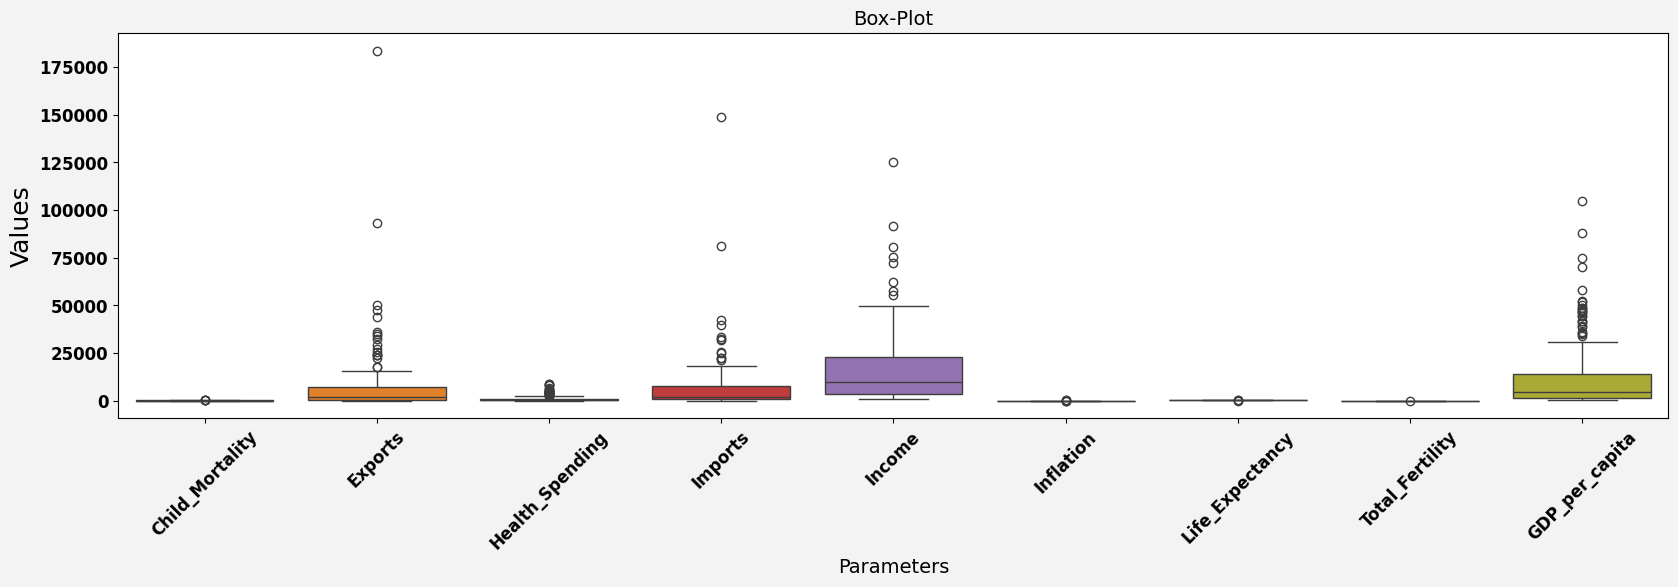

In [192]:
# Plot box-plot to check the data outliers
fig= plt.figure(figsize=(20,5))
fig.set_facecolor("#F3F3F3")
a=sns.boxplot(data=country_data)
plt.setp(a.get_xticklabels(), rotation=45)
plt.title('Box-Plot', fontsize=14)
plt.ylabel('Values', fontsize=18);plt.xlabel('Parameters',fontsize=14)
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

* From the box-plot graph, we observe that the outliers observed in the case of exports, health, imports, income, and gdpp, 

* The outlier will be treated in the later part of the analysis post.

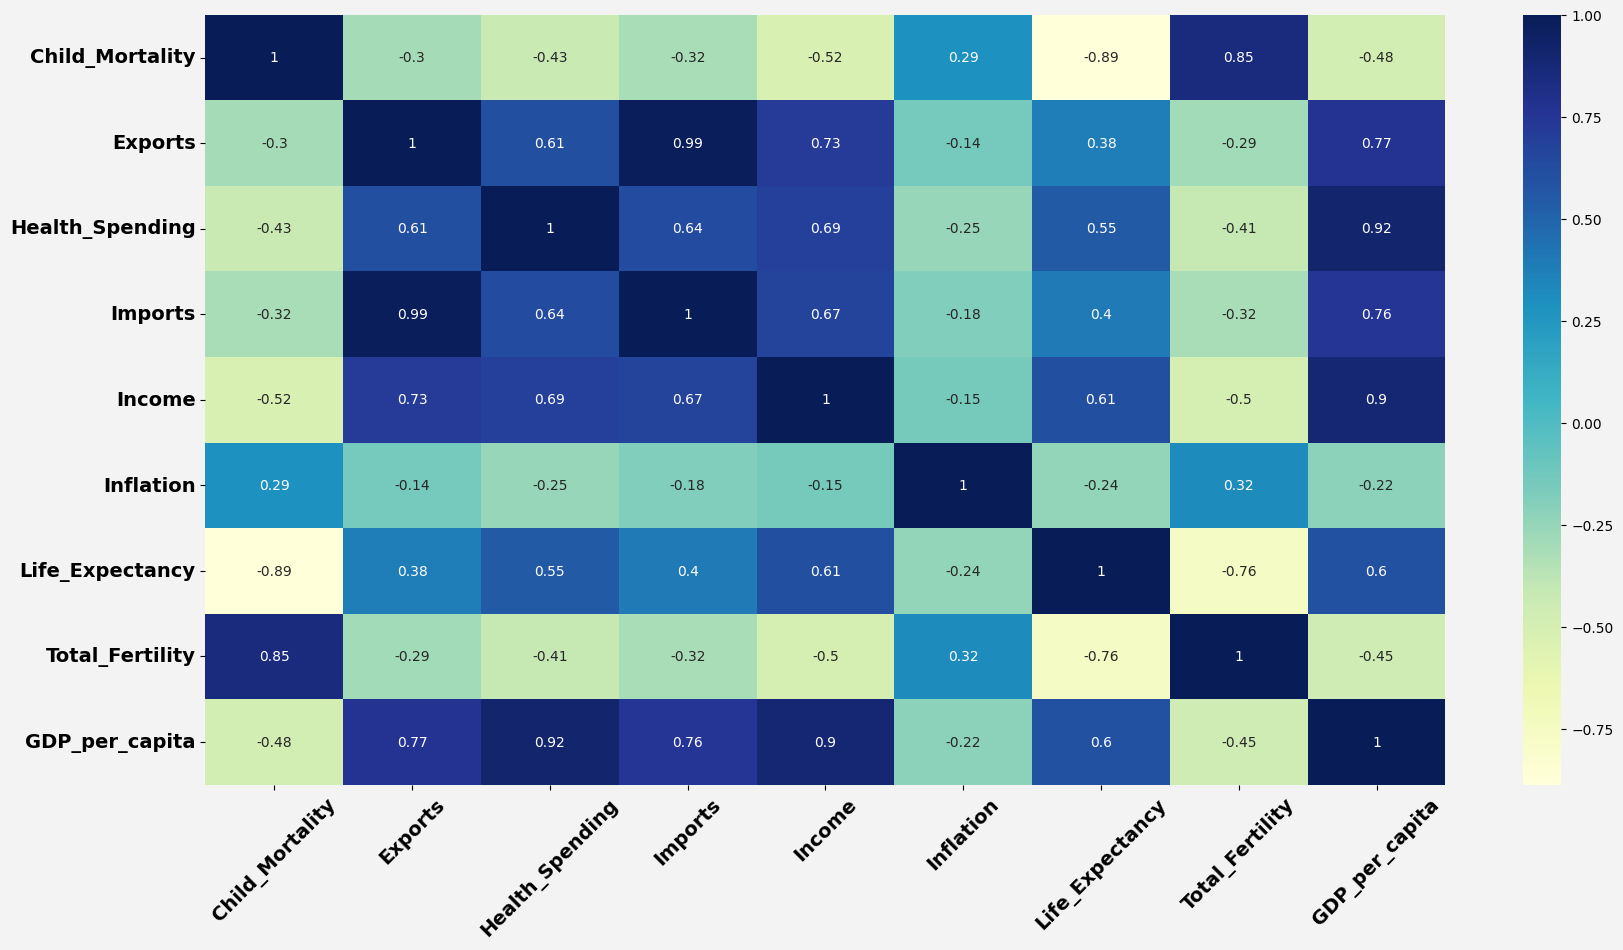

Features having correlation 0.70 above: 4

['Imports', 'Income', 'Total_Fertility', 'GDP_per_capita']


In [193]:
numeric_data = country_data.select_dtypes(include=[float, int])

# Check if there are any numeric columns left
if numeric_data.shape[1] == 0:
    raise ValueError("No numeric columns found in the DataFrame.")

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 10))
plt.gcf().set_facecolor("#F3F3F3")
heatmap = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)

# Rotate the x-axis labels for better readability
plt.setp(heatmap.get_xticklabels(), rotation=45)
plt.yticks(fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.show()

# Upper value matrix
upper_value = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Features having a higher correlation of more than 0.70
high_corr_features = [column for column in upper_value.columns if any(upper_value[column] > 0.70)]

print("Features having correlation 0.70 above:", "{}\n\n{}".format(len(high_corr_features), high_corr_features))

1. Exports, imports, health spending, income are highly correlated with GDP per capita.
2. These numerical variables are also observed highly correlated with each other.
3. The PCA model doesn't need the data to be highly correlated to work correctly but is necessary and becomes applicable only when the data is highly correlated.

Thus, PCA analysis will be performed without further modification in the dataset.

**Performing PCA**

PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto the unit scale (mean = 0 and variance = 1), which is a requirement for the optimal performance of many machine learning algorithms.

In [194]:
 # Remove the country column and keep only the data column for further data evaluation

country_data1=country_data.drop(['Country'],axis=1)
scaler = StandardScaler()
country_scaled = scaler.fit_transform(country_data1)

In [195]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(country_scaled)

PCA(random_state=42, svd_solver='randomized')

In [196]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [197]:
# Analyze the variance ratios of each features
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

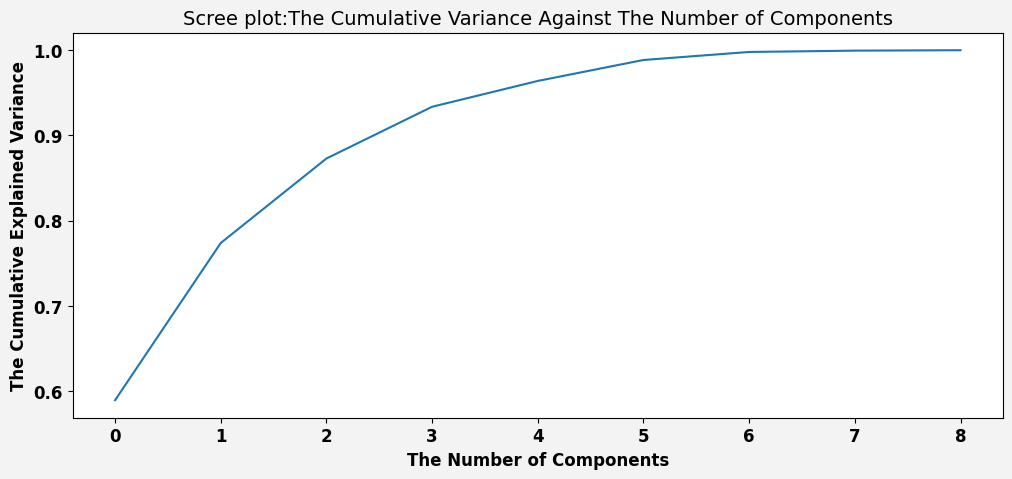

In [198]:
# Plotting the Scree plot, i.e., the cumulative variance against the number of components
fig = plt.figure(figsize = (12,5))
fig.set_facecolor("#F3F3F3")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree plot:The Cumulative Variance Against The Number of Components', fontsize=14)
plt.xlabel('The Number of Components', fontsize=12, fontweight='bold')
plt.ylabel('The Cumulative Explained Variance', fontsize=12,fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

We observed five components describe 98% of information; hence we will select the five components.

In [199]:
colnames = list(country_data1.columns)
prinComp_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4]})
prinComp_df

Feature       PC1       PC2       PC3       PC4       PC5
0  Child_Mortality -0.316392  0.476267 -0.150012 -0.148052  0.101995
1          Exports  0.342887  0.397311 -0.030574  0.449425 -0.038538
2  Health_Spending  0.358535  0.155053 -0.075703 -0.599712 -0.493200
3          Imports  0.344865  0.370781 -0.072174  0.461798 -0.252787
4           Income  0.380041  0.128384  0.145764 -0.154806  0.794075
5        Inflation -0.143085  0.221261  0.948419 -0.007628 -0.136423
6  Life_Expectancy  0.343857 -0.369820  0.196752 -0.018395 -0.154041
7  Total_Fertility -0.302842  0.459715 -0.077834 -0.213928 -0.020336
8   GDP_per_capita  0.399988  0.200624  0.010339 -0.364772  0.087501

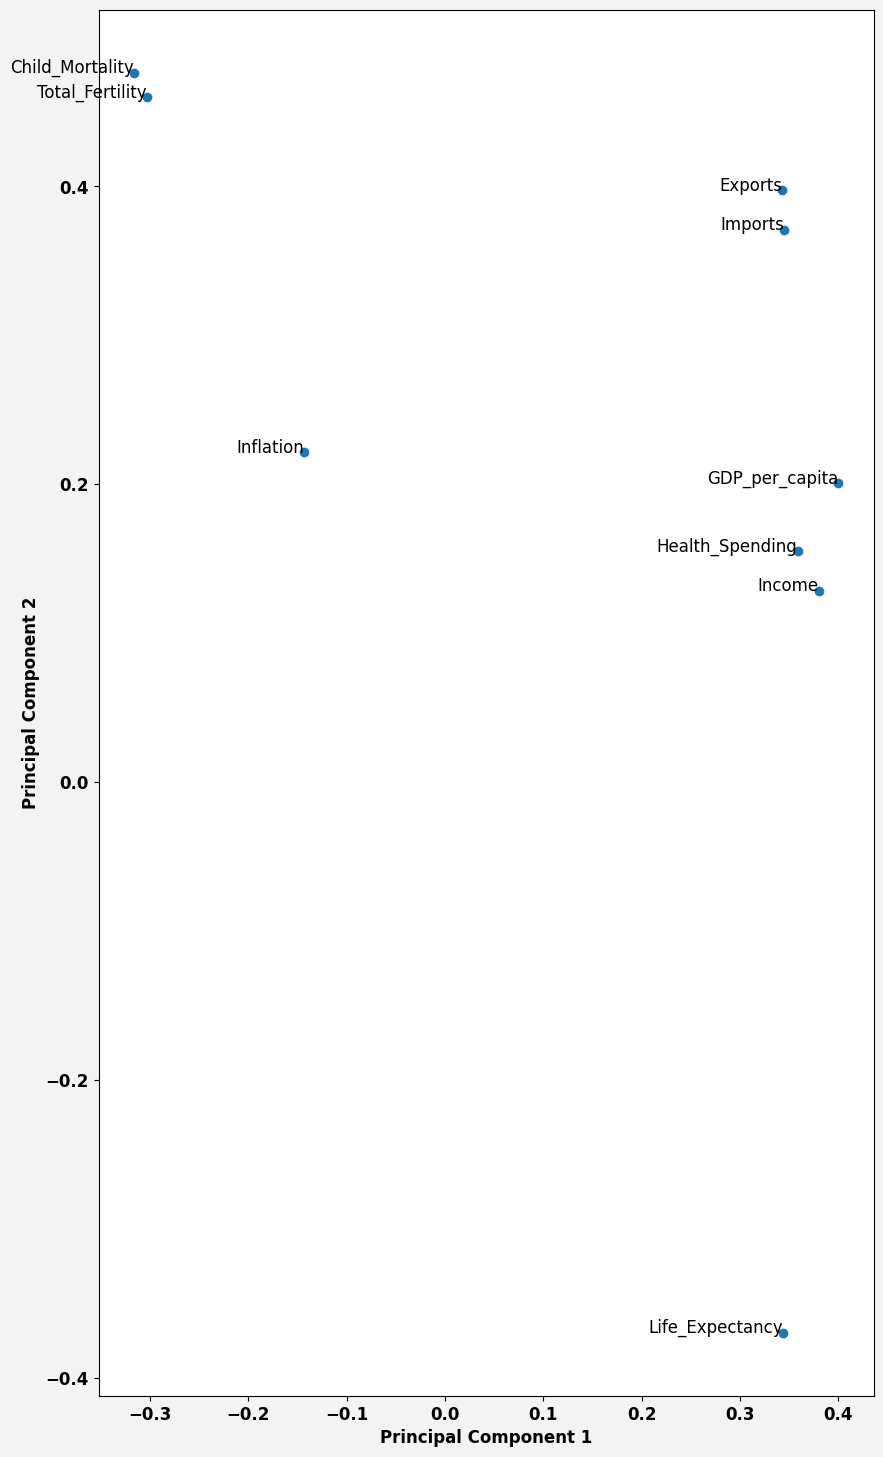

In [200]:
# Visulaize the first two principal components
fig = plt.figure(figsize = (10,18))
fig.set_facecolor("#F3F3F3")
plt.scatter(prinComp_df.PC1, prinComp_df.PC2)
plt.xlabel('Principal Component 1',fontsize=12, fontweight='bold')
plt.ylabel('Principal Component 2',fontsize=12, fontweight='bold')
for i, txt in enumerate(prinComp_df.Feature):
    plt.annotate(txt, (prinComp_df.PC1[i],prinComp_df.PC2[i]),fontsize=12,  horizontalalignment='right')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

* The graph shows the principal component number one is observed to be in the direction where GDP per capita, Income, Health Spending, Life Expectancy are high. 
* Similarly, the main component number two is observed to be where child mortality and Total fertility are higher.

In [201]:
pca_final = IncrementalPCA(n_components=5)

In [202]:
newdata_df = pca_final.fit_transform(country_scaled)
print(datastyle.start+'PCA Transformed Data of Five PC Data: '+datastyle.end,newdata_df.shape);Line_Separator()

PCA Transformed Data of Five PC Data:  (167, 5)
************************************************** 



In [203]:
# Take the transpose of the PC matrix so that we can create the new matrix
pc5 = np.transpose(newdata_df)

Heatmap describes that none of the components are correlated.

In [204]:
# Create the dataframe for five PC
prinComp_df1 = pd.DataFrame({'PC1':pc5[0],'PC2':pc5[1],'PC3':pc5[2],'PC4':pc5[3],'PC5':pc5[4]})
prinComp_df1.head(2)

PC1       PC2      PC3       PC4       PC5
0 -2.636338  1.472260 -0.54833  0.238302  0.061003
1 -0.023783 -1.435535 -0.01547 -0.428278 -0.154305

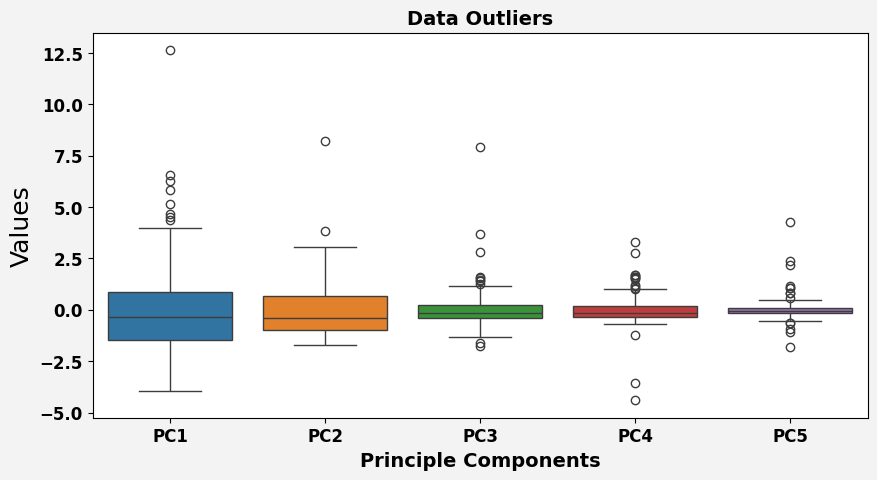

In [205]:
# Checking outliers of five PC using box-plot
fig = plt.figure(figsize = (10,5))
fig.set_facecolor("#F3F3F3")
sns.boxplot(data=prinComp_df1)
plt.title('Data Outliers', fontsize=14, fontweight='bold')
plt.ylabel('Values', fontsize=18);plt.xlabel('Principle Components',fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

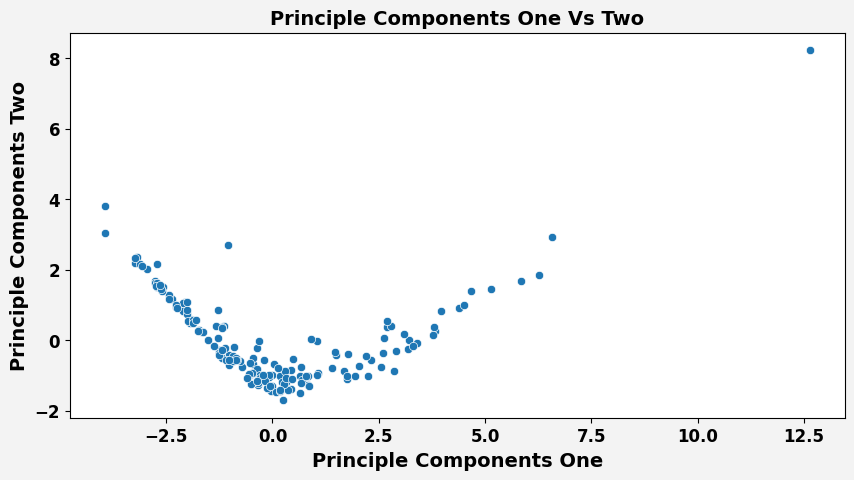

In [206]:
# Let's check the spread of the dataset
fig = plt.figure(figsize = (10,5))
fig.set_facecolor("#F3F3F3")
sns.scatterplot(x='PC1',y='PC2',data=prinComp_df1)
plt.title('Principle Components One Vs Two', fontsize=14, fontweight='bold')
plt.ylabel('Principle Components Two', fontsize=14,  fontweight='bold');plt.xlabel('Principle Components One',fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

Data grouping observed before and after zero value of PC1.

In [207]:
# Hopkins Statistics

def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

print(datastyle.start+'Hopkins Measure: '+datastyle.end,hopkins(prinComp_df1))

Hopkins Measure:  0.9448092079527086


High tendency to form the clusters since the Hopkins measure>0.5 of the given dataset.

In [208]:
# Assigning prinComp_df1 dataframe to a new variable
df3 = prinComp_df1

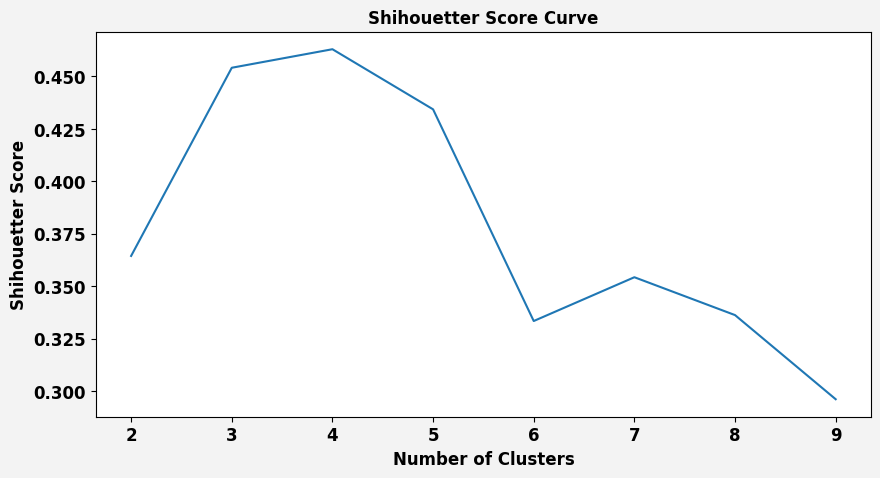

In [209]:
# Sihouette score
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df3)
    sse.append([k, silhouette_score(df3, kmeans.labels_)])
    
fig = plt.figure(figsize = (10,5))
fig.set_facecolor("#F3F3F3")
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])
plt.title('Shihouetter Score Curve', fontsize=12, fontweight='bold')
plt.ylabel('Shihouetter Score', fontsize=12, fontweight='bold');plt.xlabel('Number of Clusters',fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

Shihouetter score curve indicates cluster is separated with another cluster, n-cluster =3.

In [210]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df3)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print(datastyle.start+"For n_clusters,"+datastyle.end, num_clusters, datastyle.start+"the silhouette score is "+datastyle.end,silhouette_avg);Line_Separator1()

For n_clusters, 2 the silhouette score is  0.4806604678275592
**************************************************************************************************** 

For n_clusters, 3 the silhouette score is  0.45415128979715086
**************************************************************************************************** 

For n_clusters, 4 the silhouette score is  0.4629814641482611
**************************************************************************************************** 

For n_clusters, 5 the silhouette score is  0.3216244630033659
**************************************************************************************************** 

For n_clusters, 6 the silhouette score is  0.4128208519409852
**************************************************************************************************** 

For n_clusters, 7 the silhouette score is  0.35921337858881464
**************************************************************************************************** 

For n_cl

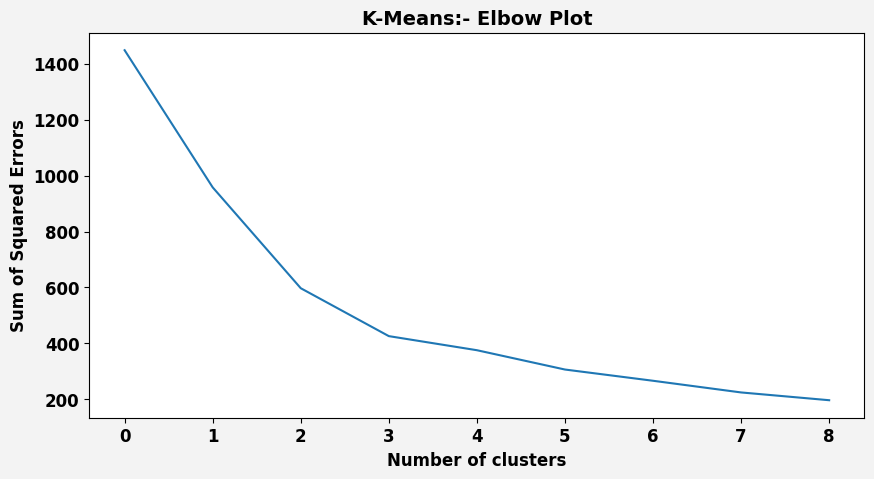

In [211]:
# elbow-curve/SSD
# SSD = Sum of Square distance of samples to thier closest center
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df3)
    ssd.append(model_clus.inertia_)
    
fig = plt.figure(figsize = (10,5))
fig.set_facecolor("#F3F3F3")
plt.plot(ssd)
plt.title('K-Means:- Elbow Plot', fontsize=14, fontweight='bold')
plt.ylabel('Sum of Squared Errors', fontsize=12, fontweight='bold');plt.xlabel('Number of clusters',fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

Elbow curve the distinct bend observed at around n_clusters = 3. Thus we will select three as the number of cutlers for further analysis.

In [212]:
model_clus1 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus1.fit(df3)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [213]:
# Concat Kmeans Modelculst1 to PCA analyzed dataframe

df4=prinComp_df1
df4.index = pd.RangeIndex(len(df4.index))
df_kmean = pd.concat([df4, pd.Series(model_clus1.labels_)], axis=1)
df_kmean.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
df_kmean.head(2)

PC1       PC2      PC3       PC4       PC5  ClusterID
0 -2.636338  1.472260 -0.54833  0.238302  0.061003          1
1 -0.023783 -1.435535 -0.01547 -0.428278 -0.154305          1

In [214]:
# Number of clusters and number of countries in each cluster
print(datastyle.start+"K-Means clustering: The Number of Clusters and Number of Countries in Each Cluster"+datastyle.end)
print(df_kmean['ClusterID'].value_counts());Line_Separator()

K-Means clustering: The Number of Clusters and Number of Countries in Each Cluster
ClusterID
1    130
0     36
2      1
Name: count, dtype: int64
************************************************** 



In [215]:
# Merge Original dataset with PCA analyzed Kmean
df5=pd.merge(country_data,df_kmean, left_index=True,right_index=True)
df5.head(2)

Country  Child_Mortality  Exports  Health_Spending   Imports  Income  \
0  Afghanistan             90.2     55.3          41.9174   248.297    1610   
1      Albania             16.6   1145.2         267.8950  1987.740    9930   

   Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita       PC1  \
0       9.44             56.2             5.82             553 -2.636338   
1       4.49             76.3             1.65            4090 -0.023783   

        PC2      PC3       PC4       PC5  ClusterID  
0  1.472260 -0.54833  0.238302  0.061003          1  
1 -1.435535 -0.01547 -0.428278 -0.154305          1

In [216]:
# Remove all the Principal Components (PC) from the df5 dataset 
df6=df5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
df6.head(2)

Country  Child_Mortality  Exports  Health_Spending   Imports  Income  \
0  Afghanistan             90.2     55.3          41.9174   248.297    1610   
1      Albania             16.6   1145.2         267.8950  1987.740    9930   

   Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita  ClusterID  
0       9.44             56.2             5.82             553          1  
1       4.49             76.3             1.65            4090          1

In [217]:
# Check the number of columns and rows
print(datastyle.start+'Shape of df6 dataset: '+datastyle.end,df6.shape)

Shape of df6 dataset:  (167, 11)


Dataset of PCs along with cluster number was merged with the original dataset. Data were further grouped based on cluster number and average all variables of each column. These three clusters were then classified as developed, developing, and underdeveloped countries based on GDP per capita.

**K-Means Clustering: EDA**

We will perform the clustering analysis after allocating the clusterIDs back to the original dataset.

In [218]:
# Analyse the mean of all the variables of each cluster obtained after K mean -used goupby function

cluster_Child_Mortality=pd.DataFrame(df6.groupby(["ClusterID"]).Child_Mortality.mean())
cluster_Exports=pd.DataFrame(df6.groupby(["ClusterID"]).Exports.mean())
cluster_Health_Spending=pd.DataFrame(df6.groupby(["ClusterID"]).Health_Spending.mean())
cluster_Imports=pd.DataFrame(df6.groupby(["ClusterID"]).Imports.mean())
cluster_Income=pd.DataFrame(df6.groupby(["ClusterID"]).Income.mean())
cluster_Inflation=pd.DataFrame(df6.groupby(["ClusterID"]).Inflation.mean())
cluster_Life_Expectancy=pd.DataFrame(df6.groupby(["ClusterID"]).Life_Expectancy.mean())
cluster_Total_Fertility=pd.DataFrame(df6.groupby(["ClusterID"]).Total_Fertility.mean())
cluster_GDP_per_capita=pd.DataFrame(df6.groupby(["ClusterID"]).GDP_per_capita.mean())

In [219]:
# Merge all the groupby dataset
df7=pd.concat([cluster_Child_Mortality,cluster_Exports,cluster_Health_Spending,cluster_Imports,cluster_Income,cluster_Inflation,cluster_Life_Expectancy,cluster_Total_Fertility,cluster_GDP_per_capita],axis=1).reset_index()
df7.head(2)

ClusterID  Child_Mortality       Exports  Health_Spending       Imports  \
0          0         5.305556  21794.083333      3627.038611  18711.600000   
1          1        47.671538   2083.894981       290.327347   2134.901555   

         Income  Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita  
0  43761.111111   2.559778        79.919444         1.759167    40355.555556  
1   9200.484615   9.259954        67.880000         3.287308     4670.876923

In [220]:
print(datastyle.start+"1."+ datastyle.end, "Replaced 0 to Developed Countries")
print(datastyle.start+"2."+ datastyle.end, "Replaced 1 to Developing Countries")
print(datastyle.start+"3."+ datastyle.end, "Replaced 2 to Under-developed Countries");Line_Separator()

def replace_number_to_name(x,y):
    df7.ClusterID.replace(x,y, inplace=True)

replace_number_to_name(0,'Developed Countries')
replace_number_to_name(1,'Developing Countries')
replace_number_to_name(2,'Under-developed Countries')

1. Replaced 0 to Developed Countries
2. Replaced 1 to Developing Countries
3. Replaced 2 to Under-developed Countries
************************************************** 



In [221]:
# Review the Data columns after repalcing 0, 1, and 2

print(datastyle.start+"ClusterID Unique Value:"+ datastyle.end)
print(df7.ClusterID.unique())

ClusterID Unique Value:
['Developed Countries' 'Developing Countries' 'Under-developed Countries']


In [222]:
print(datastyle.start+"1."+ datastyle.end, "Replaced 0 to Developed Countries")
print(datastyle.start+"2."+ datastyle.end, "Replaced 1 to Developing Countries")
print(datastyle.start+"3."+ datastyle.end, "Replaced 2 to Under-developed Countries");Line_Separator()

df0=df6
def replace_number_to_name(x,y):
    df0.ClusterID.replace(x,y, inplace=True)

replace_number_to_name(0,'Developed Countries')
replace_number_to_name(1,'Developing Countries')
replace_number_to_name(2,'Under-developed Countries')

1. Replaced 0 to Developed Countries
2. Replaced 1 to Developing Countries
3. Replaced 2 to Under-developed Countries
************************************************** 



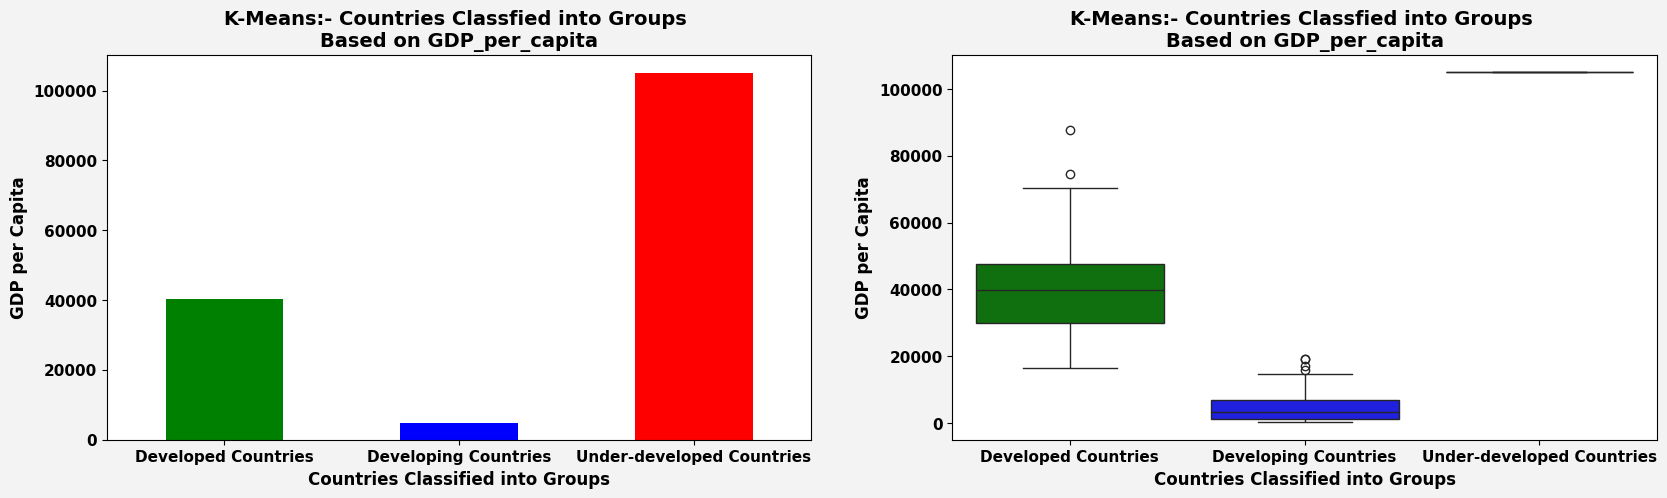

In [223]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

ax1 = fig.add_subplot(121)

df7.plot.bar(x='ClusterID', y='GDP_per_capita', rot=0, legend=False, fontsize=12,color=['g','b', 'r'], ax=ax1)
plt.title('K-Means:- Countries Classfied into Groups \nBased on GDP_per_capita', fontsize=14, fontweight='bold')
plt.ylabel('GDP per Capita', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(122)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.boxplot(x='ClusterID',y='GDP_per_capita',data=df0, palette=colr,
           order = ['Developed Countries' , 'Developing Countries' , 'Under-developed Countries'])
plt.title('K-Means:- Countries Classfied into Groups \nBased on GDP_per_capita',  fontsize=14, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.ylabel('GDP per Capita', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.show()

**GDP per Capita (Bar Chart):** GDP per capita of countries was directly proportionate to the developmental status of countries.

**GDP per Capita (Box-Plot):** Developed countries’ GDP per Capita was observed to be approximately four times higher than developing countries. However, developing countries’ GDP per capita was twice that of under-developed countries.

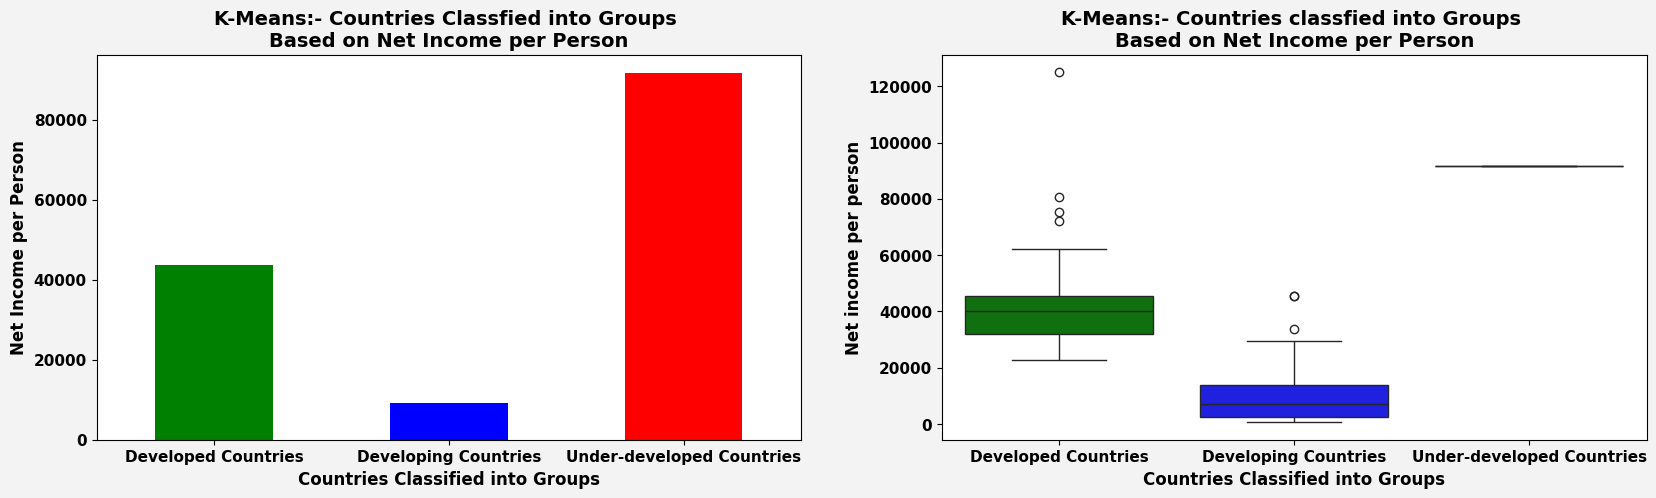

In [224]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

ax2 = fig.add_subplot(121)

df7.plot.bar(x='ClusterID', y='Income', rot=0, legend=False, fontsize=12,color=['g','b', 'r'], ax=ax2)
plt.title('K-Means:- Countries Classfied into Groups \nBased on Net Income per Person', fontsize=14, fontweight='bold')
plt.ylabel('Net Income per Person', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(122)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.boxplot(x='ClusterID',y='Income',data=df0,palette=colr,
           order = ['Developed Countries' , 'Developing Countries' , 'Under-developed Countries'])
plt.title('K-Means:- Countries classfied into Groups \nBased on Net Income per Person', fontsize=14, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.ylabel('Net income per person', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.show()

**Net Income per Person (Bar Chart):** Similarly, the net income per person was also directly proportionate to the developmental status of countries.

**Net Incomer pre-Person (Box-Plot):** Net income per –person in developed countries was approximately three times higher than in developing countries. The same difference was observed between developing and under-developed countries.

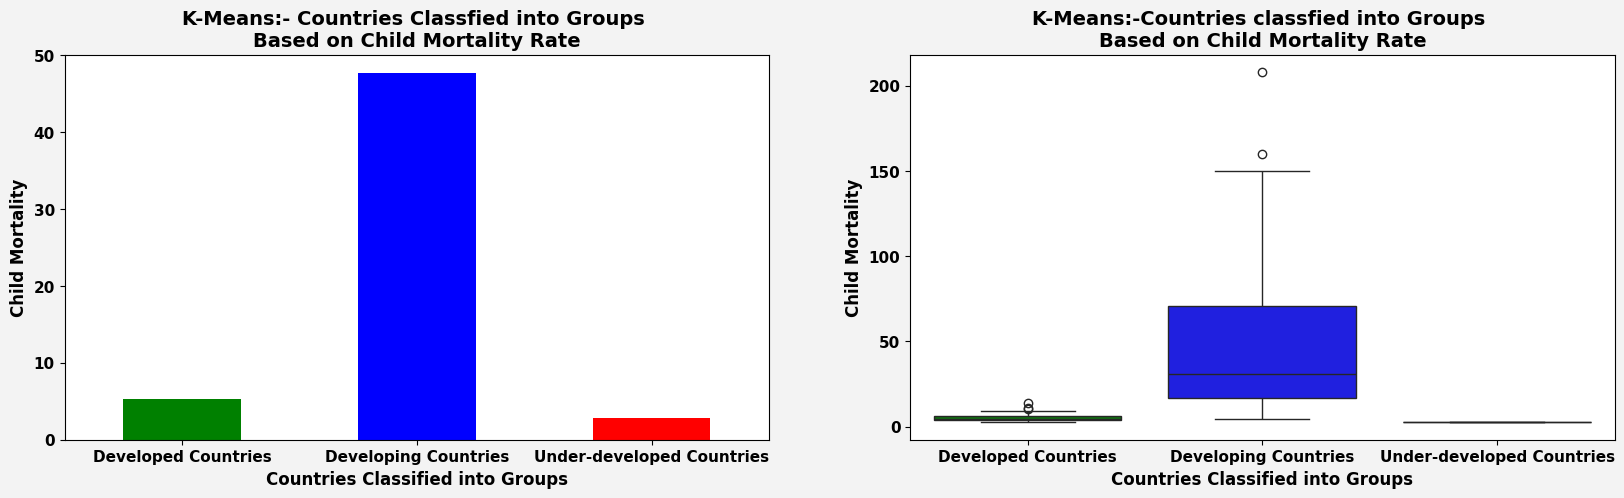

In [225]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

ax3 = fig.add_subplot(121)

plt.rcParams['figure.figsize']=(9,4)
df7.plot.bar(x='ClusterID', y='Child_Mortality', rot=0, legend=False, fontsize=12,color=['g','b', 'r'], ax=ax3)
plt.title('K-Means:- Countries Classfied into Groups \nBased on Child Mortality Rate', fontsize=14, fontweight='bold')
plt.ylabel('Child Mortality', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(122)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.boxplot(x='ClusterID',y='Child_Mortality',data=df0,palette=colr,
           order = ['Developed Countries' , 'Developing Countries' , 'Under-developed Countries'])
plt.title('K-Means:-Countries classfied into Groups \nBased on Child Mortality Rate', fontsize=14, fontweight='bold')
plt.ylabel('Child Mortality', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.show()

**Child Mortality:** Death of children under five years of age per 1000 live births.

**Child mortality (Bar Chart):** As expected, child mortality was inversely proportional to the developmental status of countries.

**Child mortality (Box-Plot):** Child mortality of under-developed countries was approximately four times higher than developing countries which in turn was about seven times higher than developed countries.

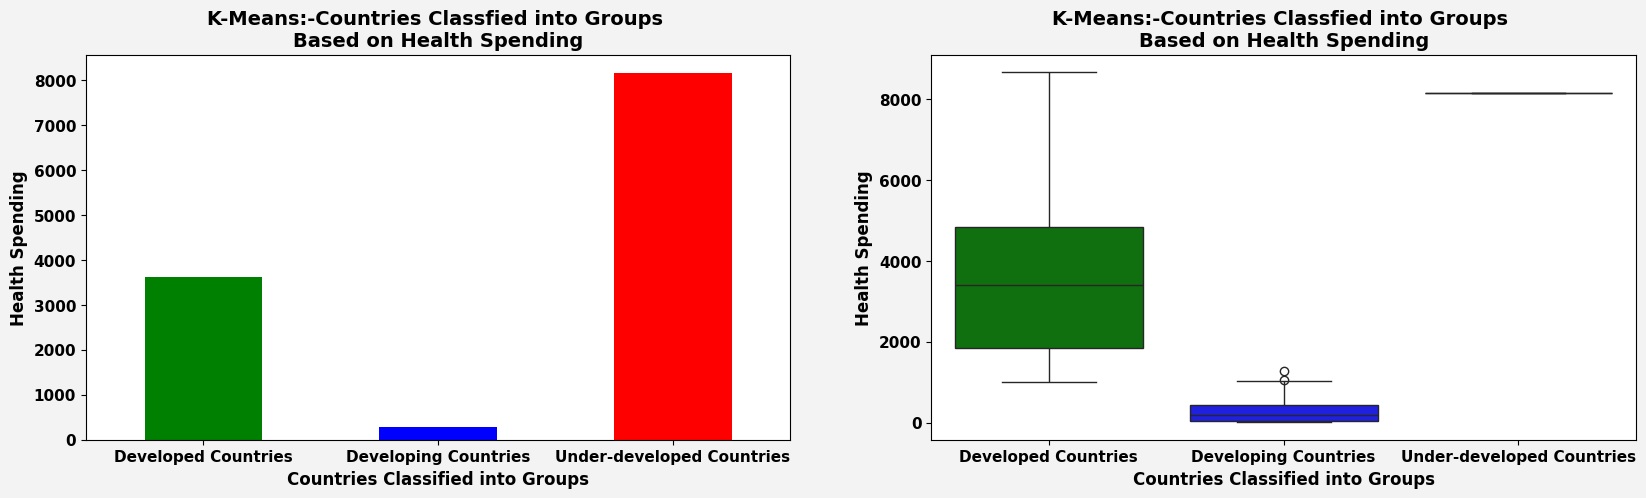

In [226]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

ax4 = fig.add_subplot(121)

df7.plot.bar(x='ClusterID', y='Health_Spending', rot=0, legend=False, fontsize=12,color=['g','b', 'r'], ax=ax4)
plt.title('K-Means:-Countries Classfied into Groups \nBased on Health Spending', fontsize=14,  fontweight='bold')
plt.ylabel('Health Spending', fontsize=12,  fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12,  fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(122)

colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.boxplot(x='ClusterID',y='Health_Spending',data=df0,palette=colr,
           order = ['Developed Countries' , 'Developing Countries' , 'Under-developed Countries'])
plt.title('K-Means:-Countries Classfied into Groups \nBased on Health Spending', fontsize=14,  fontweight='bold')
plt.ylabel('Health Spending', fontsize=12,  fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12,  fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.show()

**Health Spending and Life Expectancy (Bar Chart):** Health spending was better for Developed countries than developing and under-developed countries.

**Health Spending (Box Plot):** Health spending in developed countries was approximately ten times higher than in under-developed countries and five times higher than in developing countries.

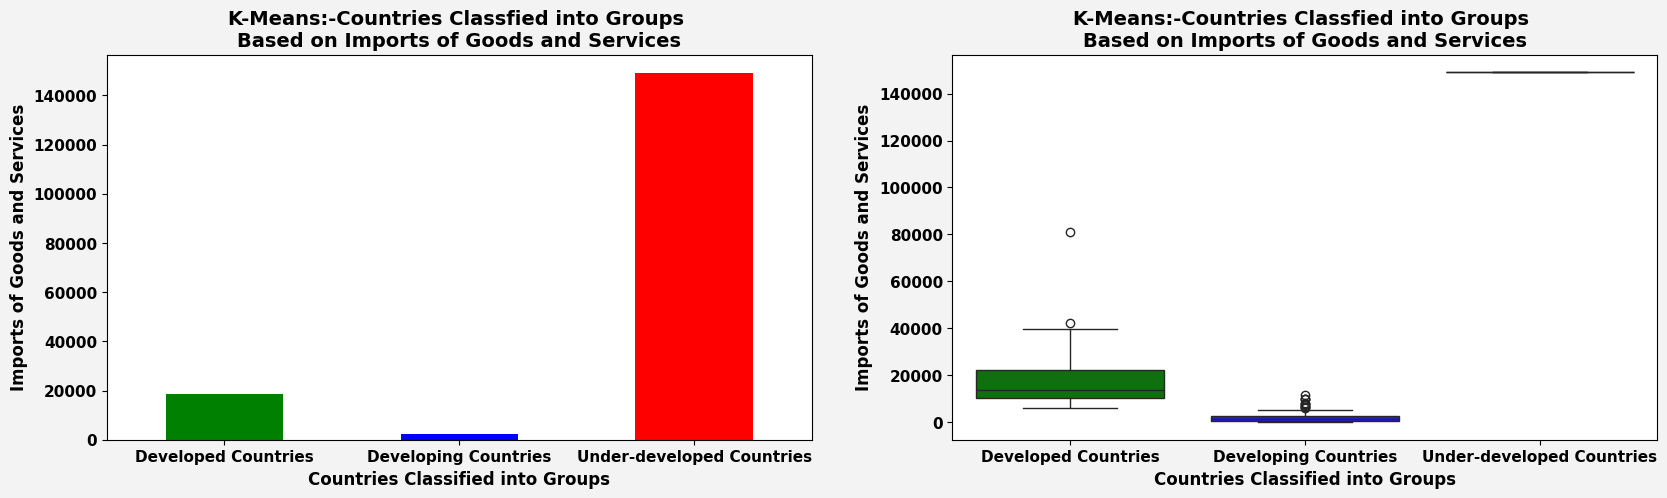

In [227]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

ax5 = fig.add_subplot(121)
df7.plot.bar(x='ClusterID', y='Imports', rot=0, legend=False, fontsize=12,color=['g','b', 'r'], ax=ax5)
plt.title('K-Means:-Countries Classfied into Groups \nBased on Imports of Goods and Services', fontsize=14, fontweight='bold')
plt.ylabel('Imports of Goods and Services', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(122)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.boxplot(x='ClusterID',y='Imports',data=df0,palette=colr,
           order = ['Developed Countries' , 'Developing Countries' , 'Under-developed Countries'])
plt.title('K-Means:-Countries Classfied into Groups \nBased on Imports of Goods and Services', fontsize=14, fontweight='bold')
plt.ylabel('Imports of Goods and Services', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.show()

Developed countries have higher imports of goods and services than developing countries, and the lowest is found in underdeveloped countries.

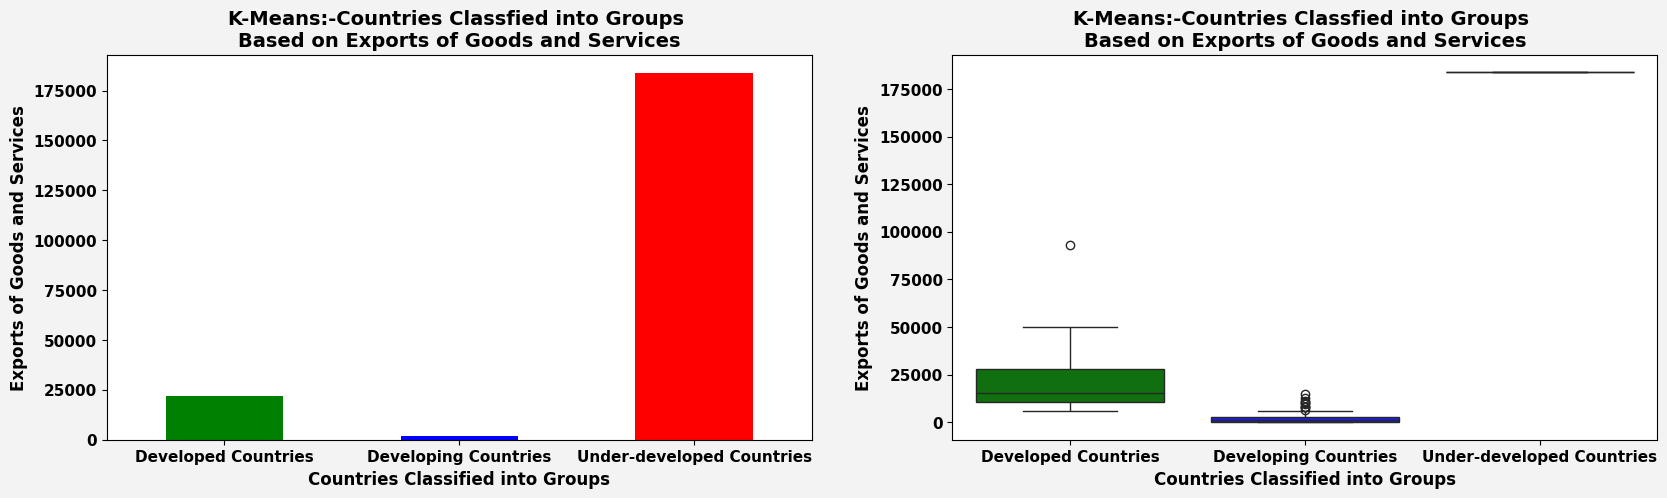

In [228]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

ax6 = fig.add_subplot(121)
df7.plot.bar(x='ClusterID', y='Exports', rot=0, legend=False, fontsize=12,color=['g','b', 'r'], ax=ax6)
plt.title('K-Means:-Countries Classfied into Groups \nBased on Exports of Goods and Services', fontsize=14, fontweight='bold')
plt.ylabel('Exports of Goods and Services', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(122)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.boxplot(x='ClusterID',y='Exports',data=df0,palette=colr,
            order = ['Developed Countries' , 'Developing Countries' , 'Under-developed Countries'])
plt.title('K-Means:-Countries Classfied into Groups \nBased on Exports of Goods and Services', fontsize=14, fontweight='bold')
plt.ylabel('Exports of Goods and Services', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.show()

**Import and Exports(Bar Chart):** Imports and Exports are much better with developed countries than developing and under-developed countries.

**Imports and Exports (Box-Plot):** Imports and exports of developed countries were approximately four times higher than under-developed countries and approximately twice that of developing countries.

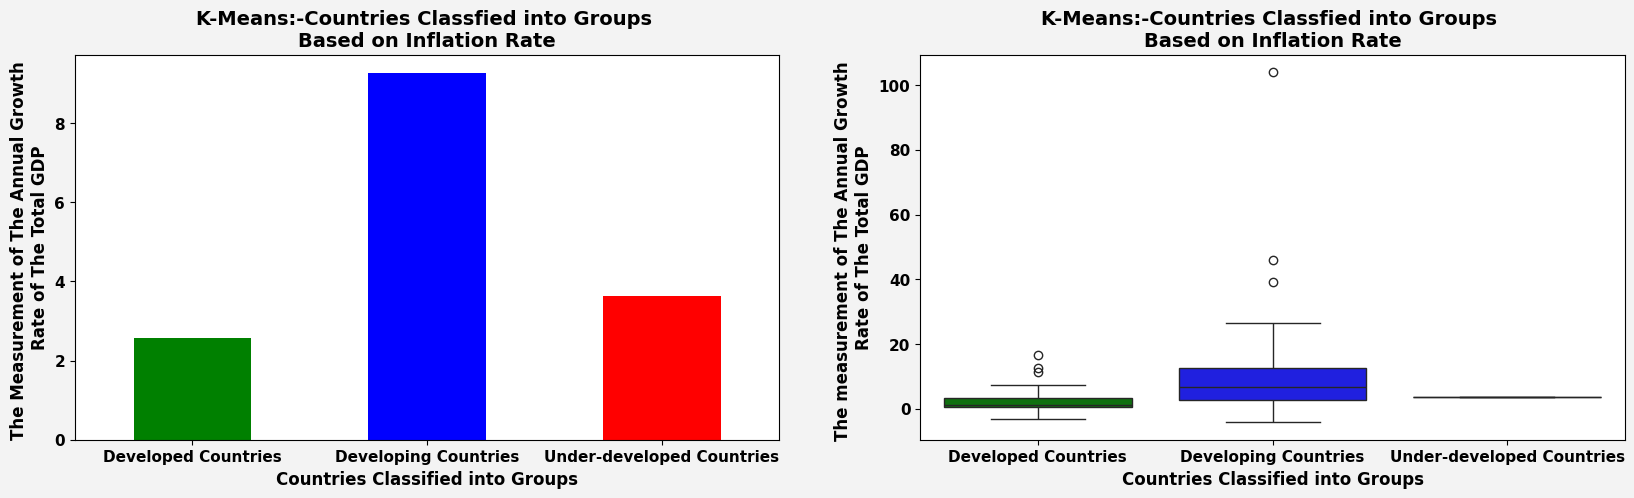

In [229]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

ax7 = fig.add_subplot(121)
df7.plot.bar(x='ClusterID', y='Inflation', rot=0, legend=False, fontsize=12,color=['g','b', 'r'], ax=ax7)
plt.title('K-Means:-Countries Classfied into Groups \nBased on Inflation Rate', fontsize=14, fontweight='bold')
plt.ylabel('The Measurement of The Annual Growth \nRate of The Total GDP', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(122)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.boxplot(x='ClusterID',y='Inflation',data=df0,palette=colr,
           order = ['Developed Countries' , 'Developing Countries' , 'Under-developed Countries'])
plt.title('K-Means:-Countries Classfied into Groups \nBased on Inflation Rate', fontsize=14, fontweight='bold')
plt.ylabel('The measurement of The Annual Growth \nRate of The Total GDP', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.show()

The measurement of the annual growth rate of the Total GDP

**Inflation rate (Bar Chart):** Similar to Child mortality and total fertility, the inflation rate was also highest in under-developed countries and lowest in developed countries.

**Inflation rate (Box-Plot):** There is a proportionate decrease in the inflation rate concerning the developmental status of countries.

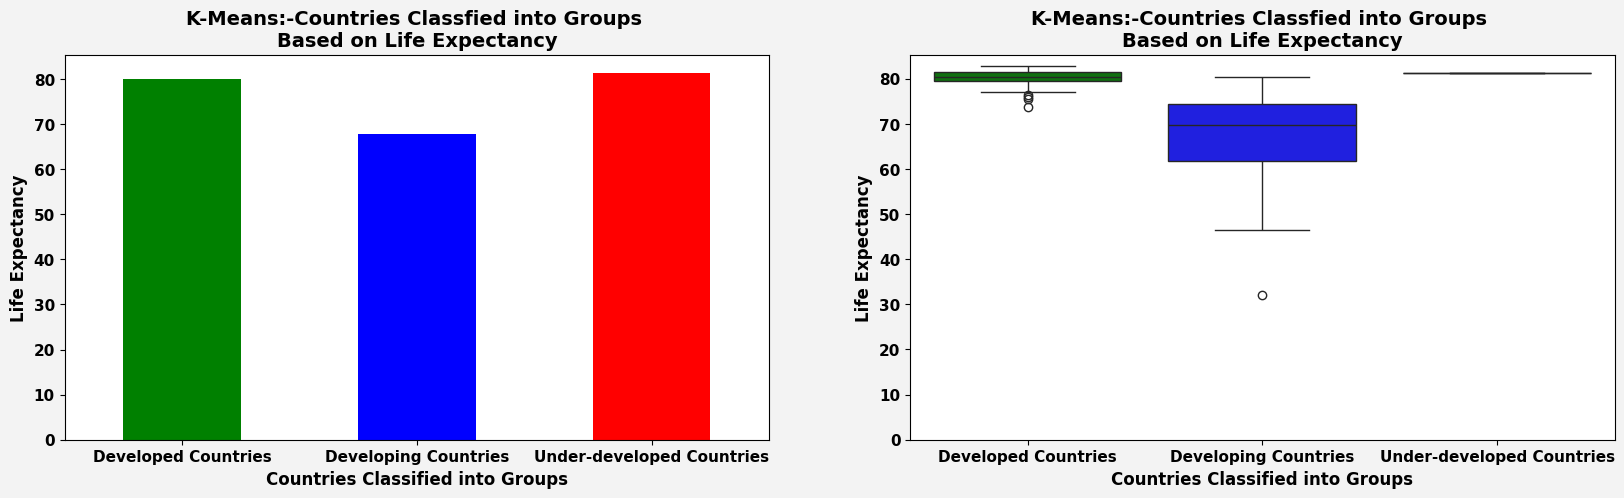

In [230]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

ax8 = fig.add_subplot(121)
df7.plot.bar(x='ClusterID', y='Life_Expectancy', rot=0, legend=False, fontsize=12,color=['g','b', 'r'], ax=ax8)
plt.title('K-Means:-Countries Classfied into Groups \nBased on Life Expectancy', fontsize=14, fontweight='bold')
plt.ylabel('Life Expectancy', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(122)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.boxplot(x='ClusterID',y='Life_Expectancy',data=df0,palette=colr,
           order = ['Developed Countries' , 'Developing Countries' , 'Under-developed Countries'])
plt.title('K-Means:-Countries Classfied into Groups \nBased on Life Expectancy', fontsize=14, fontweight='bold')
plt.ylabel('Life Expectancy', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.ylim(0,)
plt.show()

**Health Spending and Life Expectancy (Bar Chart):** Health spending was better for Developed countries than developing and under-developed countries; surprisingly, the life expectancy didn't vary much due to the country's developmental status.

**Life expectancy (Box-Plot):** Due to higher health spending, the life expectancy was increased by 20 years compared to under-developed countries and by ten years compared to developing countries.

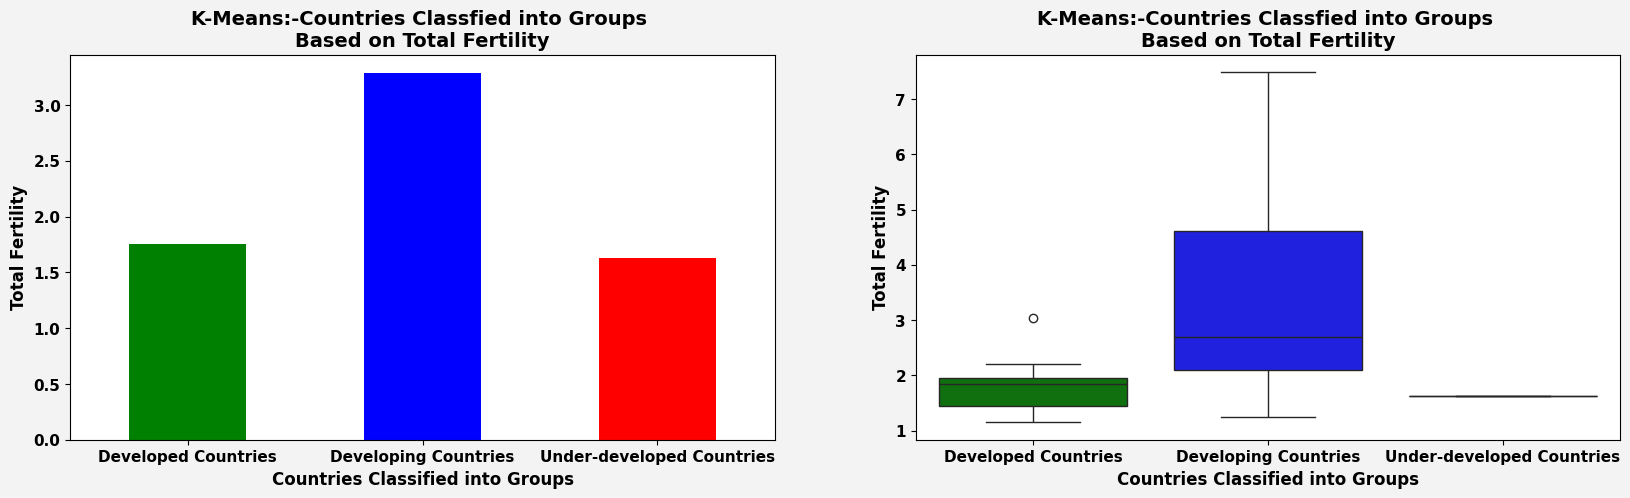

In [231]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

ax9 = fig.add_subplot(121)
df7.plot.bar(x='ClusterID', y='Total_Fertility', rot=0, legend=False, fontsize=12,color=['g','b', 'r'], ax=ax9)
plt.title('K-Means:-Countries Classfied into Groups \nBased on Total Fertility', fontsize=14, fontweight='bold')
plt.ylabel('Total Fertility', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(122)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.boxplot(x='ClusterID',y='Total_Fertility',data=df0,palette=colr,
           order = ['Developed Countries' , 'Developing Countries' , 'Under-developed Countries'])
plt.title('K-Means:-Countries Classfied into Groups \nBased on Total Fertility', fontsize=14, fontweight='bold')
plt.ylabel('Total Fertility', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.show()

**Total Fertility (Bar Chart):** Similar pattern to child mortality, total fertility was also inversely proportional to the developmental status of countries. This raises the question of whether the higher mortality rate affects the fertility rate, which will be evaluated in scatter plot analysis.

**Total fertility (Box-Plot):** Total fertility was less than two in the case of developed countries. It was two in developing countries with high variation from less than two to four number of fertility. Moreover, the total fertility was observed five with high variation from 3 to less than 7. This also impacts GDP per Capita negatively.

Using PCA followed by K means clustering, we identified underdeveloped countries. We will use the mean value (GDP per Capita, Child Mortality, and Income) of under-developed countries (as baseline) to get further deep dive to get the top five countries in real need of funding.

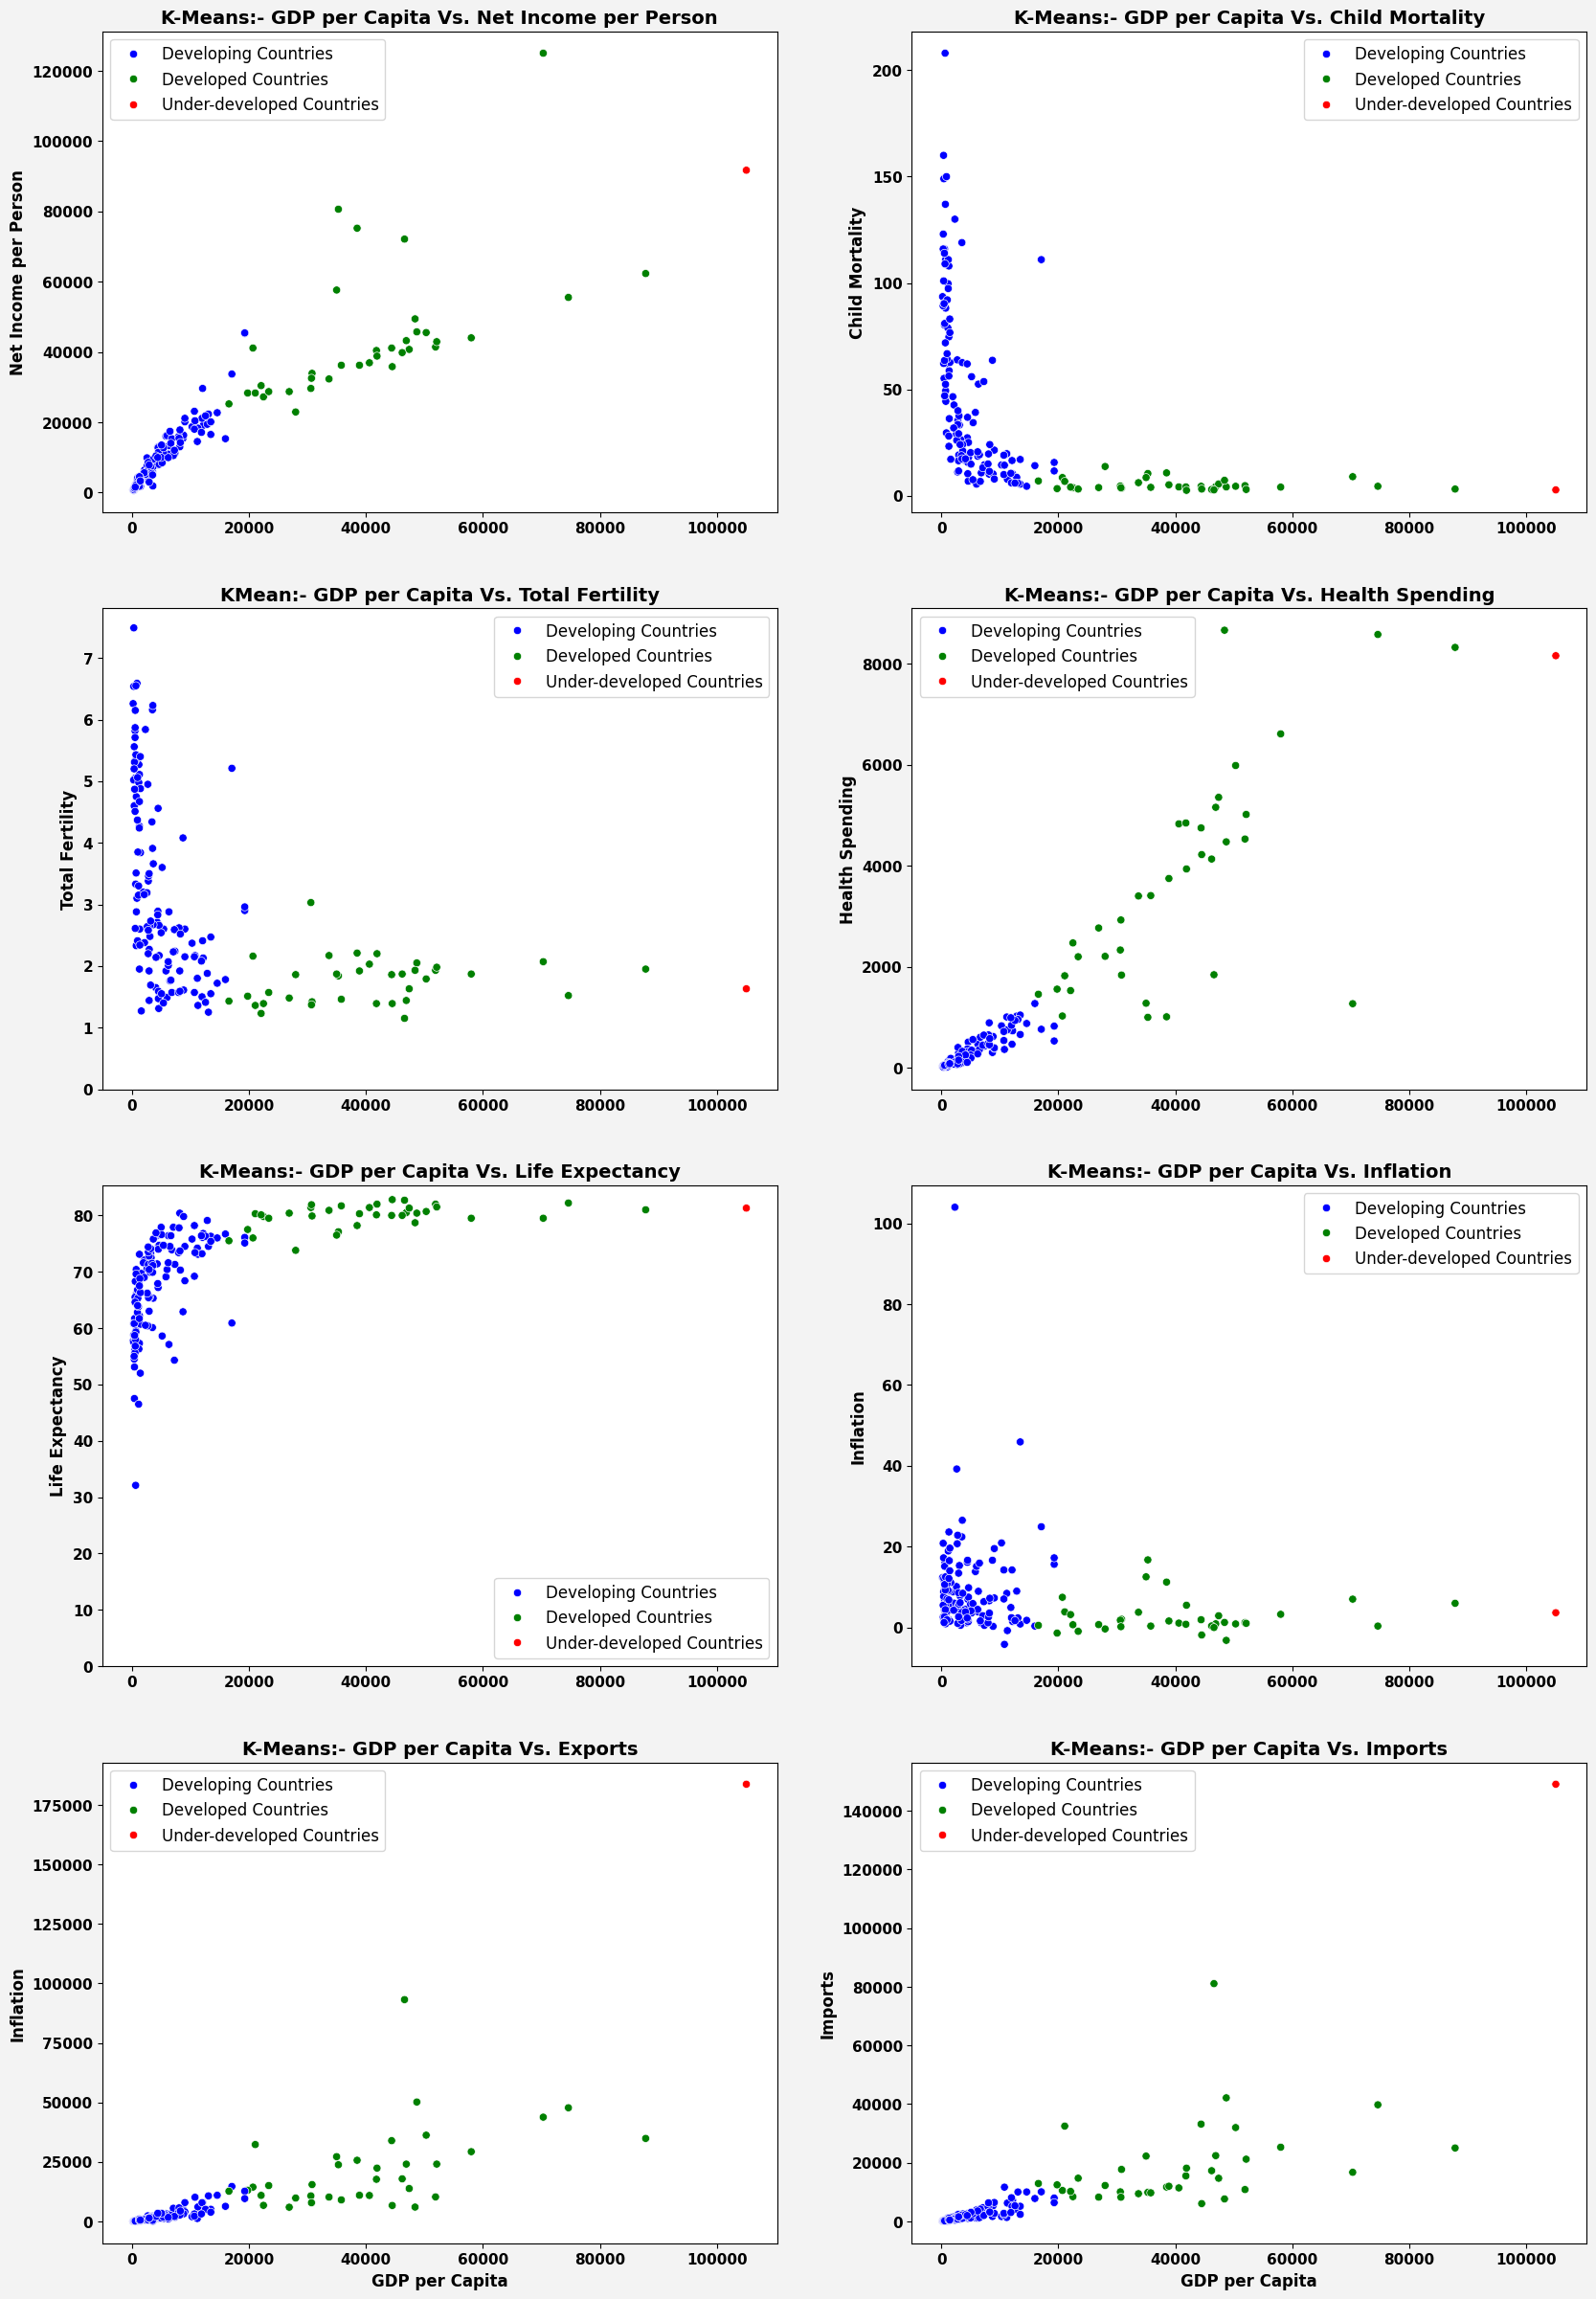

In [232]:
fig = plt.figure(figsize = (20,30))
fig.set_facecolor("#F3F3F3")

plt.subplot(421)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.scatterplot(x='GDP_per_capita',y='Income',hue='ClusterID',palette=colr,data=df0).set(xlabel=None)
plt.legend(fontsize=12, loc='upper left') 
plt.title('K-Means:- GDP per Capita Vs. Net Income per Person',fontsize=14, fontweight='bold')
plt.ylabel('Net Income per Person', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(422)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.scatterplot(x='GDP_per_capita',y='Child_Mortality',hue='ClusterID',palette=colr,data=df0).set(xlabel=None)
plt.legend(fontsize=12, loc='best') 
plt.title('K-Means:- GDP per Capita Vs. Child Mortality',fontsize=14, fontweight='bold')
plt.ylabel('Child Mortality', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(423)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.scatterplot(x='GDP_per_capita',y='Total_Fertility',hue='ClusterID',palette=colr,data=df0).set(xlabel=None)
plt.legend(fontsize=12) 
plt.title('KMean:- GDP per Capita Vs. Total Fertility',fontsize=14, fontweight='bold')
plt.ylabel('Total Fertility', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.ylim(0,)

plt.subplot(424)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.scatterplot(x='GDP_per_capita',y='Health_Spending',hue='ClusterID',palette=colr,data=df0).set(xlabel=None)
plt.legend(fontsize=12, loc='best') 
plt.title('K-Means:- GDP per Capita Vs. Health Spending',fontsize=14, fontweight='bold')
plt.ylabel('Health Spending', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(425)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.scatterplot(x='GDP_per_capita',y='Life_Expectancy',hue='ClusterID',palette=colr,data=df0).set(xlabel=None)
plt.legend(fontsize=12,loc='lower right') 
plt.title('K-Means:- GDP per Capita Vs. Life Expectancy',fontsize=14, fontweight='bold')
plt.ylabel('Life Expectancy', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.ylim(0,)

plt.subplot(426)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.scatterplot(x='GDP_per_capita',y='Inflation',hue='ClusterID',palette=colr,data=df0).set(xlabel=None)
plt.legend(fontsize=12,loc='best') 
plt.title('K-Means:- GDP per Capita Vs. Inflation',fontsize=14, fontweight='bold')
plt.ylabel('Inflation', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(427)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.scatterplot(x='GDP_per_capita',y='Exports',hue='ClusterID',palette=colr,data=df0)
plt.legend(fontsize=12,loc='best') 
plt.title('K-Means:- GDP per Capita Vs. Exports',fontsize=14, fontweight='bold')
plt.xlabel('GDP per Capita', fontsize=12, fontweight='bold')
plt.ylabel('Inflation', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(428)
colr = {"Developed Countries": "g", "Developing Countries": "b", "Under-developed Countries":"r"}
sns.scatterplot(x='GDP_per_capita',y='Imports',hue='ClusterID',palette=colr,data=df0)
plt.legend(fontsize=12,loc='best') 
plt.title('K-Means:- GDP per Capita Vs. Imports',fontsize=14, fontweight='bold')
plt.xlabel('GDP per Capita', fontsize=12, fontweight='bold')
plt.ylabel('Imports', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.show()

1. **GDP per Capita Vs. Net Income per Person:** The person's net income is high when GDP per Capita is high. It observes in the form of clusters than linear form.

2. **GDP per Capita Vs. Child mortality:** Child mortality was high when GDP was less than 8000. It further significantly increased when GDP per Capita was less than 1000.

3. **GDP per Capita Vs. total fertility:** Total fertility is higher when GDP is less than 1000.

4. **GDP per Capita Vs. Health Spending:** The health spading is high when GDP per capita is high.

5. **GPD per Capita Vs. Life expectancy:** Life expectancy was less than 70 when GDP per capita was less than 600. However, other factors could also play a role in improving the life expectancy other than GDP per Capita.

6. **GDP per Capita Vs. Inflation:** Inflation was higher when GDP per capita was 20000 or less. Again, there might be other factors that could also play a role in improving the life expectancy other than GDP per Capita.

7. **GDP per Capita Vs. Imports and GDP per Capita Vs. exports:** There was not much difference in exports and imports value observed when GDP per Capita was less than 40000.

In [233]:
d0=df5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
Developed_Countries_K=d0[d0['ClusterID']==0]
Developing_Countries_K=d0[d0['ClusterID']==1]
Under_developed_Countries=d0[d0['ClusterID']==2]

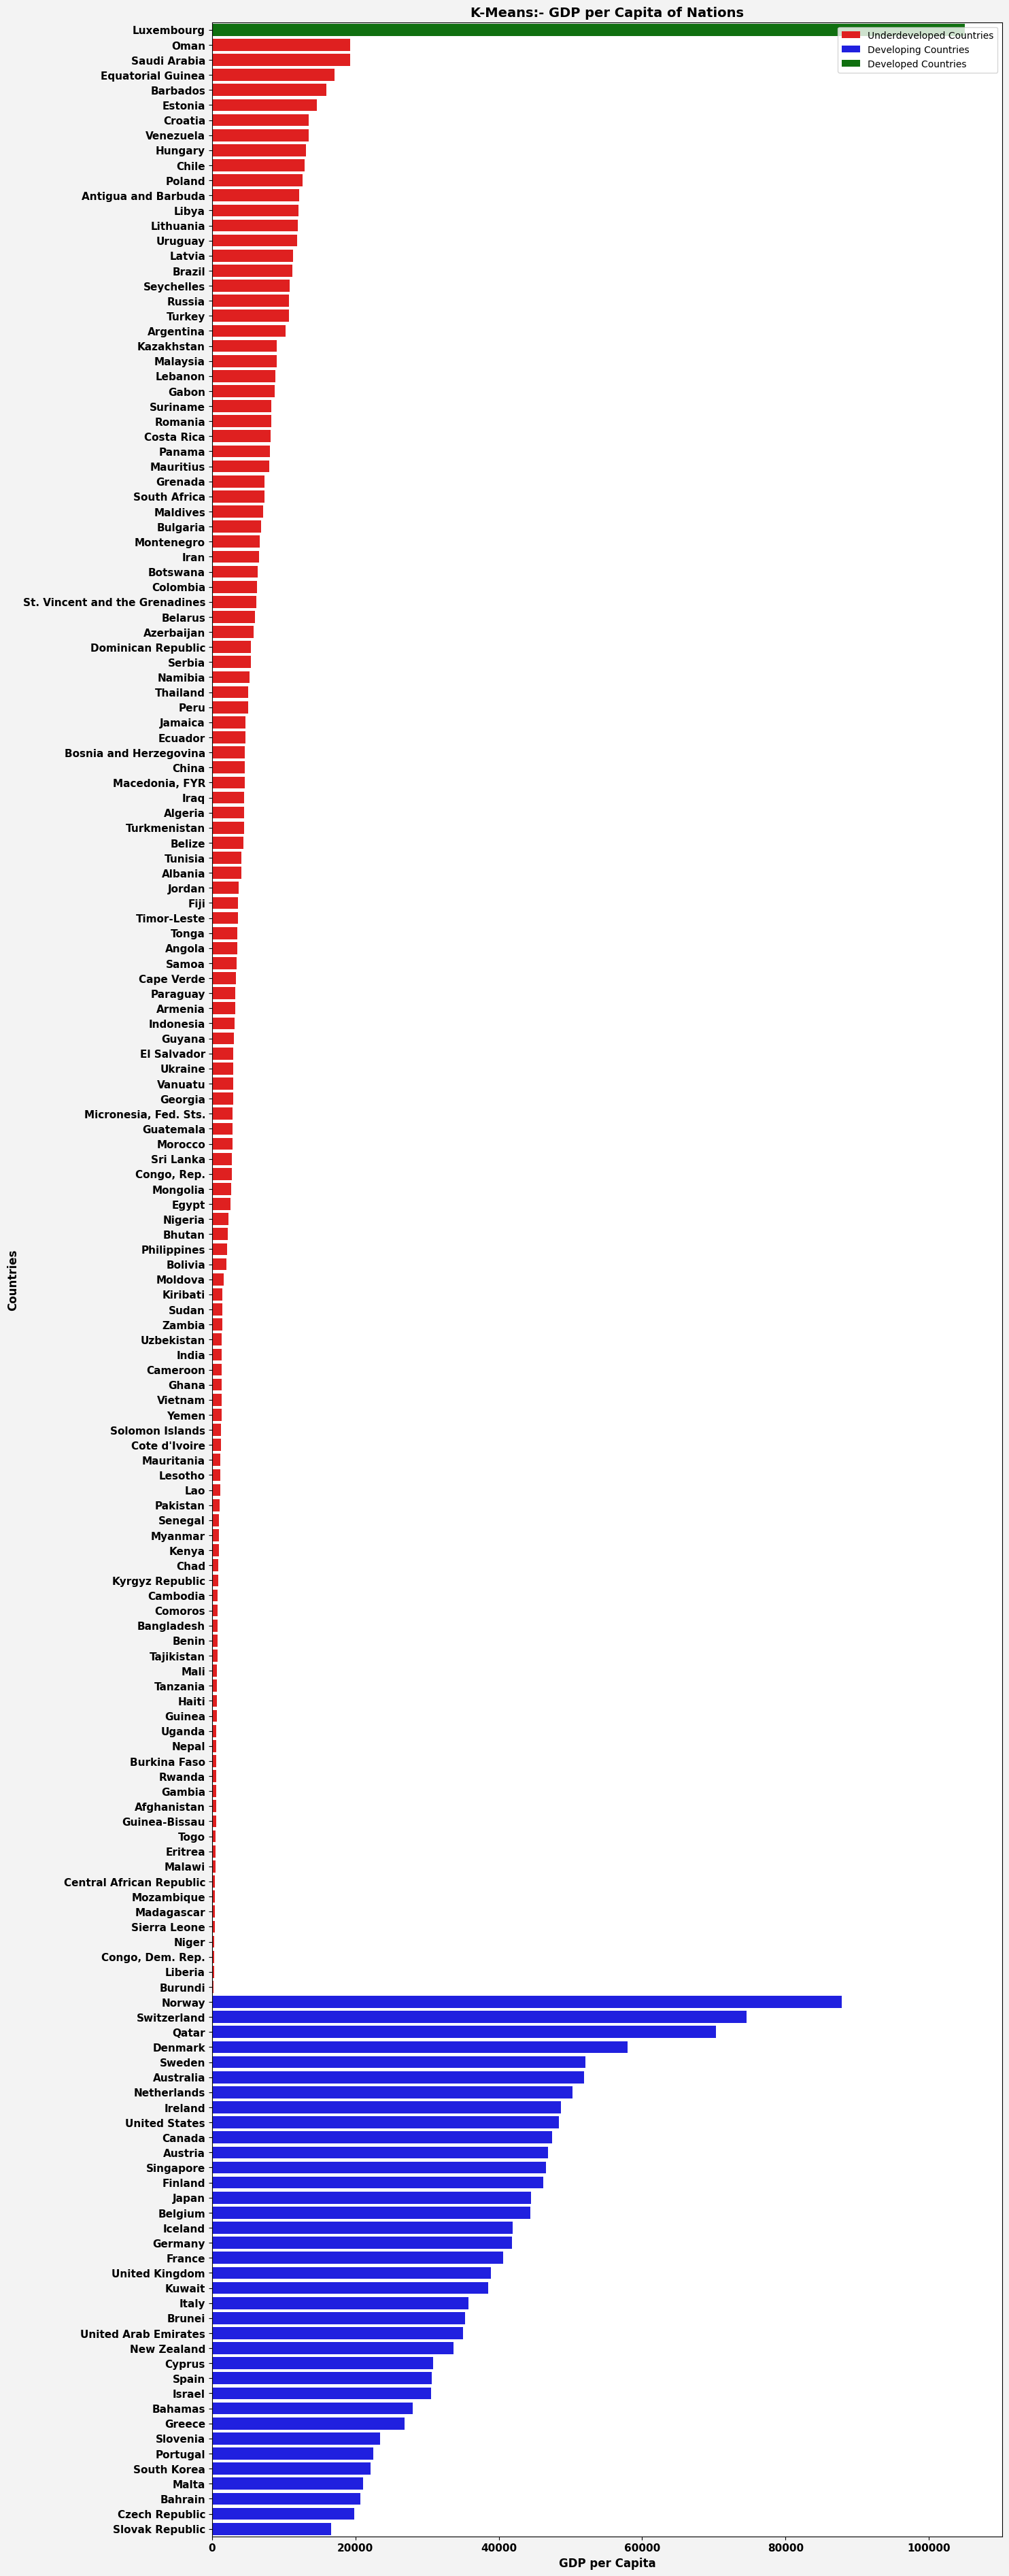

In [234]:
fig = plt.figure(figsize = (15,48))
fig.set_facecolor("#F3F3F3")
sns.barplot(data=d0, y='Country',x='GDP_per_capita', 
            hue=df0.sort_values(by= ['ClusterID','GDP_per_capita'], ascending = False).ClusterID, 
            palette=['r',"b","g"],
            order=df0.sort_values(by= ['ClusterID','GDP_per_capita'], ascending = False).Country,
            orient = 'h', 
            ci=None)
plt.legend(title=None, loc='upper right', labels=['Underdeveloped Countries','Developing Countries','Developed Countries'])
plt.title('K-Means:- GDP per Capita of Nations', fontsize=14, fontweight='bold')
plt.ylabel('Countries', fontsize=12, fontweight='bold')
plt.xlabel('GDP per Capita', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.show()

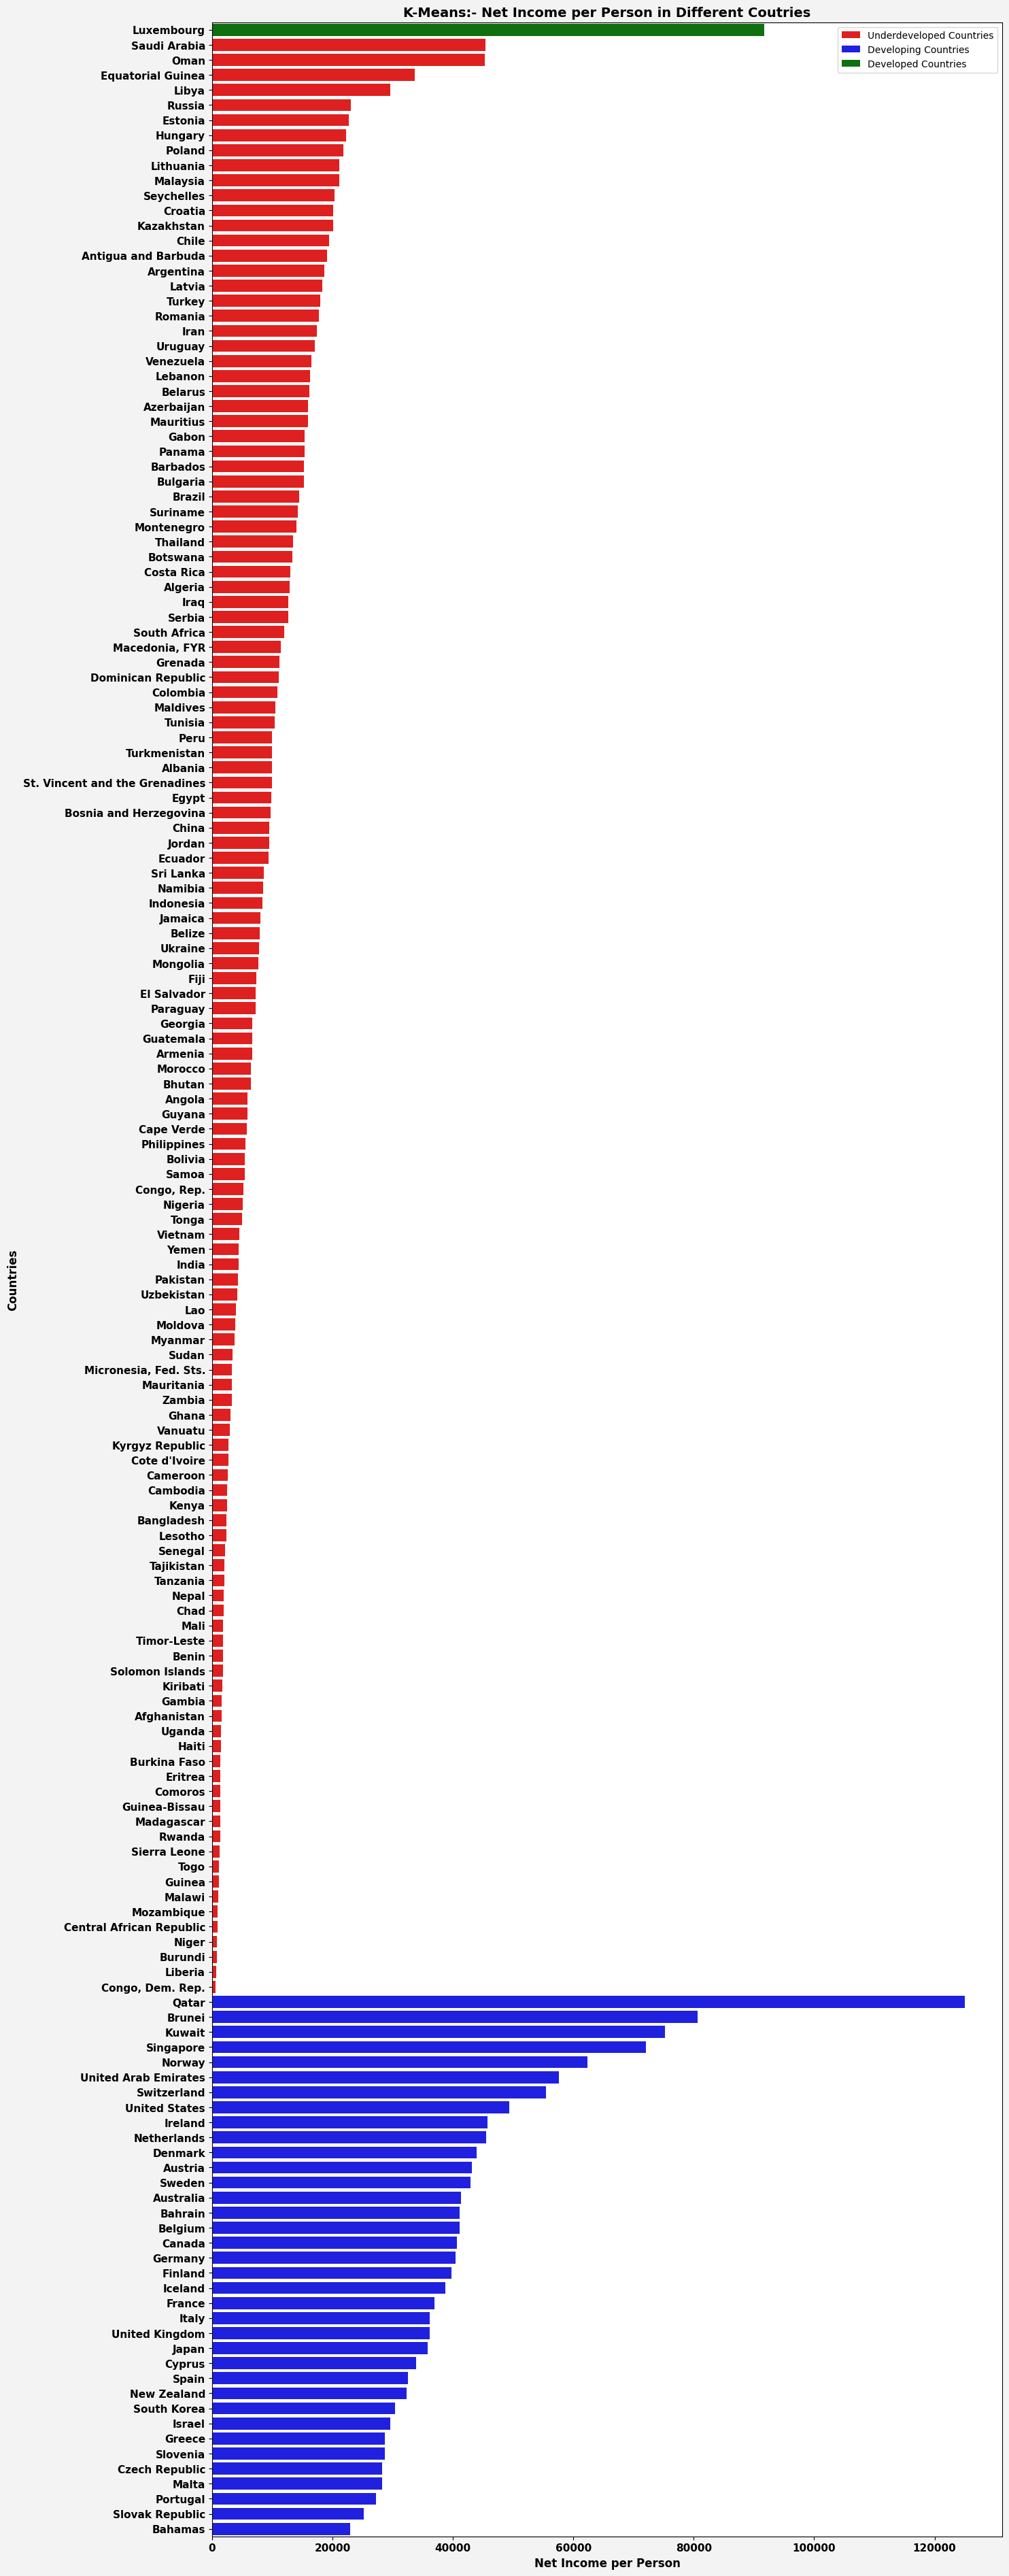

In [235]:
fig = plt.figure(figsize = (15,48))
fig.set_facecolor("#F3F3F3")
sns.barplot(data=d0, y='Country',x='Income', 
            hue=df0.sort_values(by= ['ClusterID','Income'], ascending = False).ClusterID, 
            palette=['r',"b","g"],
            order=df0.sort_values(by= ['ClusterID','Income'], ascending = False).Country,
            orient = 'h', 
            ci=None)
plt.legend(title=None, loc='upper right', labels=['Underdeveloped Countries','Developing Countries','Developed Countries'])
plt.title('K-Means:- Net Income per Person in Different Coutries', fontsize=14, fontweight='bold')
plt.ylabel('Countries', fontsize=12, fontweight='bold')
plt.xlabel('Net Income per Person', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.show()

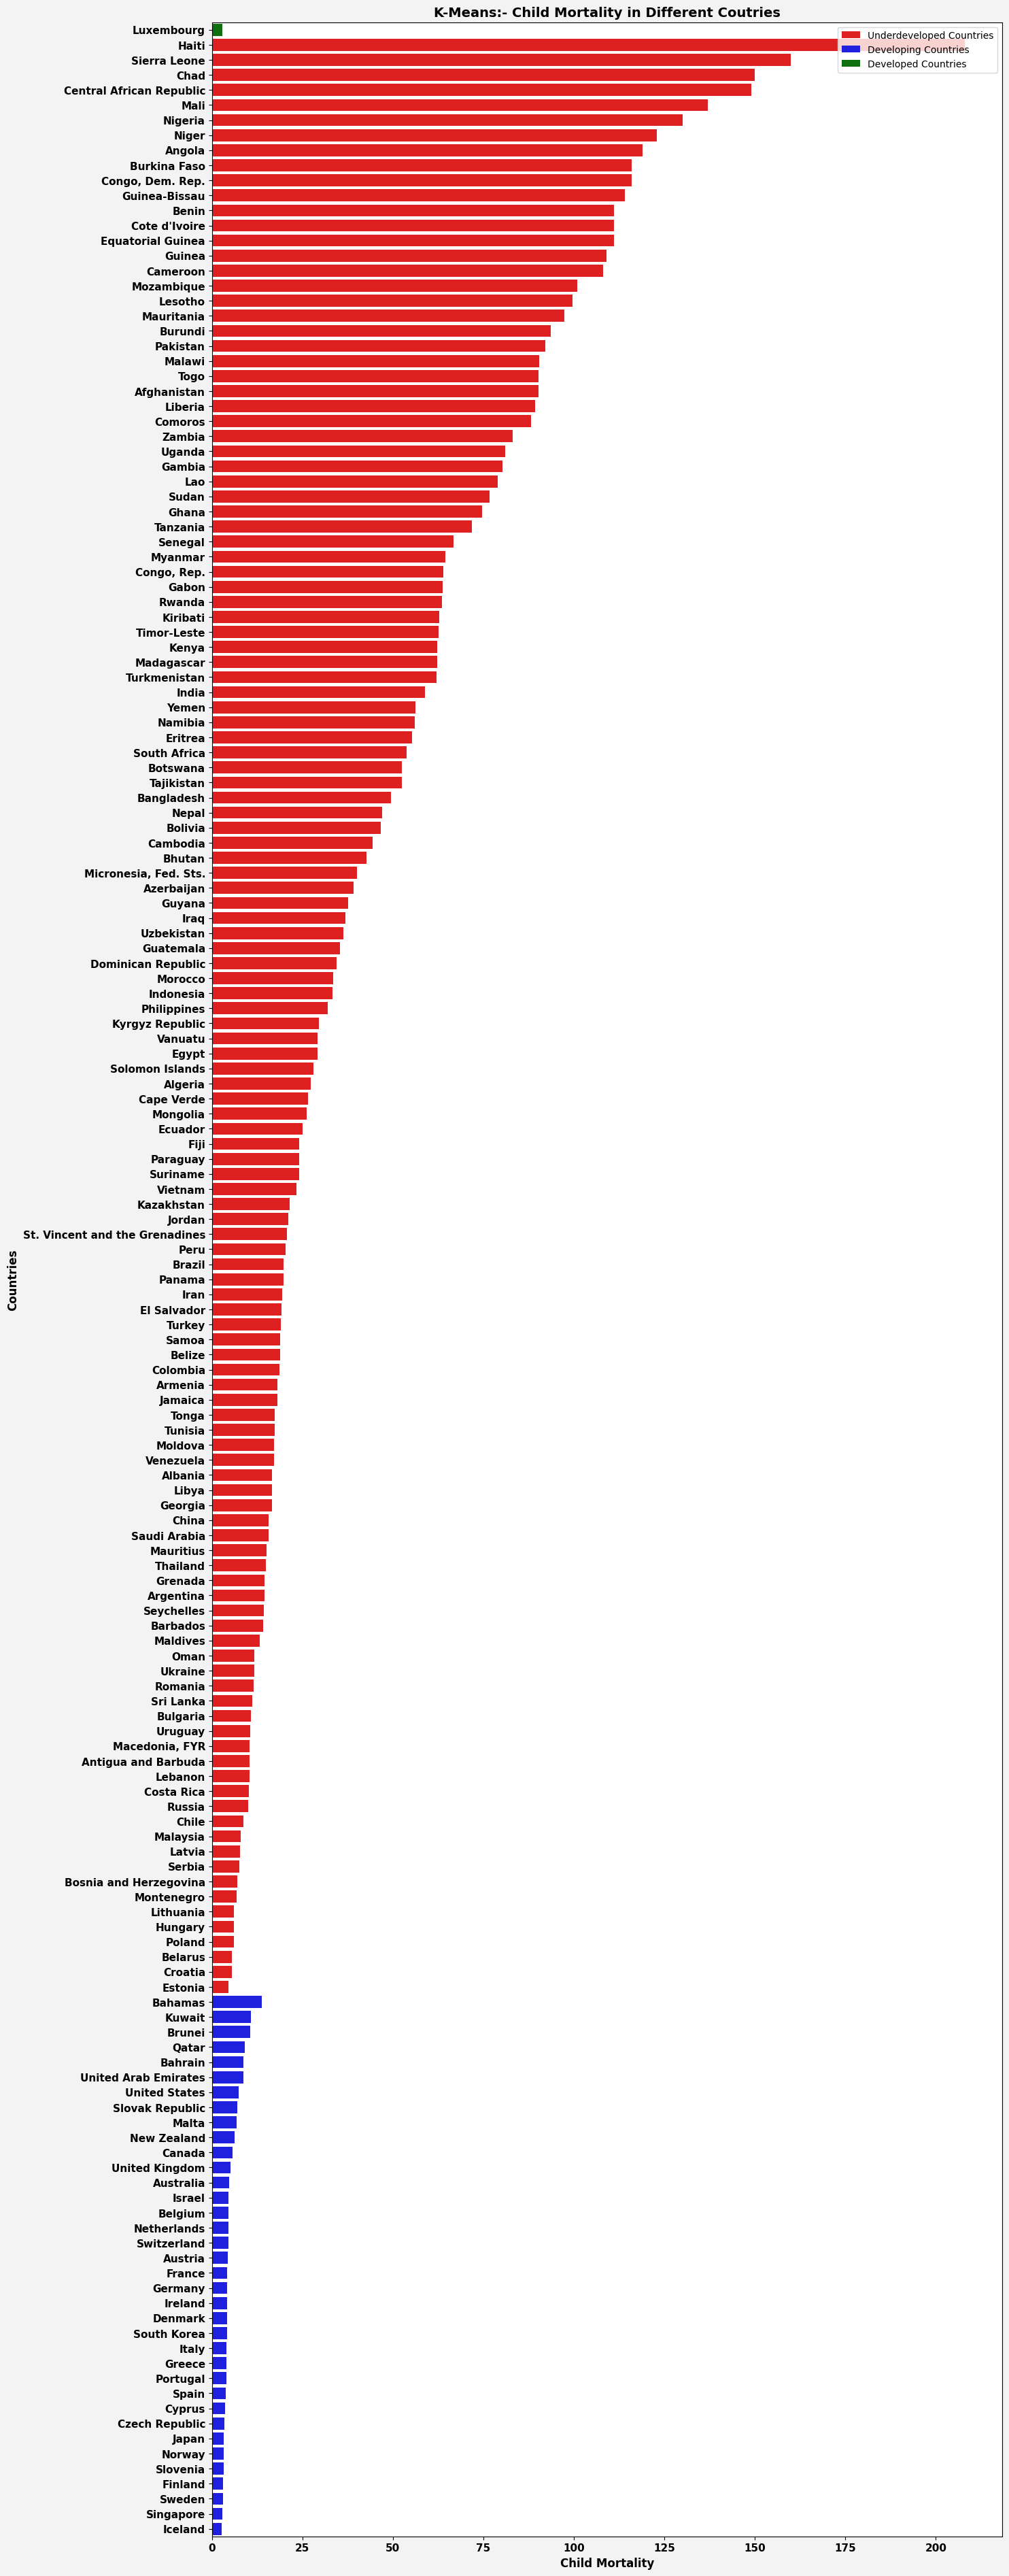

In [236]:
fig = plt.figure(figsize = (15,48))
fig.set_facecolor("#F3F3F3")
sns.barplot(data=d0, y='Country',x='Child_Mortality', 
            hue=df0.sort_values(by= ['ClusterID','Child_Mortality'], ascending = False).ClusterID, 
            palette=['r',"b","g"],
            order=df0.sort_values(by= ['ClusterID','Child_Mortality'], ascending = False).Country,
            orient = 'h', 
            ci=None)
plt.legend(title=None, loc='upper right', labels=['Underdeveloped Countries','Developing Countries','Developed Countries'])
plt.title('K-Means:- Child Mortality in Different Coutries', fontsize=14, fontweight='bold')
plt.ylabel('Countries', fontsize=12, fontweight='bold')
plt.xlabel('Child Mortality', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.show()

In [237]:
print(datastyle.start+'1. KMean:-Mean GDP per Capita of Under-Developed Nations         : '+ datastyle.end,df7.GDP_per_capita.iloc[[2]]);Line_Separator1()
print(datastyle.start+'2. KMean:-Mean Child Mortality of Under-Developed Nations        : '+ datastyle.end,df7.Child_Mortality.iloc[[2]]);Line_Separator1()
print(datastyle.start+'3. KMean:-Mean Net Income per Person of Under-Developed Nations  : '+ datastyle.end,df7.Income.iloc[[2]]);Line_Separator1()

1. KMean:-Mean GDP per Capita of Under-Developed Nations         :  2    105000.0
Name: GDP_per_capita, dtype: float64
**************************************************************************************************** 

2. KMean:-Mean Child Mortality of Under-Developed Nations        :  2    2.8
Name: Child_Mortality, dtype: float64
**************************************************************************************************** 

3. KMean:-Mean Net Income per Person of Under-Developed Nations  :  2    91700.0
Name: Income, dtype: float64
**************************************************************************************************** 



Further deep dive the countries through the filter which are in real need based on the value of Child Mortality, Child Mortality, and GDP per Capita identified above.

In [238]:
df8=country_data[country_data['GDP_per_capita']<df7['GDP_per_capita'][2]]
df8=df8[df8['Child_Mortality']>= df7['Child_Mortality'][2]]
df8=df8[df8['Income']<= df7['Income'][2]]

In [239]:
df9_k=pd.merge(df8,df_kmean,left_index=True,right_index=True)
df9_k.head(2)

Country  Child_Mortality  Exports  Health_Spending   Imports  Income  \
0  Afghanistan             90.2     55.3          41.9174   248.297    1610   
1      Albania             16.6   1145.2         267.8950  1987.740    9930   

   Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita       PC1  \
0       9.44             56.2             5.82             553 -2.636338   
1       4.49             76.3             1.65            4090 -0.023783   

        PC2      PC3       PC4       PC5  ClusterID  
0  1.472260 -0.54833  0.238302  0.061003          1  
1 -1.435535 -0.01547 -0.428278 -0.154305          1

In [240]:
df9_k=df9_k.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
df9_k.head(2)

Country  Child_Mortality  Exports  Health_Spending   Imports  Income  \
0  Afghanistan             90.2     55.3          41.9174   248.297    1610   
1      Albania             16.6   1145.2         267.8950  1987.740    9930   

   Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita  ClusterID  
0       9.44             56.2             5.82             553          1  
1       4.49             76.3             1.65            4090          1

In [241]:
# Check the number of columns and rows
print(datastyle.start+'Shape of df9_k dataset: '+datastyle.end,df9_k.shape)

Shape of df9_k dataset:  (164, 11)


In [242]:
# KMean:- Top five lowest Nations in GDP per Capita
print(datastyle.start+"KMean- Top five lowest Nations in GDP per Capita:\n"+ datastyle.end,df9_k.nsmallest(5,'GDP_per_capita').Country.values);Line_Separator1()
df9_k_top5_Low_GDPP_kmean=df9_k.nsmallest(5,'GDP_per_capita')
df9_k_top5_Low_GDPP_kmean

KMean- Top five lowest Nations in GDP per Capita:
 ['Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']
**************************************************************************************************** 



Country  Child_Mortality   Exports  Health_Spending  Imports  \
26            Burundi             93.6   20.6052          26.7960   90.552   
88            Liberia             89.3   62.4570          38.5860  302.802   
37   Congo, Dem. Rep.            116.0  137.2740          26.4194  165.664   
112             Niger            123.0   77.2560          17.9568  170.868   
132      Sierra Leone            160.0   67.0320          52.2690  137.655   

     Income  Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita  \
26      764      12.30             57.7             6.26             231   
88      700       5.47             60.8             5.02             327   
37      609      20.80             57.5             6.54             334   
112     814       2.55             58.8             7.49             348   
132    1220      17.20             55.0             5.20             399   

     ClusterID  
26           1  
88           1  
37           1  
112          1  
132          1

In [243]:
# Top five lowest Nations in Income per Person

print(datastyle.start+"K-Means:- Top five lowest Nations in Net Income per Person:\n"+ datastyle.end,df9_k.nsmallest(5,'Income').Country.values);Line_Separator1()
df9_k_top5_Low_income_kmean=df9_k.nsmallest(5,'Income')
df9_k_top5_Low_income_kmean

K-Means:- Top five lowest Nations in Net Income per Person:
 ['Congo, Dem. Rep.' 'Liberia' 'Burundi' 'Niger' 'Central African Republic']
**************************************************************************************************** 



Country  Child_Mortality   Exports  Health_Spending  \
37           Congo, Dem. Rep.            116.0  137.2740          26.4194   
88                    Liberia             89.3   62.4570          38.5860   
26                    Burundi             93.6   20.6052          26.7960   
112                     Niger            123.0   77.2560          17.9568   
31   Central African Republic            149.0   52.6280          17.7508   

     Imports  Income  Inflation  Life_Expectancy  Total_Fertility  \
37   165.664     609      20.80             57.5             6.54   
88   302.802     700       5.47             60.8             5.02   
26    90.552     764      12.30             57.7             6.26   
112  170.868     814       2.55             58.8             7.49   
31   118.190     888       2.01             47.5             5.21   

     GDP_per_capita  ClusterID  
37              334          1  
88              327          1  
26              231          1  
112             348          1  
31              446          1

In [244]:
# Top five lowest Nations in Child Mortality
print(datastyle.start+"K-Means:- Top five lowest Nations in Child Mortality:\n"+ datastyle.end,df9_k.nlargest(5,'Child_Mortality').Country.values);Line_Separator1()
df9_k_top5_high_childMort_kmean=df9_k.nlargest(5,'Child_Mortality')
df9_k_top5_high_childMort_kmean

K-Means:- Top five lowest Nations in Child Mortality:
 ['Haiti' 'Sierra Leone' 'Chad' 'Central African Republic' 'Mali']
**************************************************************************************************** 



Country  Child_Mortality  Exports  Health_Spending  \
66                      Haiti            208.0  101.286          45.7442   
132              Sierra Leone            160.0   67.032          52.2690   
32                       Chad            150.0  330.096          40.6341   
31   Central African Republic            149.0   52.628          17.7508   
97                       Mali            137.0  161.424          35.2584   

     Imports  Income  Inflation  Life_Expectancy  Total_Fertility  \
66   428.314    1500       5.45             32.1             3.33   
132  137.655    1220      17.20             55.0             5.20   
32   390.195    1930       6.39             56.5             6.59   
31   118.190     888       2.01             47.5             5.21   
97   248.508    1870       4.37             59.5             6.55   

     GDP_per_capita  ClusterID  
66              662          1  
132             399          1  
32              897          1  
31              446          1  
97              708          1

**Hierarchical Clustering**

In [245]:
# Create the dataframe for 5 PC
prinComp_df1 = pd.DataFrame({'PC1':pc5[0],'PC2':pc5[1],'PC3':pc5[2],'PC4':pc5[3],'PC5':pc5[4]})
prinComp_df1.head(2)

PC1       PC2      PC3       PC4       PC5
0 -2.636338  1.472260 -0.54833  0.238302  0.061003
1 -0.023783 -1.435535 -0.01547 -0.428278 -0.154305

In [246]:
# Check the number of columns and rows wihtout outlier treatement 
print(datastyle.start+'Shape of Five PC Dataset: '+datastyle.end,prinComp_df1.shape)

Shape of Five PC Dataset:  (167, 5)


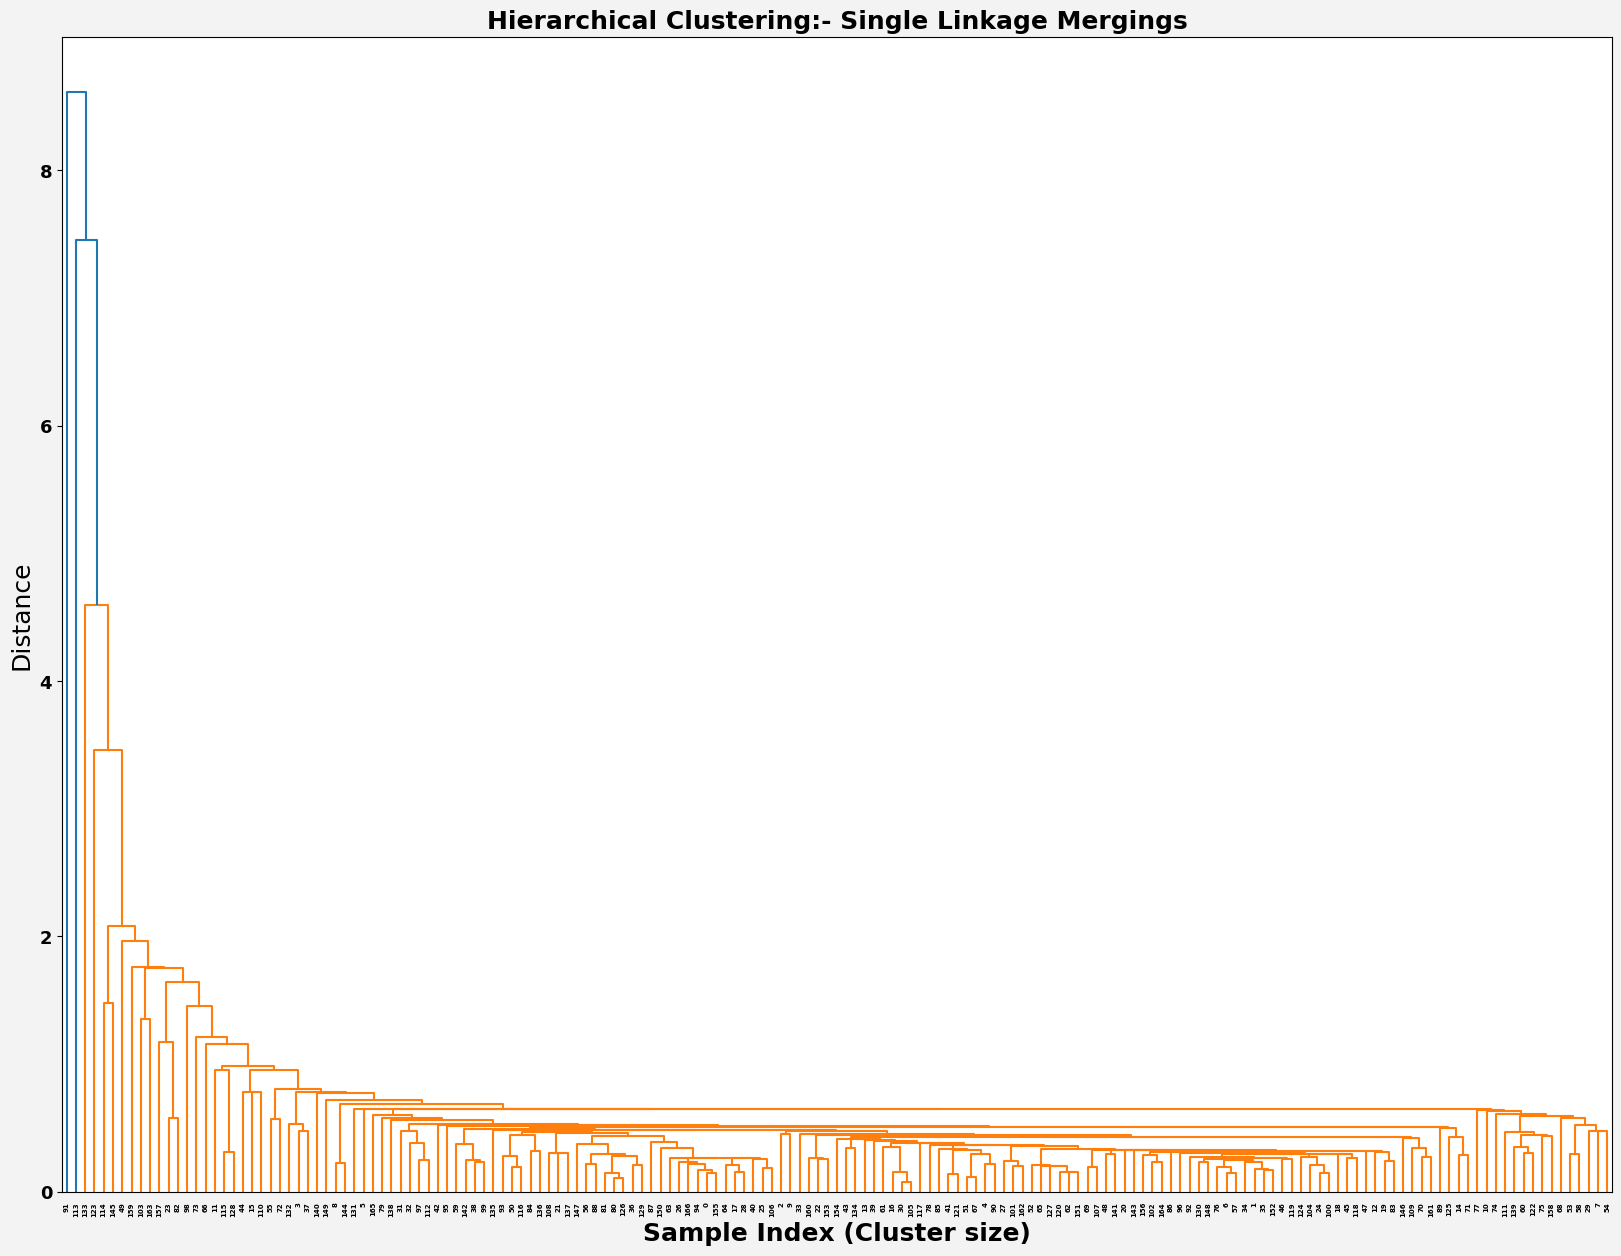

Silhouette Score: 0.5560636672849509


In [287]:
mergings=linkage(prinComp_df1, method='single', metric='euclidean')
fig = plt.figure(figsize = (20,15))
fig.set_facecolor("#F3F3F3")
dendrogram(mergings)
plt.title('Hierarchical Clustering:- Single Linkage Mergings', fontsize=18, fontweight='bold')
plt.ylabel('Distance', fontsize=18)
plt.xlabel('Sample Index (Cluster size)', fontsize=18, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(size = 13, fontweight='bold')
plt.show()

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

distance_threshold = 2.4
cluster_labels = fcluster(mergings, distance_threshold, criterion='distance')
# Add cluster labels to the DataFrame
prinComp_df1['Cluster'] = cluster_labels

sil_score = silhouette_score(prinComp_df1, cluster_labels)
print(f'Silhouette Score: {sil_score}')

# Rename columns to "Feature_i"
prinComp_df1.columns = [f"Feature_{i+1}" for i in range(prinComp_df1.shape[1] - 1)] + ["Cluster"]

# Save the DataFrame to a CSV file
prinComp_df1.to_csv('cluster.csv', index=False)


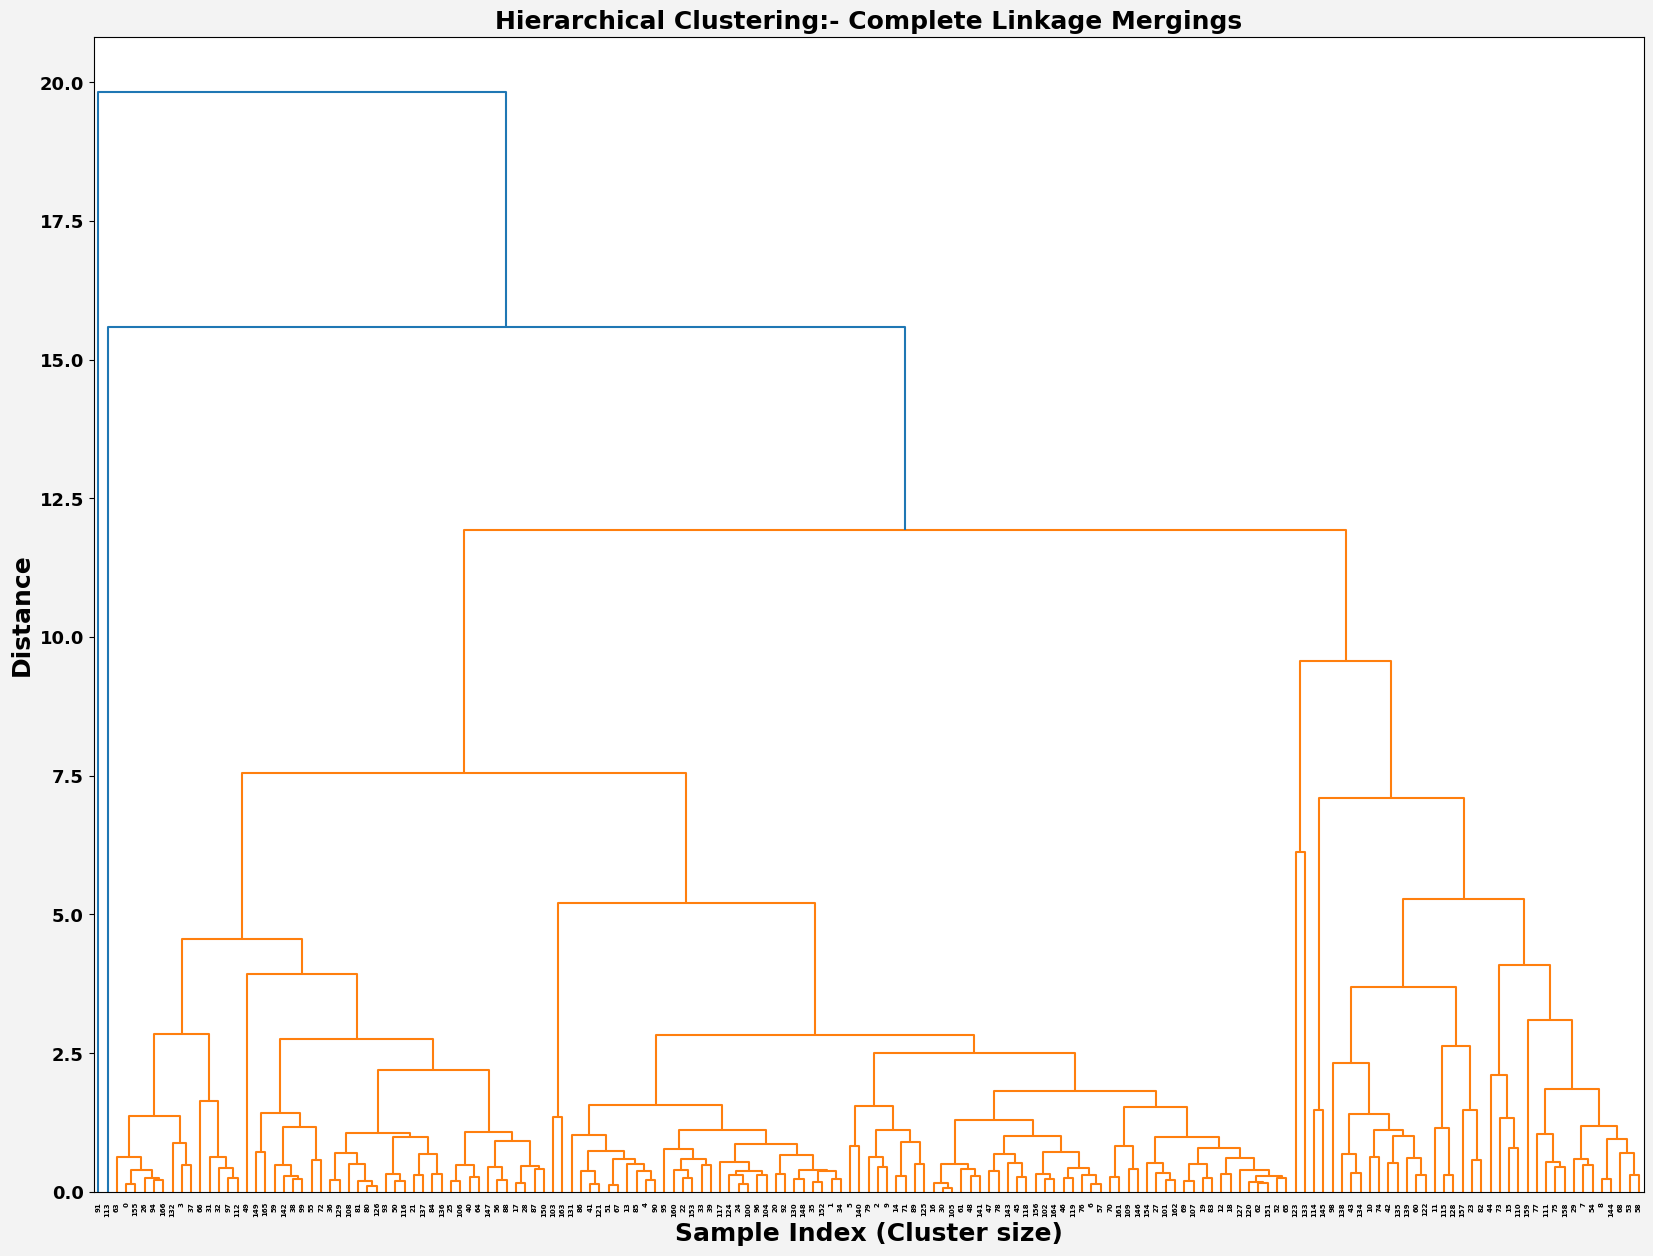

In [248]:
mergings=linkage(prinComp_df1, method='complete', metric='euclidean')
fig = plt.figure(figsize = (20,15))
fig.set_facecolor("#F3F3F3")
dendrogram(mergings)
plt.title('Hierarchical Clustering:- Complete Linkage Mergings', fontsize=18, fontweight='bold')
plt.ylabel('Distance', fontsize=18, fontweight='bold')
plt.xlabel('Sample Index (Cluster size)', fontsize=18, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(size = 13, fontweight='bold')
plt.show()

After reviewing the dendrogram, cutting it at n=5 is the most optimum.

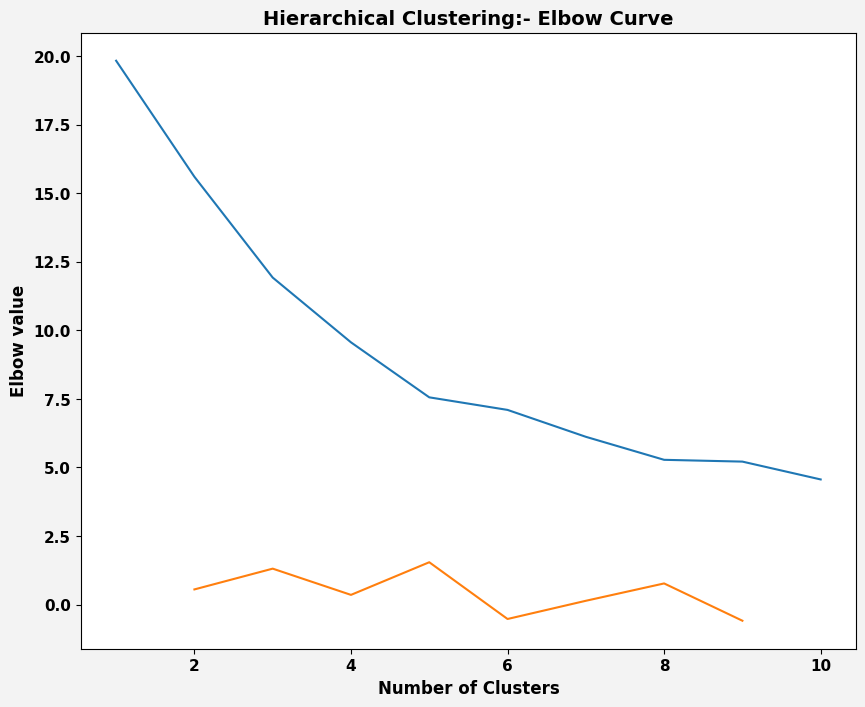

**************************************************************************************************** 

Clusters: 6


In [249]:
# Elbow Method
fig = plt.figure(figsize = (10,8))
fig.set_facecolor("#F3F3F3")
last = mergings[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.title('Hierarchical Clustering:- Elbow Curve', fontsize=14, fontweight='bold')
plt.ylabel('Elbow value', fontsize=12, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.show();Line_Separator1()

k = acceleration_rev.argmax() + 3  # if idx 0 is the max of this we want 3 clusters

print (datastyle.start+"Clusters:"+datastyle.end, k)

In [250]:
cut_tree(mergings,n_clusters=5).shape

(167, 1)

In [251]:
clusterCut_labels = cut_tree(mergings, n_clusters = 5).reshape(-1,)
clusterCut_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 4, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [252]:
df_kmean['ClusterID_H']=clusterCut_labels
df_kmean.head(2)

PC1       PC2      PC3       PC4       PC5  ClusterID  ClusterID_H
0 -2.636338  1.472260 -0.54833  0.238302  0.061003          1            0
1 -0.023783 -1.435535 -0.01547 -0.428278 -0.154305          1            0

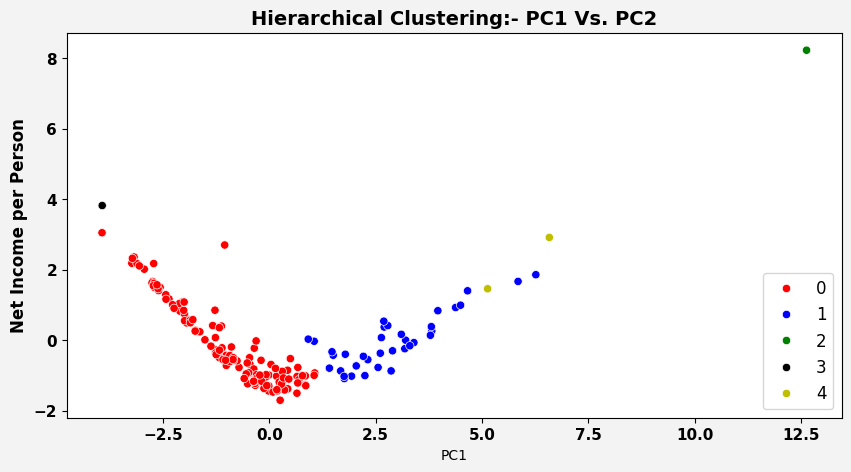

In [253]:
fig = plt.figure(figsize = (10,5))
fig.set_facecolor("#F3F3F3")

colr = {0: "r", 1: "b", 2:"g", 3:'k', 4:'y'}
sns.scatterplot(x="PC1", y="PC2", data=df_kmean, hue = "ClusterID_H",palette=colr)
plt.legend(fontsize=12, loc='lower right') 
plt.title('Hierarchical Clustering:- PC1 Vs. PC2',fontsize=14, fontweight='bold')
plt.ylabel('Net Income per Person', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')
plt.show()

The scatter plot graph clearly distinguishes countries into five clusters.

1. These five clusters identify as highly developed, developed, developing, and under-developed – low and under-developed- high countries based on mean GDP per capita.

2. After EDA of Hierarchical clustering dataset. We could take a call on reducing clustering into three manually: The detail would be : 

3. For Further simplification, highly developed and developed countries combined since the highly developed country has only one country. Similarly, under-developed- Low and under-developed- high can be combined.

This way, the cluster can be further simplified as developed, developing, and under-developed countries.

In [254]:
df10_h=pd.merge(country_data,df_kmean, left_index=True,right_index=True)
df10_h.head(2)

Country  Child_Mortality  Exports  Health_Spending   Imports  Income  \
0  Afghanistan             90.2     55.3          41.9174   248.297    1610   
1      Albania             16.6   1145.2         267.8950  1987.740    9930   

   Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita       PC1  \
0       9.44             56.2             5.82             553 -2.636338   
1       4.49             76.3             1.65            4090 -0.023783   

        PC2      PC3       PC4       PC5  ClusterID  ClusterID_H  
0  1.472260 -0.54833  0.238302  0.061003          1            0  
1 -1.435535 -0.01547 -0.428278 -0.154305          1            0

In [255]:
df11_h=df10_h.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
print(datastyle.start+'Shape of Hierarchical Clustering (df11_h) Dataset: '+datastyle.end,df11_h.shape)

Shape of Hierarchical Clustering (df11_h) Dataset:  (167, 12)


In [256]:
# Review the H-clustering final dataset
df11_h.head(2)

Country  Child_Mortality  Exports  Health_Spending   Imports  Income  \
0  Afghanistan             90.2     55.3          41.9174   248.297    1610   
1      Albania             16.6   1145.2         267.8950  1987.740    9930   

   Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita  ClusterID  \
0       9.44             56.2             5.82             553          1   
1       4.49             76.3             1.65            4090          1   

   ClusterID_H  
0            0  
1            0

In [257]:
# Number of clusters and number of countries in each cluster
print(datastyle.start+"H-clustering: The Number of Clusters and Number of Countries in Each Cluster"+datastyle.end)
print(df11_h['ClusterID_H'].value_counts());Line_Separator()

H-clustering: The Number of Clusters and Number of Countries in Each Cluster
ClusterID_H
0    127
1     36
4      2
2      1
3      1
Name: count, dtype: int64
************************************************** 



In [258]:
# Analyse the mean of all the variables of each cluster obtained after H clustering
cluster_Child_Mortality=pd.DataFrame(df11_h.groupby(["ClusterID_H"]).Child_Mortality.mean())
cluster_Exports=pd.DataFrame(df11_h.groupby(["ClusterID_H"]).Exports.mean())
cluster_Health_Spending=pd.DataFrame(df11_h.groupby(["ClusterID_H"]).Health_Spending.mean())
cluster_Imports=pd.DataFrame(df11_h.groupby(["ClusterID_H"]).Imports.mean())
cluster_Income=pd.DataFrame(df11_h.groupby(["ClusterID_H"]).Income.mean())
cluster_Inflation=pd.DataFrame(df11_h.groupby(["ClusterID_H"]).Inflation.mean())
cluster_Life_Expectancy=pd.DataFrame(df11_h.groupby(["ClusterID_H"]).Life_Expectancy.mean())
cluster_Total_Fertility=pd.DataFrame(df11_h.groupby(["ClusterID_H"]).Total_Fertility.mean())
cluster_GDP_per_capita=pd.DataFrame(df11_h.groupby(["ClusterID_H"]).GDP_per_capita.mean())

In [259]:
# Merge the dataset
df12_h=pd.concat([cluster_Child_Mortality,cluster_Exports,cluster_Health_Spending,cluster_Imports,
                  cluster_Income,cluster_Inflation,cluster_Life_Expectancy,cluster_Total_Fertility,
                  cluster_GDP_per_capita],axis=1).reset_index()
df12_h.head(2)

ClusterID_H  Child_Mortality       Exports  Health_Spending       Imports  \
0            0        47.558268   1953.259508       285.526331   2069.379387   
1            1         5.738889  18606.750000      3578.282778  16392.300000   

         Income  Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita  
0   8663.094488   8.401528        67.816535         3.272835     4458.929134  
1  40805.555556   3.278278        79.613889         1.832500    38180.555556

In [260]:
# Under-developed countries are further classified into three sub-groups (low, high, and medium)

print(datastyle.start+"1."+ datastyle.end, "Replaced 0 to Under-developed Countries-Low")
print(datastyle.start+"2."+ datastyle.end, "Replaced 1 to Developing Countries")
print(datastyle.start+"3."+ datastyle.end, "Replaced 2 to Developed Countries")
print(datastyle.start+"4."+ datastyle.end, "Replaced 3 to Highly Developed Countries")
print(datastyle.start+"5."+ datastyle.end, "Replaced 4 to Under-developed Countries-High");Line_Separator()


def replace_number_to_name(x,y):
    df12_h.ClusterID_H.replace(x,y, inplace=True)

replace_number_to_name(0,'Under-developed Countries-Low')
replace_number_to_name(1,'Developing Countries')
replace_number_to_name(2,'Developed Countries')
replace_number_to_name(3,'Highly Developed Countries')
replace_number_to_name(4,'Under-developed Countries-High')

1. Replaced 0 to Under-developed Countries-Low
2. Replaced 1 to Developing Countries
3. Replaced 2 to Developed Countries
4. Replaced 3 to Highly Developed Countries
5. Replaced 4 to Under-developed Countries-High
************************************************** 



In [261]:
df12_h

ClusterID_H  Child_Mortality        Exports  \
0   Under-developed Countries-Low        47.558268    1953.259508   
1            Developing Countries         5.738889   18606.750000   
2             Developed Countries         2.800000  183750.000000   
3      Highly Developed Countries       130.000000     589.490000   
4  Under-developed Countries-High         5.900000   68498.450000   

   Health_Spending        Imports        Income   Inflation  Life_Expectancy  \
0       285.526331    2069.379387   8663.094488    8.401528        67.816535   
1      3578.282778   16392.300000  40805.555556    3.278278        79.613889   
2      8158.500000  149100.000000  91700.000000    3.620000        81.300000   
3       118.131000     405.420000   5150.000000  104.000000        60.500000   
4      1558.895000   48907.700000  98550.000000    3.467000        81.100000   

   Total_Fertility  GDP_per_capita  
0         3.272835     4458.929134  
1         1.832500    38180.555556  
2         1.630000   105000.000000  
3         5.840000     2330.000000  
4         1.610000    58450.000000

In [262]:
df11_h1=df11_h

print(datastyle.start+"1."+ datastyle.end, "Replaced 0 to Under-developed Countries-Low")
print(datastyle.start+"2."+ datastyle.end, "Replaced 1 to Developing Countries")
print(datastyle.start+"3."+ datastyle.end, "Replaced 2 to Developed Countries")
print(datastyle.start+"4."+ datastyle.end, "Replaced 3 to Highly Developed Countries")
print(datastyle.start+"5."+ datastyle.end, "Replaced 3 to Under-developed Countries-High");Line_Separator()

def replace_number_to_name(x,y):
    df11_h1.ClusterID_H.replace(x,y, inplace=True)

replace_number_to_name(0,'Under-developed Countries-Low')
replace_number_to_name(1,'Developing Countries')
replace_number_to_name(2,'Developed Countries')
replace_number_to_name(3,'Highly Developed Countries')
replace_number_to_name(4,'Under-developed Countries-High')

1. Replaced 0 to Under-developed Countries-Low
2. Replaced 1 to Developing Countries
3. Replaced 2 to Developed Countries
4. Replaced 3 to Highly Developed Countries
5. Replaced 3 to Under-developed Countries-High
************************************************** 



Using PCA followed by Hierarchical clustering, we identified countries below under-developed - low. We will use the mean value (GDP per Capita, Child Mortality, and Income) of under-developed countries (as baseline) to get further deep dive to get the top five countries in real need of funding.

In [263]:
df12_h.sort_values(by=['GDP_per_capita']).ClusterID_H

3        Highly Developed Countries
0     Under-developed Countries-Low
1              Developing Countries
4    Under-developed Countries-High
2               Developed Countries
Name: ClusterID_H, dtype: object

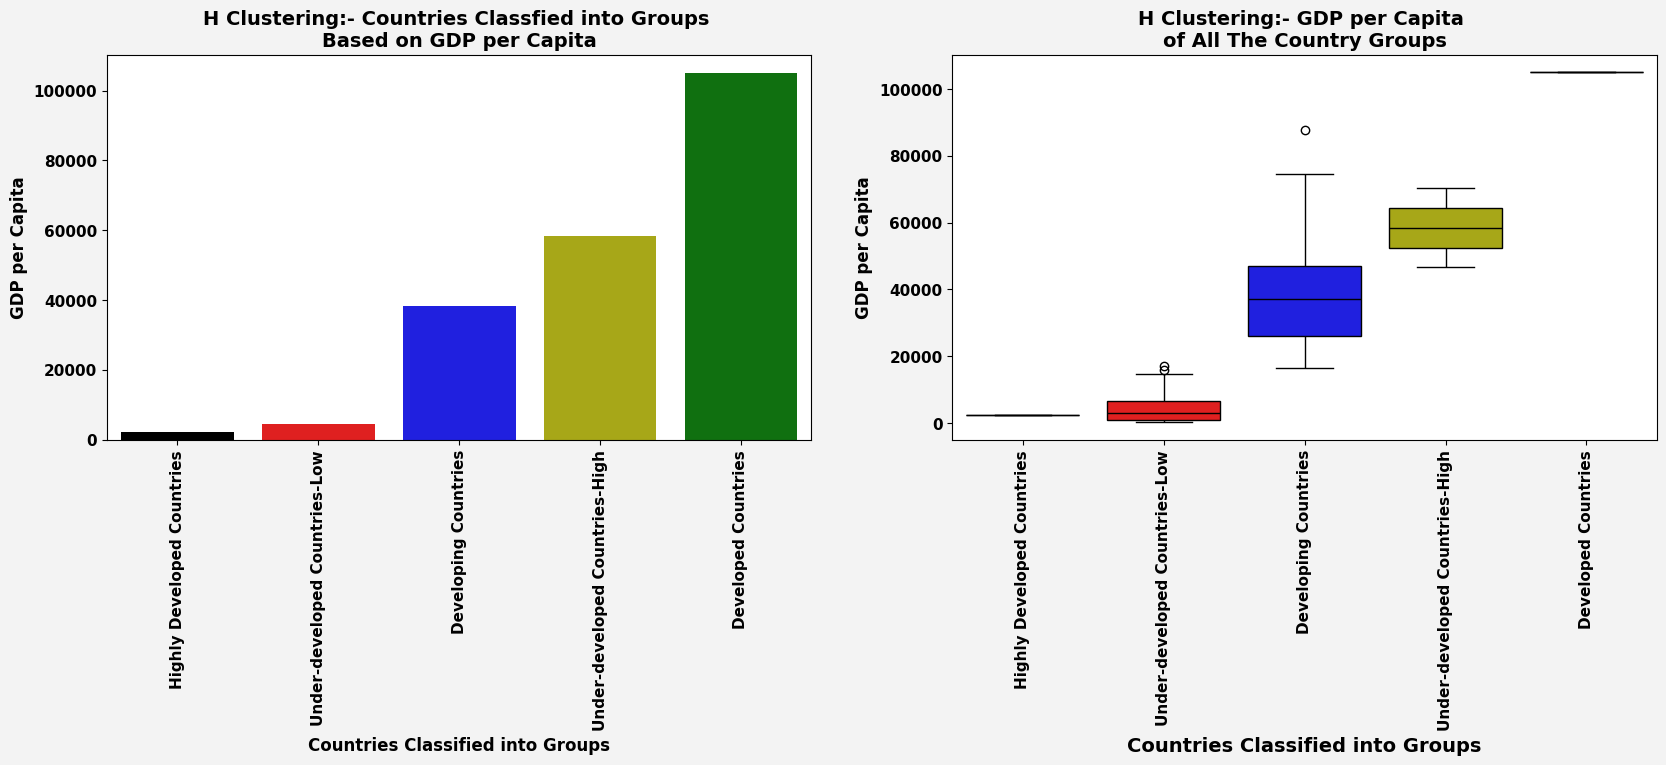

In [264]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(121)

colr = {'Under-developed Countries-Low': 'r' , 'Under-developed Countries-High': 'y' , 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.barplot(data=df12_h.sort_values(by=['GDP_per_capita']), x='ClusterID_H',y='GDP_per_capita', 
            hue=df12_h.sort_values(by=['GDP_per_capita']).ClusterID_H, 
            palette=colr,dodge=False)

plt.legend([],[], frameon=False)
plt.title('H Clustering:- Countries Classfied into Groups \nBased on GDP per Capita', fontsize=14, fontweight='bold')
plt.ylabel('GDP per Capita', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')

plt.subplot(122)
colr = {'Under-developed Countries-Low': 'r' , 'Under-developed Countries-High': 'y' , 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.boxplot(x='ClusterID_H',y='GDP_per_capita',
         data=df11_h.sort_values(by=['GDP_per_capita']), palette=colr,
         order = df12_h.sort_values(by=['GDP_per_capita']).ClusterID_H)

plt.title('H Clustering:- GDP per Capita \nof All The Country Groups',fontsize=14,fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=14, fontweight='bold')
plt.ylabel('GDP per Capita', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')

plt.show()

Similar observations to K mean clustering data set EDA: 

**GDP per Capita (Bar Chart):** GDP per capita of countries were directly proportionate to countries' developmental status.

**GDP per Capita (Box-plot):** Developed countries' GDP per Capita was observed to be approximately five times higher than developing countries. However, developing countries' GDP per capita was twice that of under-developed countries. Highly developed countrys' GDP per capita was approximately two times higher than developed countries.

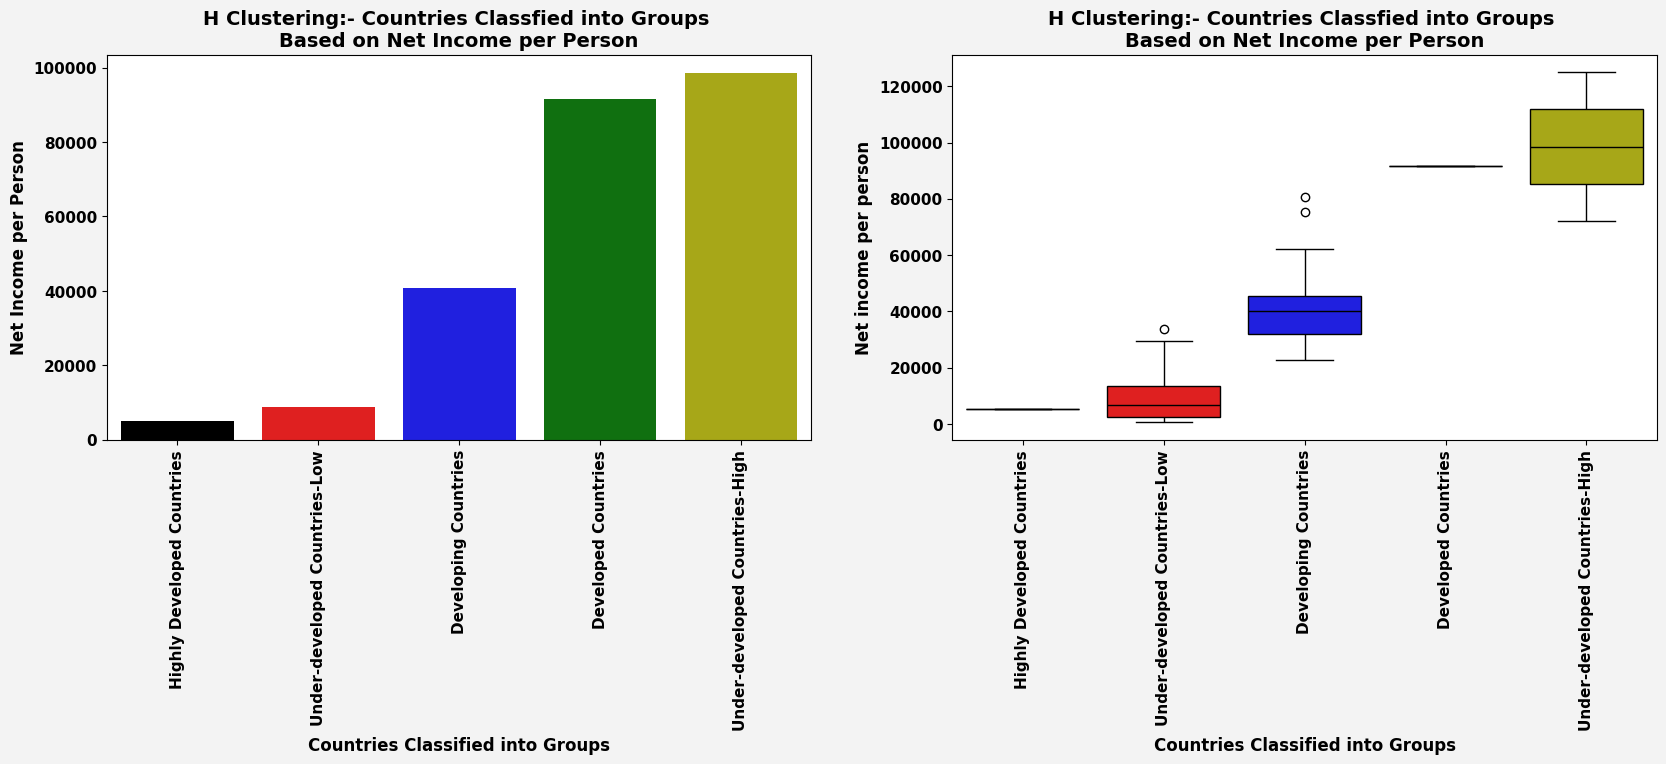

In [265]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(121)

colr = {'Under-developed Countries-Low': 'r' , 'Under-developed Countries-High': 'y' , 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.barplot(data=df12_h.sort_values(by=['Income']), x='ClusterID_H',y='Income', 
            hue=df12_h.sort_values(by=['Income']).ClusterID_H, 
            palette=colr,dodge=False)

plt.legend([],[], frameon=False)
plt.title('H Clustering:- Countries Classfied into Groups \nBased on Net Income per Person', 
          fontsize=14, fontweight='bold')
plt.ylabel('Net Income per Person', 
           fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', 
           fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')

plt.subplot(122)
colr = {'Under-developed Countries-Low': 'r' , 'Under-developed Countries-High': 'y' , 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.boxplot(x='ClusterID_H',y='Income',data=df11_h.sort_values(by=['Income']), palette=colr,
           order = df12_h.sort_values(by=['Income']).ClusterID_H)

plt.title('H Clustering:- Countries Classfied into Groups \nBased on Net Income per Person', 
          fontsize=14,fontweight='bold' )
plt.ylabel('Net income per person', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')

plt.show()

**Net Income per Person (Bar Plot):** Similarly, the net income per person was also directly proportionate to the developmental status of countries.

**Net Incomer pre-Person (Box-plot):** Net income per person in developed countries is approximately three times higher than in developing countries. The same difference identified between developing and under-developed countries – Low & high. Highly developed country net incomer per person was approximately 2-times higher than developed countries.

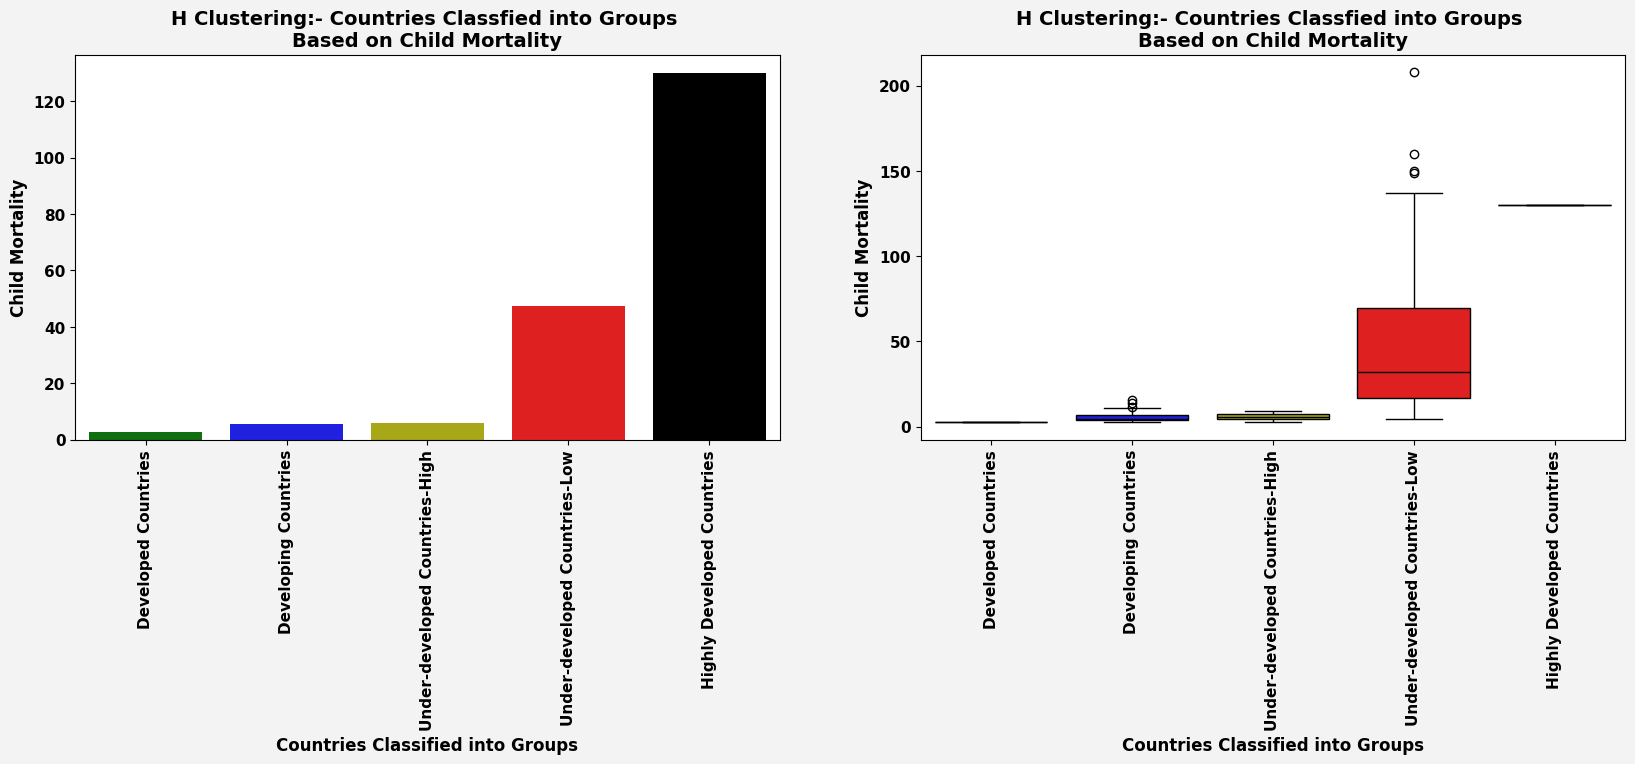

In [266]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(121)

colr = {'Under-developed Countries-Low': 'r' , 'Under-developed Countries-High': 'y' , 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.barplot(data=df12_h.sort_values(by=['Child_Mortality']), x='ClusterID_H',y='Child_Mortality', 
            hue=df12_h.sort_values(by=['Child_Mortality']).ClusterID_H, 
            palette=colr,dodge=False)

plt.legend([],[], frameon=False)
plt.title('H Clustering:- Countries Classfied into Groups \nBased on Child Mortality', 
          fontsize=14,
          fontweight='bold')
plt.ylabel('Child Mortality', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')


plt.subplot(122)

colr = {'Under-developed Countries-Low': 'r' , 'Under-developed Countries-High': 'y' , 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.boxplot(x='ClusterID_H',y='Child_Mortality',data=df11_h.sort_values(by=['Child_Mortality']), palette=colr,
           order = df12_h.sort_values(by=['Child_Mortality']).ClusterID_H)

plt.title('H Clustering:- Countries Classfied into Groups \nBased on Child Mortality', 
          fontsize=14, fontweight='bold')
plt.ylabel('Child Mortality', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')

plt.show()

**Child mortality(Bar Chart):** As expected, child mortality was inversely proportional to the developmental status of countries.

**Child mortality (Box - Plot):** Child mortality of under-developed countries both Low & high shows approximately four times higher than developing countries, which was about seven times higher than developed countries.

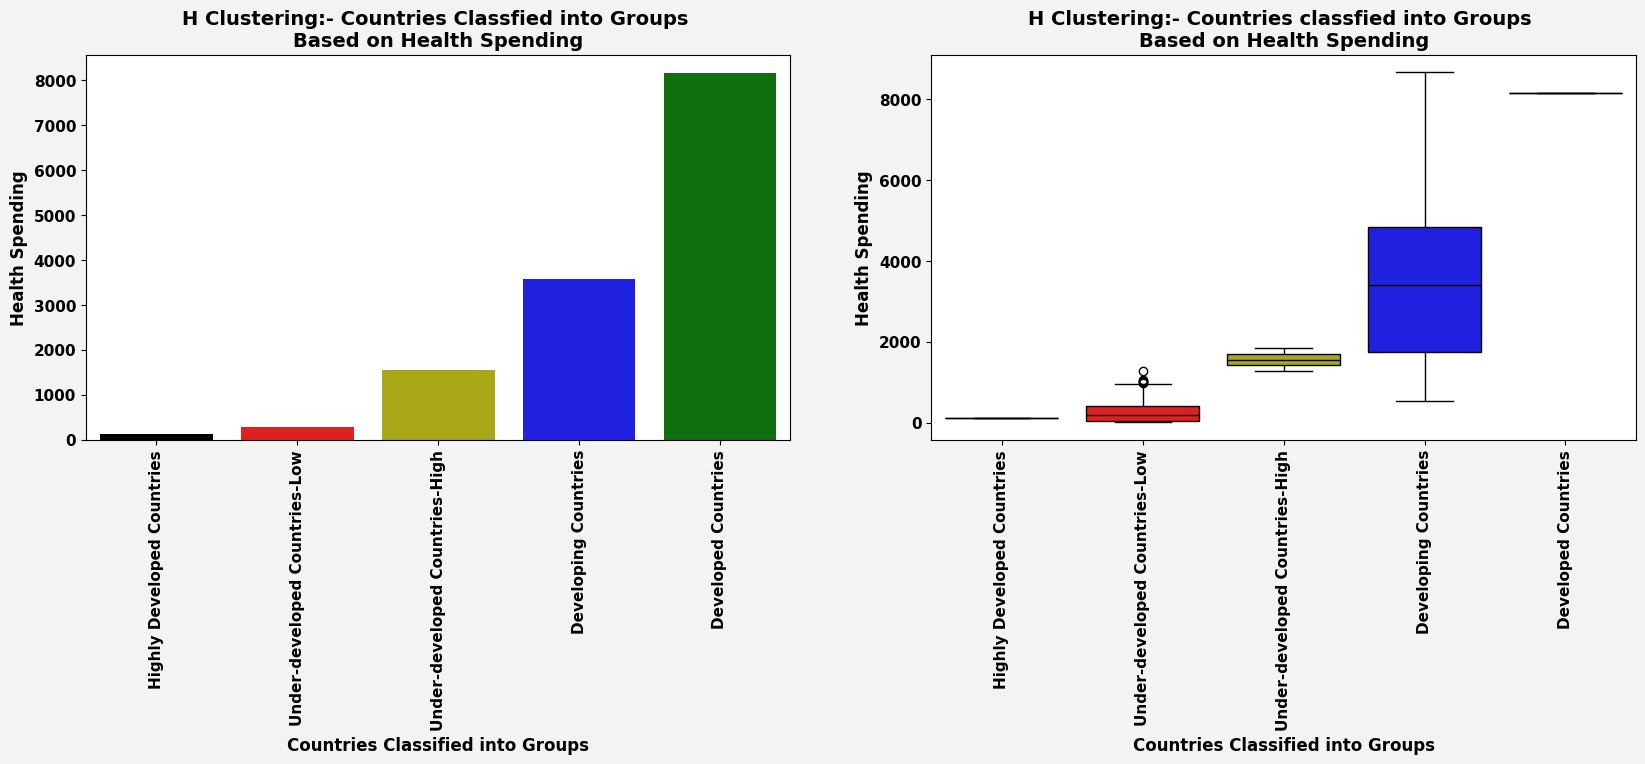

In [267]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(121)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.barplot(data=df12_h.sort_values(by=['Health_Spending']), x='ClusterID_H',y='Health_Spending', 
            hue=df12_h.sort_values(by=['Health_Spending']).ClusterID_H, 
            palette=colr,dodge=False)

plt.legend([],[], frameon=False)
plt.title('H Clustering:- Countries Classfied into Groups \nBased on Health Spending', fontsize=14, fontweight='bold')
plt.ylabel('Health Spending', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')


plt.subplot(122)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.boxplot(x='ClusterID_H',y='Health_Spending',data=df11_h, 
            palette=colr,
            order=df12_h.sort_values(by=['Health_Spending']).ClusterID_H)

plt.title('H Clustering:- Countries classfied into Groups \nBased on Health Spending', fontsize=14, fontweight='bold')
plt.ylabel('Health Spending', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')
plt.show()

**Health Spending and Life Expectancy :** Health spending was better for highly developed & developed countries than developing and under-developed countries – Low & high.

**Health Spending (Box -plot):** Health spending in developed countries was approximately ten times higher than under-developed countries Low & High and five times higher than developing countries.

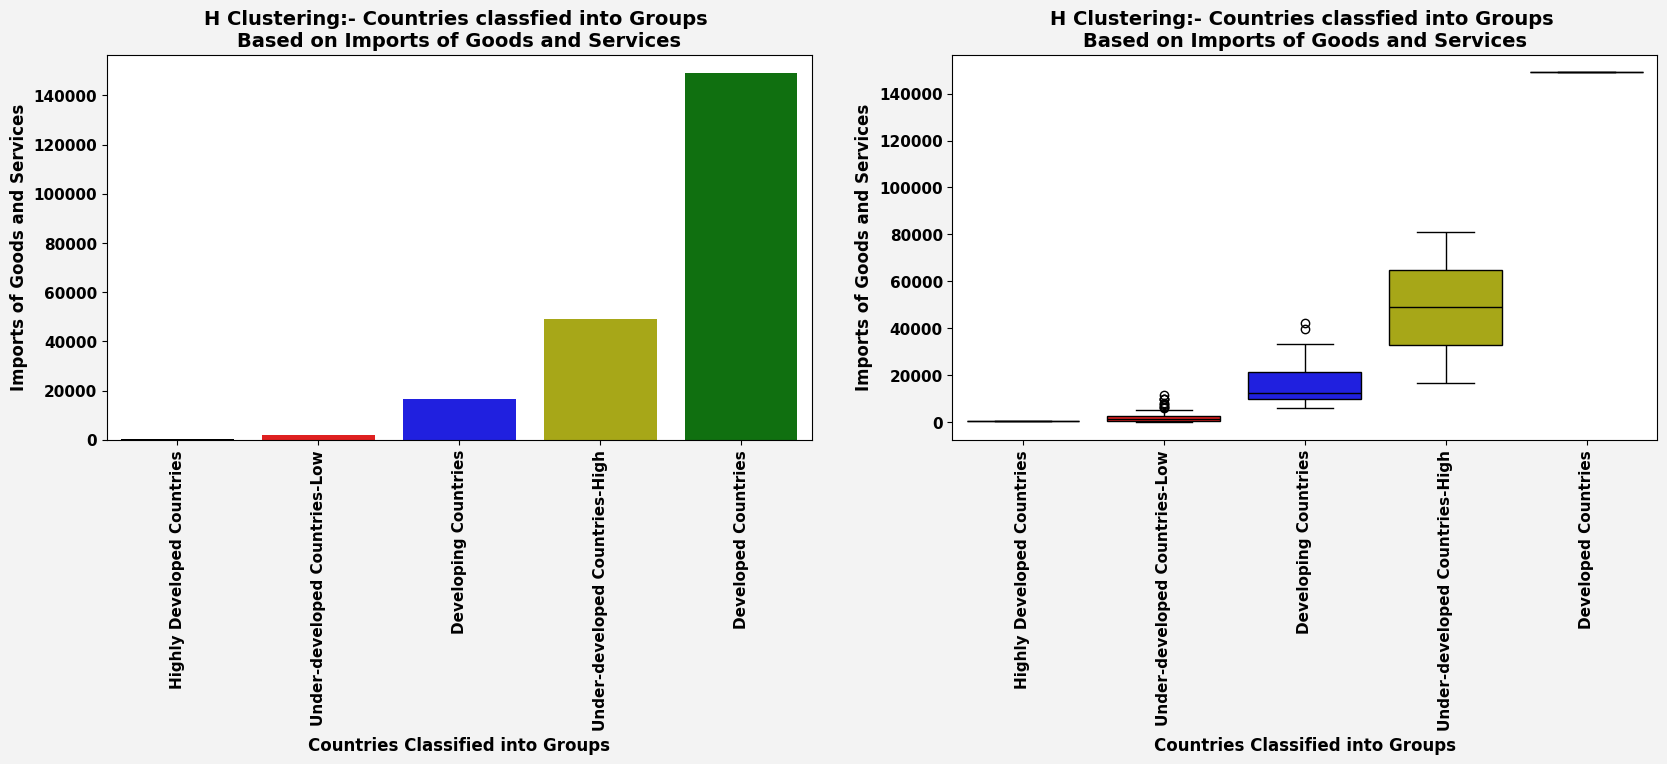

In [268]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(121)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.barplot(data=df12_h.sort_values(by=['Imports']), x='ClusterID_H',y='Imports', 
            hue=df12_h.sort_values(by=['Imports']).ClusterID_H, 
            palette=colr,dodge=False)

plt.legend([],[], frameon=False)
plt.title('H Clustering:- Countries classfied into Groups \nBased on Imports of Goods and Services', fontsize=14, fontweight='bold')
plt.ylabel('Imports of Goods and Services', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')


plt.subplot(122)
colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.boxplot(x='ClusterID_H',y='Imports',data=df11_h, palette=colr,
           order=df12_h.sort_values(by=['Imports']).ClusterID_H)

plt.title('H Clustering:- Countries classfied into Groups \nBased on Imports of Goods and Services', fontsize=14, fontweight='bold')
plt.ylabel('Imports of Goods and Services', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')
plt.show()

**Import (Bar Chart):** Imports were much better with highly developed & developed countries than developing and under-developed countries-low & high.

**Imports (Box-Plot):** Imports of developed countries were approximately four times higher than under-developed countries –Low & high and approximately twice that of developing countries. Highly developed country’s exports are roughly seven times higher than developed countries.

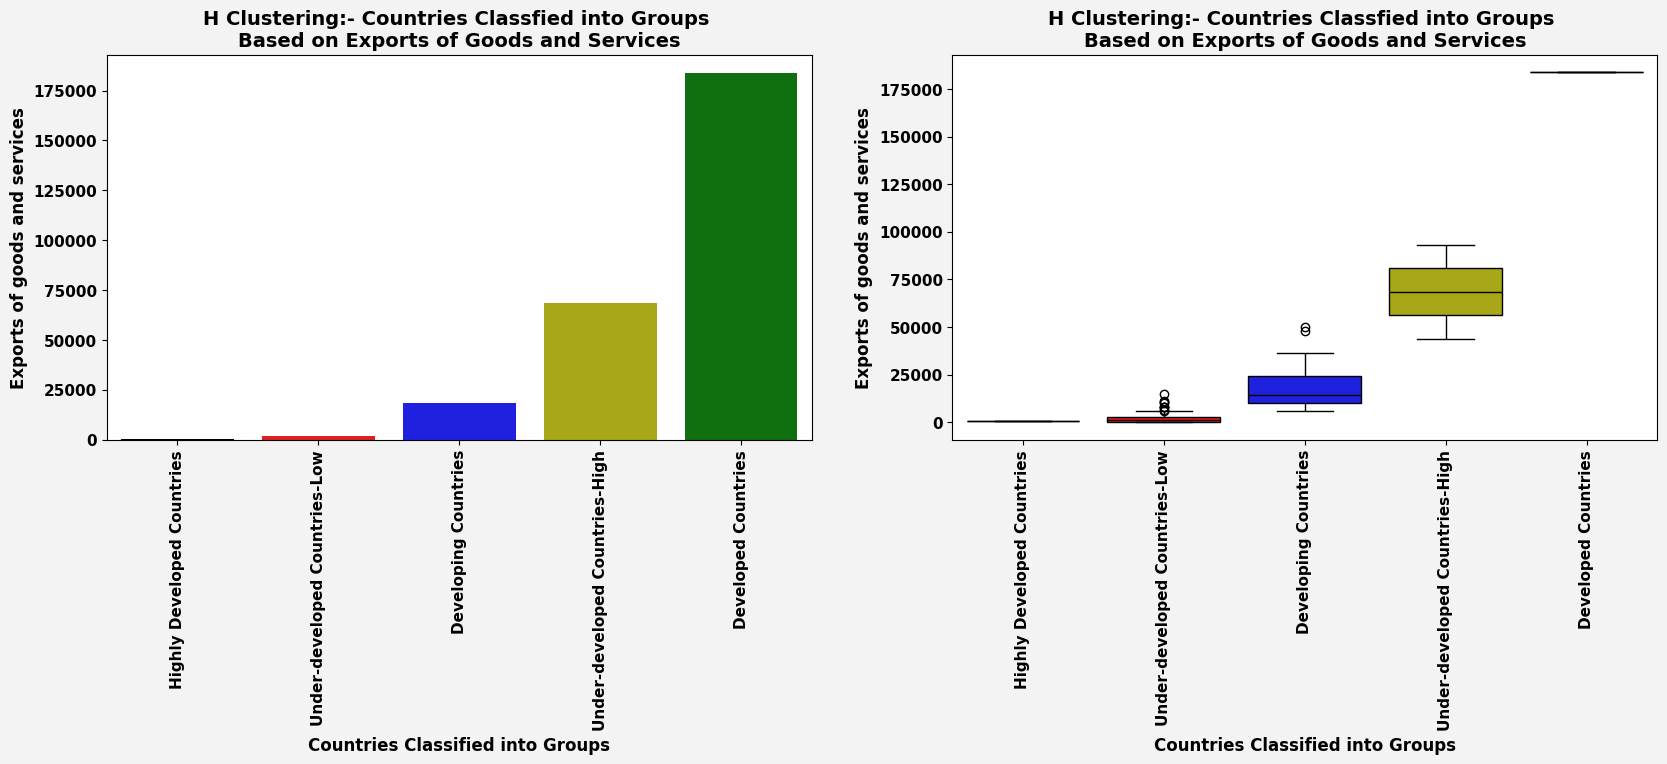

In [269]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(121)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.barplot(data=df12_h.sort_values(by=['Exports']), x='ClusterID_H',y='Exports', 
            hue=df12_h.sort_values(by=['Exports']).ClusterID_H, 
            palette=colr,dodge=False)

plt.legend([],[], frameon=False)
plt.title('H Clustering:- Countries Classfied into Groups \nBased on Exports of Goods and Services', fontsize=14, fontweight='bold')
plt.ylabel('Exports of goods and services', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')


plt.subplot(122)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.boxplot(x='ClusterID_H',y='Exports',data=df11_h, palette=colr,
           order=df12_h.sort_values(by=['Exports']).ClusterID_H)
plt.title('H Clustering:- Countries Classfied into Groups \nBased on Exports of Goods and Services', fontsize=14, fontweight='bold')
plt.ylabel('Exports of goods and services', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')
plt.show()

**Exports (Bar Chart):** Imports and Exports were much better with highly developed & developed countries than creating and under-developed countries-low & high.

**Exports (Box-Plot):** Imports and exports of developed countries were approximately four times higher than under-developed countries –Low & high and approximately twice that of developing countries. Highly developed country’s imports & exports are roughly seven times higher than developed countries.

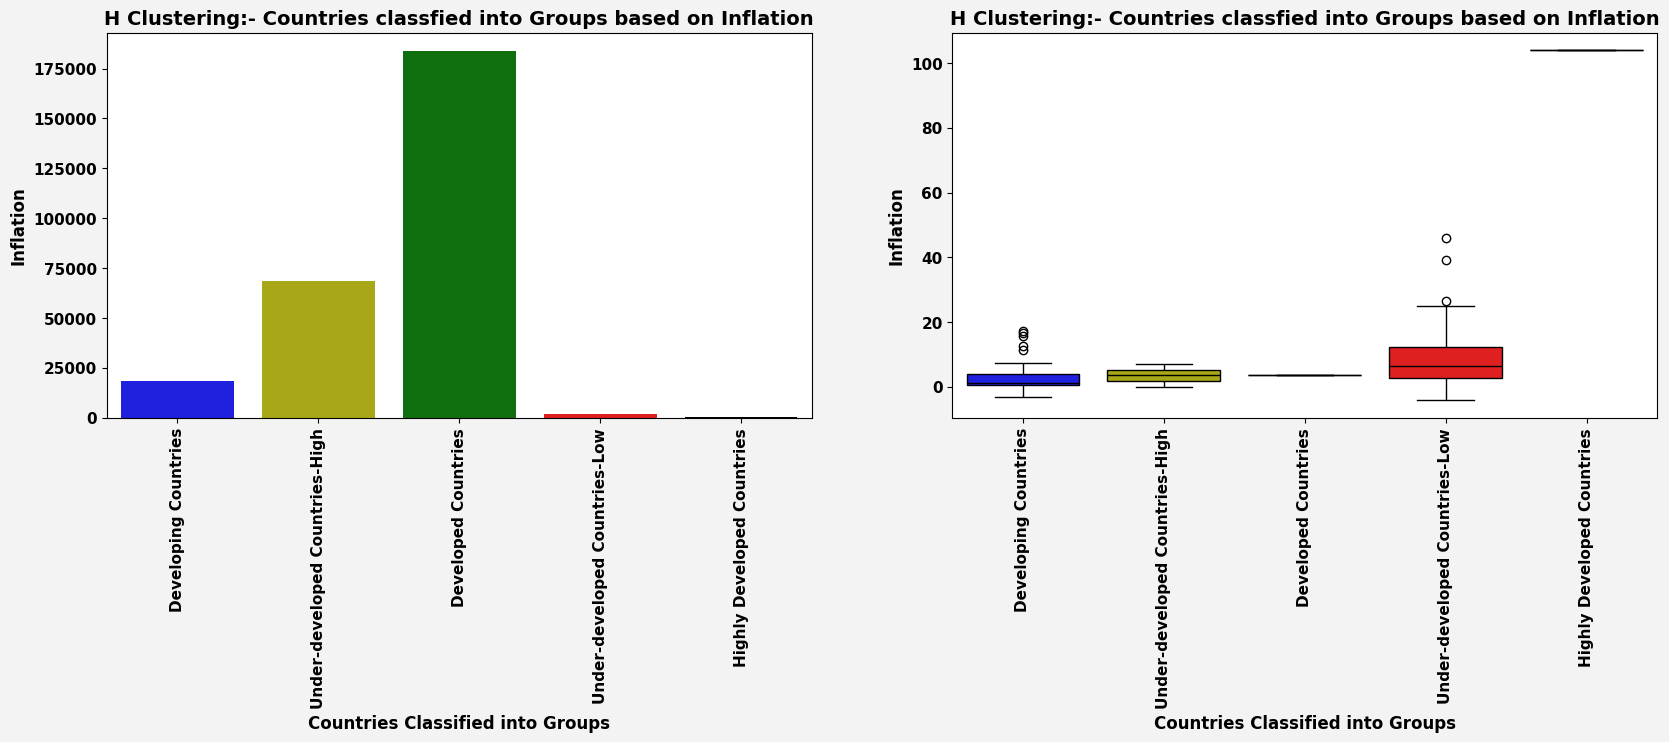

In [270]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(121)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.barplot(data=df12_h.sort_values(by=['Inflation']), x='ClusterID_H',y='Exports', 
            hue=df12_h.sort_values(by=['Inflation']).ClusterID_H, 
            palette=colr,dodge=False)

plt.legend([],[], frameon=False)
plt.title('H Clustering:- Countries classfied into Groups based on Inflation', fontsize=14, fontweight='bold')
plt.ylabel('Inflation', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')


plt.subplot(122)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.boxplot(x='ClusterID_H',y='Inflation',data=df11_h, palette=colr,
           order=df12_h.sort_values(by=['Inflation']).ClusterID_H)

plt.title('H Clustering:- Countries classfied into Groups based on Inflation', fontsize=14, fontweight='bold')
plt.ylabel('Inflation', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')
plt.show()

**Inflation rate (Bar Chart):** inflation rate was highest in under-developed countries - high and lowest in developed countries.

**Inflation rate (Box-Plot):** There is a proportionate decrease in the inflation rate concerning the developmental status of countries. However, inflation of under-developed countries –high is approximately ten times than under-developed countries-low.

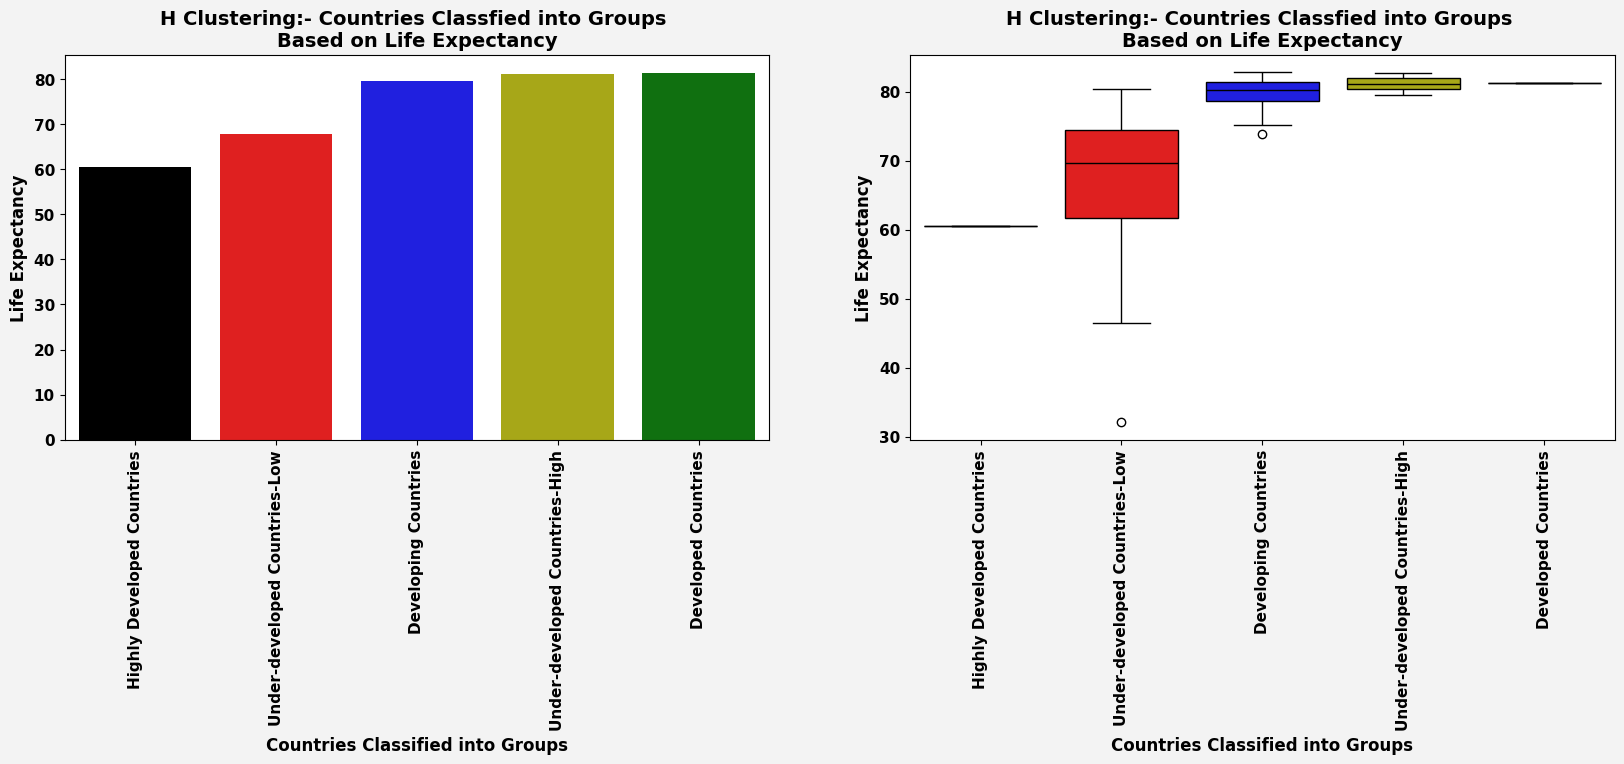

In [271]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(121)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.barplot(data=df12_h.sort_values(by=['Life_Expectancy']), x='ClusterID_H',y='Life_Expectancy', 
            hue=df12_h.sort_values(by=['Life_Expectancy']).ClusterID_H, 
            palette=colr,dodge=False)

plt.legend([],[], frameon=False)
plt.title('H Clustering:- Countries Classfied into Groups \nBased on Life Expectancy', fontsize=14, fontweight='bold')
plt.ylabel('Life Expectancy', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')


plt.subplot(122)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.boxplot(x='ClusterID_H',y='Life_Expectancy',data=df11_h, palette=colr,
           order=df12_h.sort_values(by=['Life_Expectancy']).ClusterID_H)

plt.title('H Clustering:- Countries Classfied into Groups \nBased on Life Expectancy', fontsize=14, fontweight='bold')
plt.ylabel('Life Expectancy', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')
plt.show()

**Life expectancy (Bar Chart):** Life expectancy was improved in highly developed, developed countries than developing and under-developed- low & high countries.

**Life expectancy (Box-Plot):** Due to higher health spending, the life expectancy of developed and highly developed countries was increased by twenty years compared to under-developed countries – Low & High and by ten years compared to developing countries.

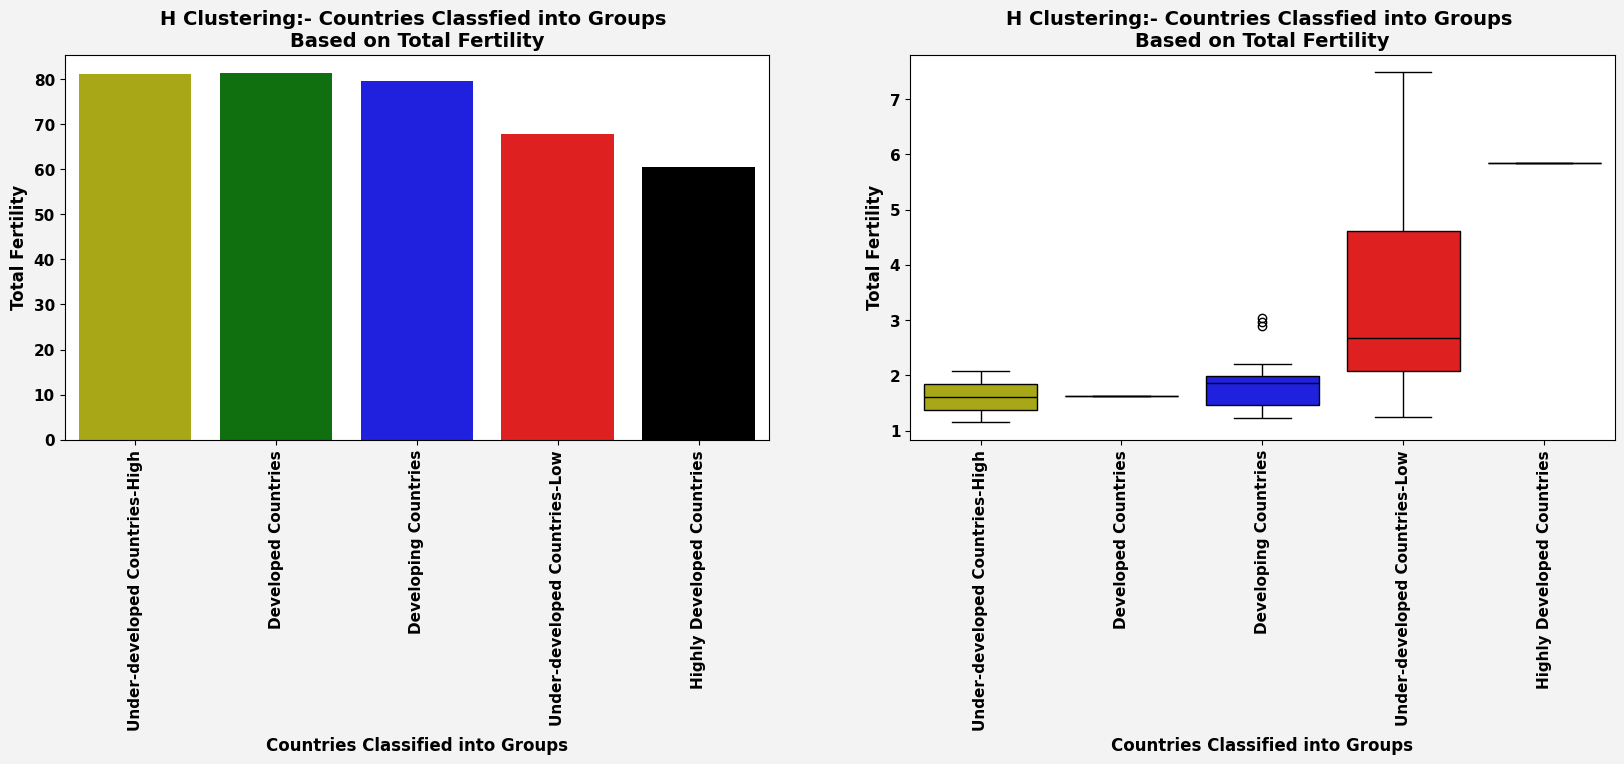

In [272]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(121)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.barplot(data=df12_h.sort_values(by=['Total_Fertility']), x='ClusterID_H',y='Life_Expectancy', 
            hue=df12_h.sort_values(by=['Total_Fertility']).ClusterID_H, 
            palette=colr,dodge=False)

plt.legend([],[], frameon=False)
plt.title('H Clustering:- Countries Classfied into Groups \nBased on Total Fertility', fontsize=14, fontweight='bold')
plt.ylabel('Total Fertility', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12,fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')


plt.subplot(122)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.boxplot(x='ClusterID_H',y='Total_Fertility',data=df11_h, palette=colr,
           order=df12_h.sort_values(by=['Total_Fertility']).ClusterID_H)

plt.title('H Clustering:- Countries Classfied into Groups \nBased on Total Fertility', fontsize=14, fontweight='bold')
plt.ylabel('Total Fertility', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12,fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')
plt.show()

**Total Fertility (Bar Chart):** Total fertility was higher in under-developed counters – low & high compared to developing and highly developed & developed countries.

**Total fertility (Box-plot):** Total fertility was approximately less than two in the case of developed & highly developed countries. It was roughly two in developing countries with high variations from less than two to four number of fertility. Moreover, the total fertility observes at approximately five, with high variations from 3 to less than 7 in the case of under-developed countries-Low. This also impacts GDP per Capita negatively.

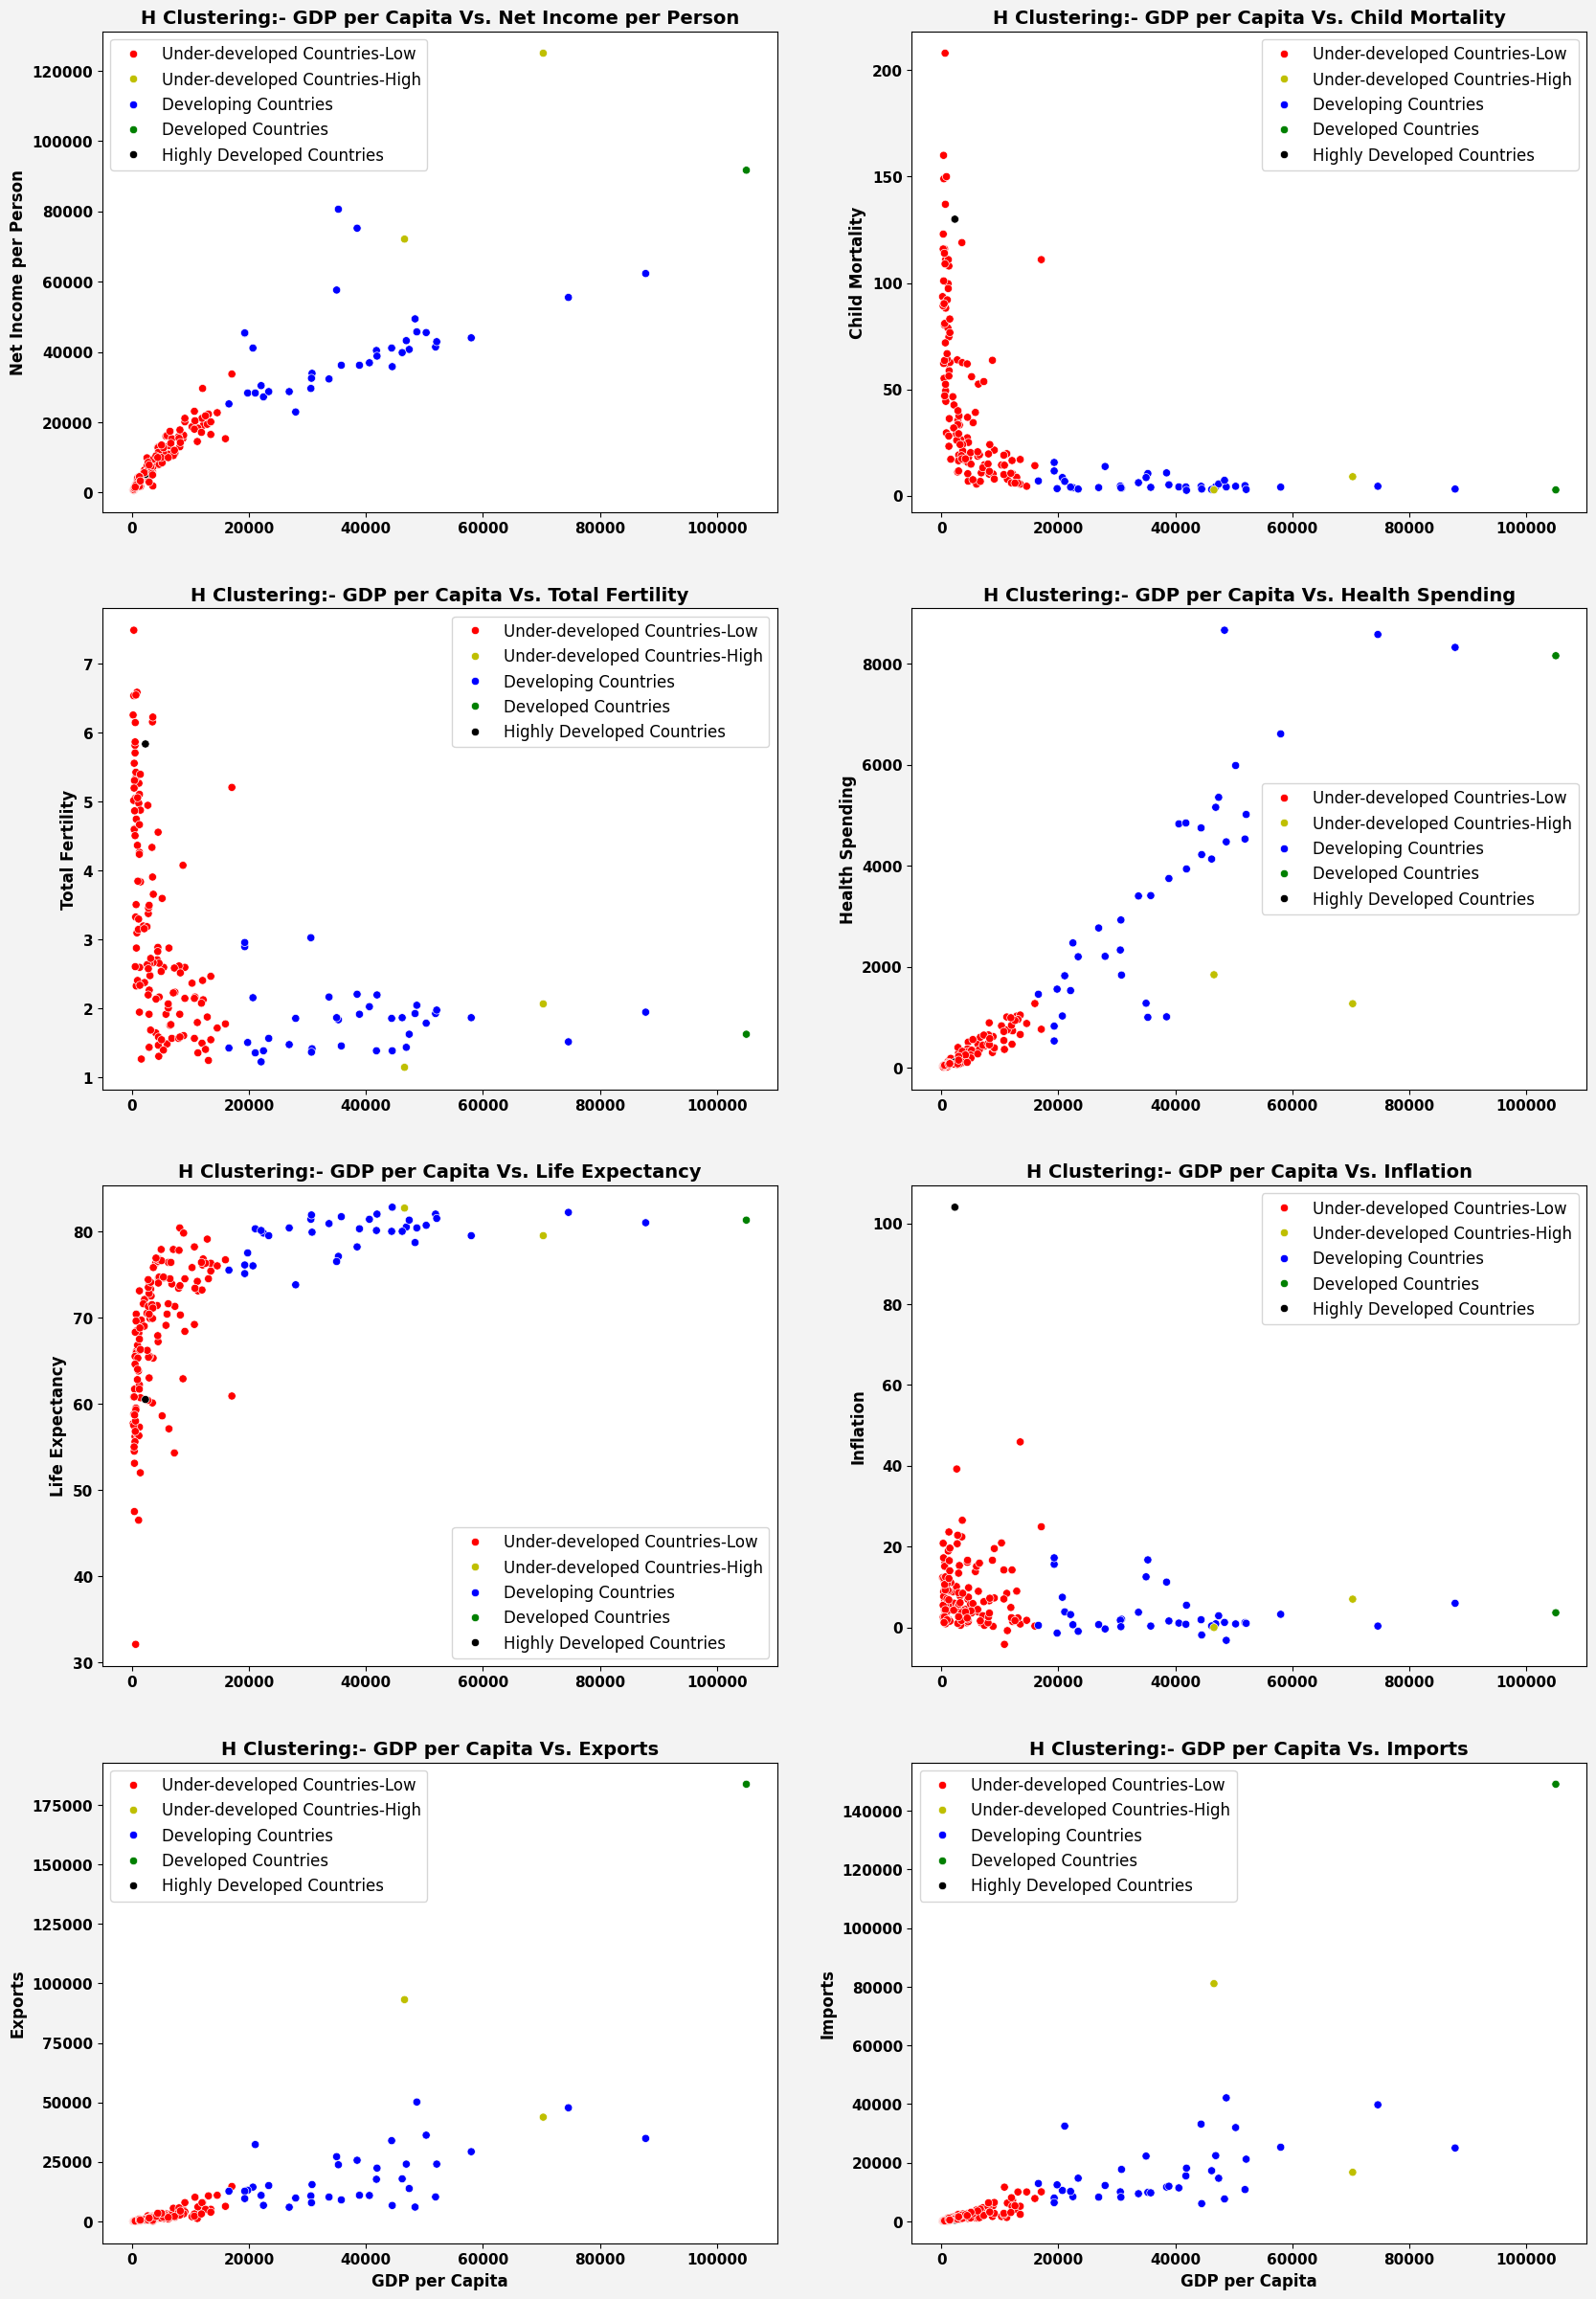

In [273]:
fig = plt.figure(figsize = (20,30))
fig.set_facecolor("#F3F3F3")

plt.subplot(421)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.scatterplot(x='GDP_per_capita',y='Income',hue='ClusterID_H',palette=colr,data=df11_h1,
               hue_order= ['Under-developed Countries-Low', 'Under-developed Countries-High', 
                      'Developing Countries', 'Developed Countries','Highly Developed Countries']).set(xlabel=None)

plt.legend(fontsize=12, loc='upper left') 
plt.title('H Clustering:- GDP per Capita Vs. Net Income per Person',fontsize=14, fontweight='bold')
plt.ylabel('Net Income per Person', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(422)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.scatterplot(x='GDP_per_capita',y='Child_Mortality',hue='ClusterID_H',palette=colr,data=df11_h1,
               hue_order= ['Under-developed Countries-Low', 'Under-developed Countries-High', 
                      'Developing Countries', 'Developed Countries','Highly Developed Countries']).set(xlabel=None)

plt.legend(fontsize=12, loc='best') 
plt.title('H Clustering:- GDP per Capita Vs. Child Mortality',fontsize=14, fontweight='bold')
plt.ylabel('Child Mortality', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')



plt.subplot(423)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.scatterplot(x='GDP_per_capita',y='Total_Fertility',hue='ClusterID_H',palette=colr,data=df11_h1,
               hue_order= ['Under-developed Countries-Low', 'Under-developed Countries-High', 
                      'Developing Countries', 'Developed Countries','Highly Developed Countries']).set(xlabel=None)
plt.legend(fontsize=12, loc='best') 
plt.title('H Clustering:- GDP per Capita Vs. Total Fertility',fontsize=14, fontweight='bold')
plt.ylabel('Total Fertility', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(424)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.scatterplot(x='GDP_per_capita',y='Health_Spending',hue='ClusterID_H',palette=colr,data=df11_h1,
               hue_order= ['Under-developed Countries-Low', 'Under-developed Countries-High', 
                      'Developing Countries', 'Developed Countries','Highly Developed Countries']).set(xlabel=None)
plt.legend(fontsize=12, loc='best') 
plt.title('H Clustering:- GDP per Capita Vs. Health Spending',fontsize=14, fontweight='bold')
plt.ylabel('Health Spending', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')



plt.subplot(425)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.scatterplot(x='GDP_per_capita',y='Life_Expectancy',hue='ClusterID_H',palette=colr,data=df11_h1,
               hue_order= ['Under-developed Countries-Low', 'Under-developed Countries-High', 
                      'Developing Countries', 'Developed Countries','Highly Developed Countries']).set(xlabel=None)
plt.legend(fontsize=12, loc='best') 
plt.title('H Clustering:- GDP per Capita Vs. Life Expectancy',fontsize=14, fontweight='bold')
plt.ylabel('Life Expectancy', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(426)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.scatterplot(x='GDP_per_capita',y='Inflation',hue='ClusterID_H',palette=colr,data=df11_h1,
               hue_order= ['Under-developed Countries-Low', 'Under-developed Countries-High', 
                      'Developing Countries', 'Developed Countries','Highly Developed Countries']).set(xlabel=None)
plt.legend(fontsize=12, loc='best') 
plt.title('H Clustering:- GDP per Capita Vs. Inflation',fontsize=14, fontweight='bold')
plt.ylabel('Inflation', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(427)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.scatterplot(x='GDP_per_capita',y='Exports',hue='ClusterID_H',palette=colr,data=df11_h1,
               hue_order= ['Under-developed Countries-Low', 'Under-developed Countries-High', 
                      'Developing Countries', 'Developed Countries','Highly Developed Countries']).set(xlabel=None)
plt.legend(fontsize=12, loc='best') 
plt.title('H Clustering:- GDP per Capita Vs. Exports',fontsize=14, fontweight='bold')
plt.ylabel('Exports', fontsize=12, fontweight='bold')
plt.xlabel('GDP per Capita', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(428)

colr = {'Under-developed Countries-Low': 'r', 'Under-developed Countries-High': 'y', 'Developing Countries':'b',
                    'Developed Countries':'g','Highly Developed Countries':'k'}

sns.scatterplot(x='GDP_per_capita',y='Imports',hue='ClusterID_H',palette=colr,data=df11_h1,
               hue_order= ['Under-developed Countries-Low', 'Under-developed Countries-High', 
                      'Developing Countries', 'Developed Countries','Highly Developed Countries']).set(xlabel=None)
plt.legend(fontsize=12, loc='best') 
plt.title('H Clustering:- GDP per Capita Vs. Imports',fontsize=14, fontweight='bold')
plt.ylabel('Imports', fontsize=12, fontweight='bold')
plt.xlabel('GDP per Capita', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.show()

Similar observations to K mean clustering data set EDA:

**GDP per Capita Vs. Net Income per Person:** The person's net income is high when GDP per Capita is high, observed in clusters than linear form.

**GDP per Capita Vs. Child mortality:** Child mortality was high when GDP was approximately less than 8000. It was further significantly increased when GDP per Capita was around less than 1000.

**GDP per Capita Vs. Total fertility:** Total fertility is higher when GDP is approximately less than 1000.

**GDP per Capita Vs. Health Spending:** The health spading is high when GDP per Capita was high.

**GPD per Capita Vs. Life expectancy:** Life expectancy was approximately less than 70 when GDP per Capita was about less than 600. However, other factors could also play a role in improving the life expectancy other than GDP per Capita.

**GDP per Capita Vs. Inflation:** Higher inflation observed when GDP per Capita was approximately 20000 or less. Again, there might be other factors that could also improve life expectancy other than GDP per Capita.

**GDP per Capita Vs. Imports and GDP per Capita Vs. exports:** There was not much difference in exports and imports value observed when GDP per Capita was approximately less than 40000.

In [274]:
print(datastyle.start+'1. H Clustering:- Mean GDP per capita of under-developed countries -Low        : '+ datastyle.end, datastyle.end,df12_h.GDP_per_capita.iloc[[0]]);Line_Separator1()
print(datastyle.start+'2. H Clustering:- Mean Child Mortality of under-developed countries -Low       : '+ datastyle.end,df12_h.Child_Mortality.iloc[[0]]);Line_Separator1()
print(datastyle.start+'3. H Clustering:- Mean Net income per person of under-developed countries -Low : '+ datastyle.end,df12_h.Income.iloc[[0]]);Line_Separator1()

1. H Clustering:- Mean GDP per capita of under-developed countries -Low        :   0    4458.929134
Name: GDP_per_capita, dtype: float64
**************************************************************************************************** 

2. H Clustering:- Mean Child Mortality of under-developed countries -Low       :  0    47.558268
Name: Child_Mortality, dtype: float64
**************************************************************************************************** 

3. H Clustering:- Mean Net income per person of under-developed countries -Low :  0    8663.094488
Name: Income, dtype: float64
**************************************************************************************************** 



Further deep dive the countries through the filter which are in real need based on the value of Child Mortality, Child Mortality, and GDP per Capita identified above.

In [275]:
df13_h=country_data[country_data['GDP_per_capita']<=df12_h['GDP_per_capita'][0]]
df13_h=df13_h[df13_h['Child_Mortality']>= df12_h['Child_Mortality'][0]]
df13_h=df13_h[df13_h['Income']<= df12_h['Income'][0]]
df13_h.head(2)

Country  Child_Mortality  Exports  Health_Spending   Imports  Income  \
0  Afghanistan             90.2    55.30          41.9174   248.297    1610   
3       Angola            119.0  2199.19         100.6050  1514.370    5900   

   Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita  
0       9.44             56.2             5.82             553  
3      22.40             60.1             6.16            3530

In [276]:
df14_h=pd.merge(df13_h,df_kmean,left_index=True,right_index=True)
df15_h=df14_h.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
print(datastyle.start+'Shape of H Clustering df15_h dataset: '+ datastyle.end,df15_h.shape)

Shape of H Clustering df15_h dataset:  (45, 12)


In [277]:
df15_h.head(2)

Country  Child_Mortality  Exports  Health_Spending   Imports  Income  \
0  Afghanistan             90.2    55.30          41.9174   248.297    1610   
3       Angola            119.0  2199.19         100.6050  1514.370    5900   

   Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita  ClusterID  \
0       9.44             56.2             5.82             553          1   
3      22.40             60.1             6.16            3530          1   

   ClusterID_H  
0            0  
3            0

In [278]:
# H Clustering: Top five lowest Nations in GDP per Capita

print(datastyle.start+"H Clustering- Top five lowest Nations in GDP per Capita:\n"+ datastyle.end,df15_h.nsmallest(5,'GDP_per_capita').Country.values);Line_Separator1()
df15_H_top5_Low_GDPP=df15_h.nsmallest(5,'GDP_per_capita')
df15_H_top5_Low_GDPP

H Clustering- Top five lowest Nations in GDP per Capita:
 ['Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']
**************************************************************************************************** 



Country  Child_Mortality   Exports  Health_Spending  Imports  \
26            Burundi             93.6   20.6052          26.7960   90.552   
88            Liberia             89.3   62.4570          38.5860  302.802   
37   Congo, Dem. Rep.            116.0  137.2740          26.4194  165.664   
112             Niger            123.0   77.2560          17.9568  170.868   
132      Sierra Leone            160.0   67.0320          52.2690  137.655   

     Income  Inflation  Life_Expectancy  Total_Fertility  GDP_per_capita  \
26      764      12.30             57.7             6.26             231   
88      700       5.47             60.8             5.02             327   
37      609      20.80             57.5             6.54             334   
112     814       2.55             58.8             7.49             348   
132    1220      17.20             55.0             5.20             399   

     ClusterID  ClusterID_H  
26           1            0  
88           1            0  
37           1            0  
112          1            0  
132          1            0

In [279]:
# H Clustering: Top five lowest Nations in Income
print(datastyle.start+"H Clustering- Top five lowest Nations in Net Income per Person:\n"+ datastyle.end,df15_h.nsmallest(5,'Income').Country.values);Line_Separator1()
df15_H_top5_income=df15_h.nsmallest(5,'Income')
df15_H_top5_income

H Clustering- Top five lowest Nations in Net Income per Person:
 ['Congo, Dem. Rep.' 'Liberia' 'Burundi' 'Niger' 'Central African Republic']
**************************************************************************************************** 



Country  Child_Mortality   Exports  Health_Spending  \
37           Congo, Dem. Rep.            116.0  137.2740          26.4194   
88                    Liberia             89.3   62.4570          38.5860   
26                    Burundi             93.6   20.6052          26.7960   
112                     Niger            123.0   77.2560          17.9568   
31   Central African Republic            149.0   52.6280          17.7508   

     Imports  Income  Inflation  Life_Expectancy  Total_Fertility  \
37   165.664     609      20.80             57.5             6.54   
88   302.802     700       5.47             60.8             5.02   
26    90.552     764      12.30             57.7             6.26   
112  170.868     814       2.55             58.8             7.49   
31   118.190     888       2.01             47.5             5.21   

     GDP_per_capita  ClusterID  ClusterID_H  
37              334          1            0  
88              327          1            0  
26              231          1            0  
112             348          1            0  
31              446          1            0

In [280]:
# H Clustering: Top five lowest Nations in Child Mortality

print(datastyle.start+"H Clustering- Top five lowest Nations in Child Mortality:\n"+ datastyle.end,df15_h.nlargest(5,'Child_Mortality').Country.values);Line_Separator1()
df15_H_top5_Child_Mortality=df15_h.nlargest(5,'Child_Mortality')
df15_H_top5_Child_Mortality


H Clustering- Top five lowest Nations in Child Mortality:
 ['Haiti' 'Sierra Leone' 'Chad' 'Central African Republic' 'Mali']
**************************************************************************************************** 



Country  Child_Mortality  Exports  Health_Spending  \
66                      Haiti            208.0  101.286          45.7442   
132              Sierra Leone            160.0   67.032          52.2690   
32                       Chad            150.0  330.096          40.6341   
31   Central African Republic            149.0   52.628          17.7508   
97                       Mali            137.0  161.424          35.2584   

     Imports  Income  Inflation  Life_Expectancy  Total_Fertility  \
66   428.314    1500       5.45             32.1             3.33   
132  137.655    1220      17.20             55.0             5.20   
32   390.195    1930       6.39             56.5             6.59   
31   118.190     888       2.01             47.5             5.21   
97   248.508    1870       4.37             59.5             6.55   

     GDP_per_capita  ClusterID  ClusterID_H  
66              662          1            0  
132             399          1            0  
32              897          1            0  
31              446          1            0  
97              708          1            0

**Comparison of K-Means and H-clustering**

Comparision of K-Means & Hierarchical Clustering and List of Countries whose GDP per Capita is The Lowest
**************************************************************************************************** 



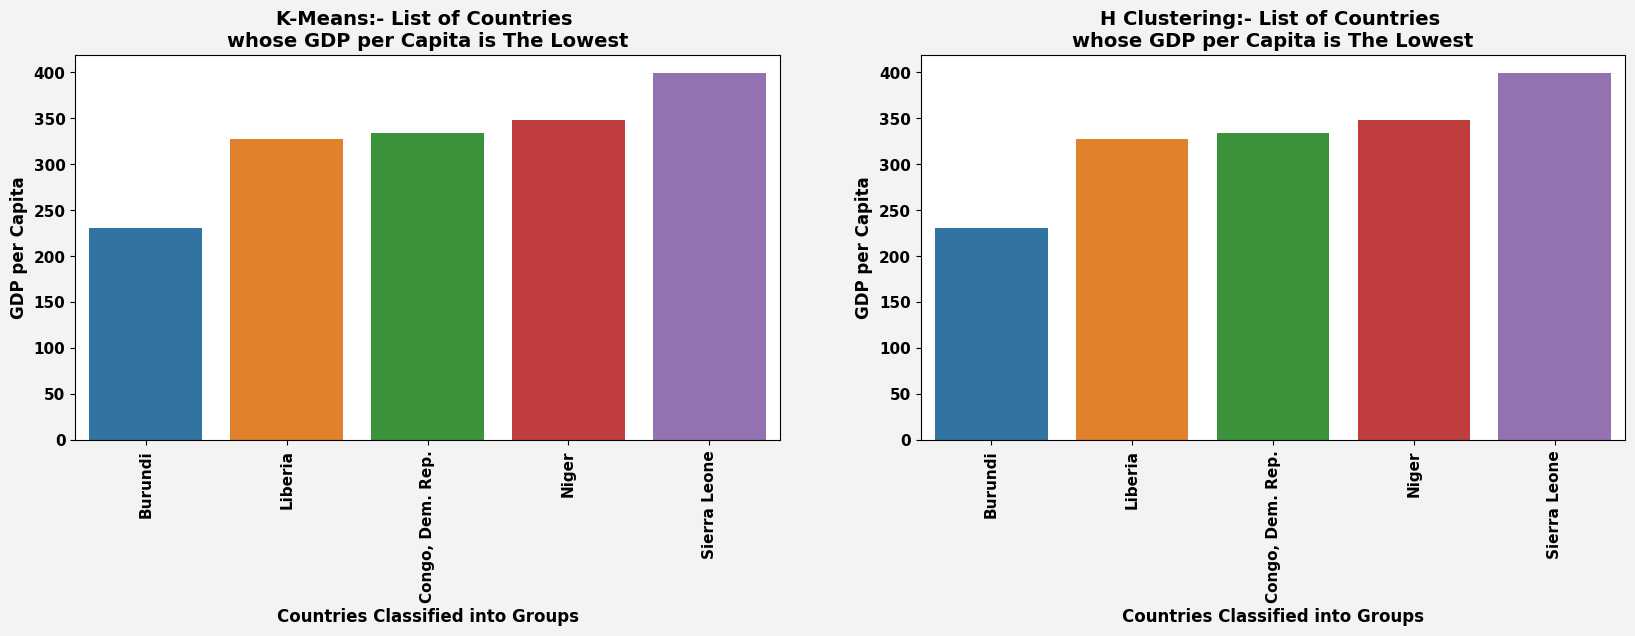

In [281]:
# List of countries needs aid - PCA followed by K means Clustering and H Clustering (separately)
# GDP per Capita

print(datastyle.start+ 'Comparision of K-Means & Hierarchical Clustering and List of Countries whose GDP per Capita is The Lowest'+ datastyle.end);Line_Separator1()

fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(121)

sns.barplot(data=df9_k_top5_Low_GDPP_kmean.sort_values(by=['GDP_per_capita']), x='Country',y='GDP_per_capita', 
            hue='Country',dodge=False)

plt.legend([],[], frameon=False)
plt.title('K-Means:- List of Countries \nwhose GDP per Capita is The Lowest', fontsize=14, fontweight='bold')
plt.ylabel('GDP per Capita', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12,fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')

plt.subplot(122)

sns.barplot(data=df15_H_top5_Low_GDPP.sort_values(by=['GDP_per_capita']), x='Country',y='GDP_per_capita', 
            hue='Country',dodge=False)

plt.legend([],[], frameon=False)
plt.title('H Clustering:- List of Countries \nwhose GDP per Capita is The Lowest', fontsize=14, fontweight='bold')
plt.ylabel('GDP per Capita', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12,fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')


plt.show()

Through K-mean and Hierarchical clustering studies, the same listed countries identified whose GDP per Capita is lower. These are in increasing order of Burundi, Congo, Dem. Republic, Niger, Sierra Leone, and Mozambique.

Comparision of K-Means & Hierarchical Clustering and List of Countries whose Net Income per Person is The Lowest
**************************************************************************************************** 



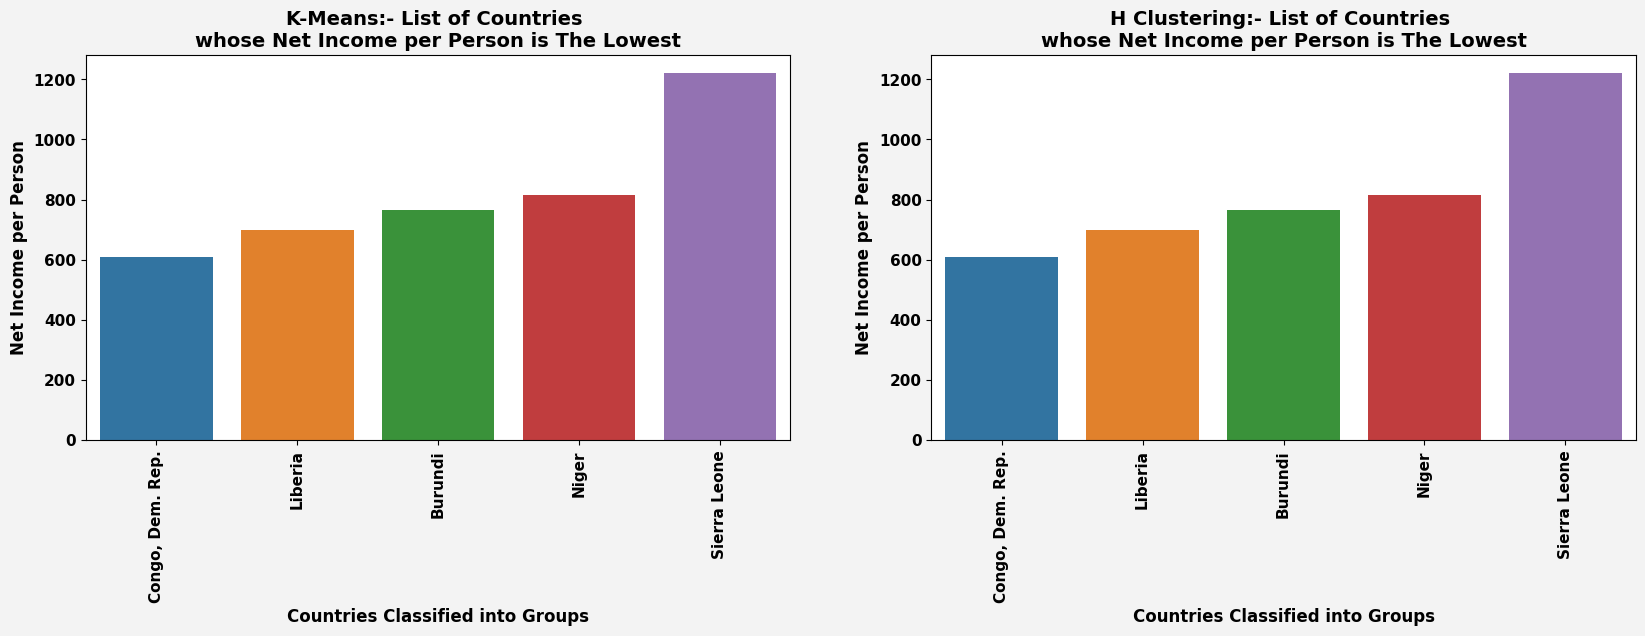

In [282]:
# List of countries needs aid - PCA followed by K mean Clustering and H Clustering (separately)
# Net income per Person


print(datastyle.start+ 'Comparision of K-Means & Hierarchical Clustering and List of Countries whose Net Income per Person is The Lowest'+ datastyle.end);Line_Separator1()

fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(121)

sns.barplot(data=df9_k_top5_Low_GDPP_kmean.sort_values(by=['Income']), x='Country',y='Income', 
            hue='Country',dodge=False)

plt.legend([],[], frameon=False)
plt.title('K-Means:- List of Countries \nwhose Net Income per Person is The Lowest', fontsize=14, fontweight='bold')
plt.ylabel('Net Income per Person', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12,fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')

plt.subplot(122)

sns.barplot(data=df15_H_top5_Low_GDPP.sort_values(by=['Income']), x='Country',y='Income', 
            hue='Country',dodge=False)

plt.legend([],[], frameon=False)
plt.title('H Clustering:- List of Countries \nwhose Net Income per Person is The Lowest', fontsize=14, fontweight='bold')
plt.ylabel('Net Income per Person', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12,fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')


plt.show()

The same listed countries identify whose net income per person is lower through K-Means and Hierarchical clustering studies. These are in increasing order of Burundi, Congo, Dem. Republic, Niger, Sierra Leone, and Mozambique.

Comparision of K-Means & Hierarchical Clustering and List of Countries whose Child Mortality is The Highest
**************************************************************************************************** 



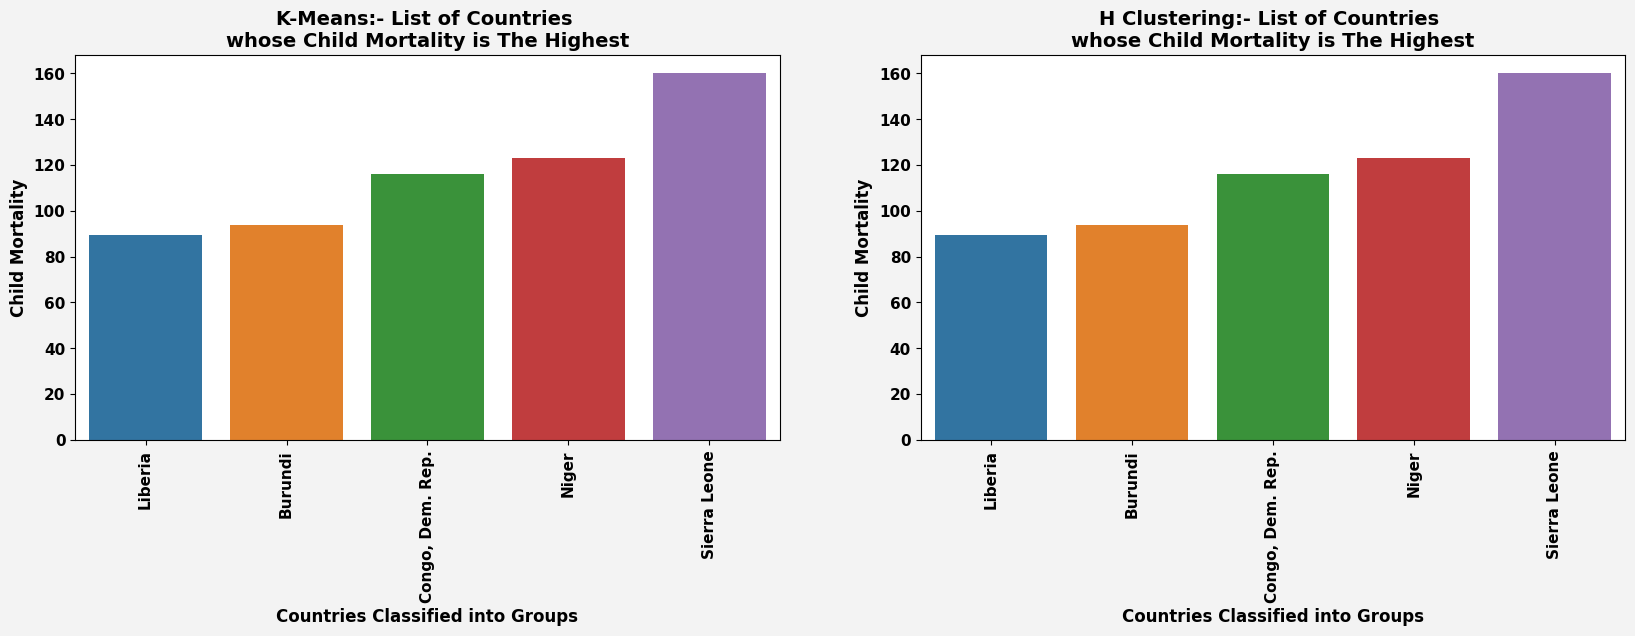

In [283]:
# List of countries needs aid - PCA followed by K mean Clustering and H Clustering (separately)
# Child mortality


print(datastyle.start+ 'Comparision of K-Means & Hierarchical Clustering and List of Countries whose Child Mortality is The Highest'+ datastyle.end);Line_Separator1()

fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(121)

sns.barplot(data=df9_k_top5_Low_GDPP_kmean.sort_values(by=['Child_Mortality']), x='Country',y='Child_Mortality', 
            hue='Country',dodge=False)

plt.legend([],[], frameon=False)
plt.title('K-Means:- List of Countries \nwhose Child Mortality is The Highest', fontsize=14, fontweight='bold')
plt.ylabel('Child Mortality', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12,fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')

plt.subplot(122)

sns.barplot(data=df15_H_top5_Low_GDPP.sort_values(by=['Child_Mortality']), x='Country',y='Child_Mortality', 
            hue='Country',dodge=False)

plt.legend([],[], frameon=False)
plt.title('H Clustering:- List of Countries \nwhose Child Mortality is The Highest', fontsize=14, fontweight='bold')
plt.ylabel('Child Mortality', fontsize=12, fontweight='bold')
plt.xlabel('Countries Classified into Groups', fontsize=12,fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90, fontsize=11, fontweight='bold')


plt.show()

Through K-mean and Hierarchical clustering studies, the same listed countries identify whose child mortality is higher. These decrease the order of Haiti, Sierra Leone, Chad, Central Africa Republic, and Mali.

**Conclusion**

1. After performing PCA followed by K-Means and hierarchical clustering (separately),  three and five groups identified respectively, in clustering analysis; we can determine the country's overall development using socio-economic and health factors.

2. Countries are categorized into developed, developing, and under-developed countries using K-mean. While in hierarchical clustering, five categories were identified, namely 'Under-developed Countries-Low,' 'Under-developed Countries-High,'  'Developing Countries,' 'Developed Countries', and  'Highly Developed Countries'

3. In underdeveloped countries, we observed that the GDP per capita and income were lower, whereas the death of children under five years of age per thousand live brings that child mortality is very high. On another way around, in developed countries, we observed the GDP per capita and income was higher, whereas the mortality was very low as anticipated.

4. In the case of developing countries, we observed that the GDP per capita and income were improved compared to under-developed countries but still lower than developed countries. In contrast, child mortality was enhanced compared to under-developed countries but still lower than developed countries.


**Recommendation**
Using the socio-economic and health situation factor of the under-developed countries:

1. GDP per capita and net income per person is lowest in five countries like Burundi, Congo, Dem. Republic, Niger, Sierra Leone, and Mozambique in increasing order.

2. Death rate of children under five years per thousand (child mortality) is top five countries like Haiti, Sierra Leone, Chad, Central Africa Republic, and Mali, decreasing order.

3. Top nine countries are in direst need of aid, and these are :

    a) Burundi
    
    b) Congo, Dem. Republic
    
    c) Niger 
    
    d) Sierra Leone
    
    e) Hati
    
    f) Chad
    
    g) The Central Africa Republic 
    
    h) Mozambique 
    
    i) Mali

**Question 1:** Assignment Summary Briefly describes the "Clustering of Countries" assignment that you just completed within 200- 300 words. Mention the problem statement and the solution methodology you followed to arrive at the final list of countries. Explain your main choices briefly( why you took that many principal components, which type of Clustering produced a better result, and so on). Note: You don't have to include any images, equations, or graphs for this question, and just text should be enough. 

The problem was to ident 

**Problem statement:** After the current funding programs, International Humanitarian NGOs have raised around 10 million USD. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues raised while making this decision have mostly related to the countries in the direst need of aid. Our job is as Data analyst is to classify the countries using the socio-economic and health factors that determine the overall development of nations. After this analysis, we need to suggest countries that the CEO needs to focus on and give the highest priority.

**Methodology Applied:** We used principal component analysis followed by K-Means and Hierarchical Clustering (Separately). EDA analysis of each variable listed in the data set performed post-k-Means and Hierarchical Clustering. The steps followed along with key highlights are: 

**Step -1:** Data review and understanding o We observed that the variable such as exports, health, and imports value was in percentage form compared to other variables (in the form of absolute numbers). Thus, we converted them to a whole number using the GDP per capita factor. 

**Step 2:** Outlier and Multicollinearity o We have done the outlier analysis of the data set obtained from pre and post PCA analysis. o Multicollinearity in variables was studied pre and post PCA analysis and used heatmap for further visualization. 

**Step 3**: Principal component analysis o We standardize data to get uniformity in value. 

We have selected five principal components using the scree plot since it covers >98% value of the overall dataset. 

We followed the visualization study of PC1 and PC2 elements, and our observations are the GDP per capita, Income, Health Spending, Life Expectancy are high in PC1. 

Similarly, principal component number two found where child mortality and Total fertility are higher.

Scatter plot analysis of PC2 Vs. PC1 performed, and we could attend two distinct groups before and after zero value. 

Step 4a: K Means clustering o Checked the Hopkins measure: 

Hopkins Measure:  0.9290661814715753, which is higher than 0.5, indicates an increased tendency to form the clusters o We used the Shihouetter score curve and Elbow plot; both indicated n-cluster=3 that we could select. 

After clustering countries into three clusters, we followed the scatter plot analysis and saw three distinct sets formed. Three groups were classified as developed, developing, and under-developed countries. 

We followed the EDA analysis and segregated countries based on the under-developed countries' socio-economic and health situation factors. We identified a total of nine countries that are in direst need of aid: Burundi, Congo, Dem. Republic, Niger, Sierra Leone, Mozambique, Haiti, Chad, Central Africa Republic, and Mali. 

Step 4b: Hierarchical clustering o Dendrogram of Single and complete Linkage Margins was made to understand the number of clusters formed.

We also performed the Elbow method to find number clustering apart from Dendrogram. We observed a total of five Clustering through hierarchical Clustering, and it was three in the case of K-Means Clustering. 

We again followed scatter plot analysis PC1 Vs. PC2. We could observe five cluster formations. Moreover, only one country was listed in two sets out of five clusters. That could be merged to the respective closer cluster if it is required to simplify further. 

Like K-Means clustering, we also followed the EDA analysis and segregated countries based on under-developed countries socio-economic and health situation factors. We also identified the exact total of nine countries that are in direst need of aid: Burundi, Congo, Dem. Republic, Niger, Sierra Leone, Mozambique, Haiti, Chad, Central Africa Republic, and Mali. 

**Question 2:** Clustering Compare and contrast K-means Clustering and Hierarchical Clustering. 

Hierarchical Clustering prefers the small collection of data, while k-Means cluster for an extensive set of data. 

To solve segmentation problems such that we get meaningful segments, we will use both hierarchical and k-means algorithms to complement each other. 

Hierarchical Clustering generally produces better clusters but is more computationally intensive. 

One of the primary considerations in using the K-means algorithm is deciding the value of K beforehand, and the hierarchical clustering algorithm does not have this restriction. 

In the case of hierarchical Clustering, we don't have to assign the number of clusters from the beginning, while for K-Means, it requires to set the number of clusters o In the K-Means algorithm, you divided the data in the first step itself. You refined our clusters to get the most optimal grouping in the subsequent steps. In hierarchical Clustering, the data is not partitioned into the cluster in a single step. Instead, a series of partitions/merges occur, which may run from a single cluster containing all objects to n clusters that each have a single thing or vice-versa. o K mean will often produce unintuitive results if 1) data is not well separated into a sphere-like cluster; 2) selected k value is not well-matched to the shape of the data. In other words, the selected value is too high or too low; 3) K mean algorithms start with random centroids and take a typical clustering result as the final one.

In contrast, hierarchical Clustering has lesser assumptions about the data distribution. The only need is to be calculated each pair of data points. Hierarchical Clustering ideally joins nearby points into the cluster, then successively adds a nearby point to the nearest group, resulting in a Dendrogram. The cluster could be defined based on cutting Dendrogram at different heights. Hierarchical Clustering can be more computationally expensive but usually produces more intuitive results.

**Briefly explain the steps of the K-means clustering algorithm**. 

A clustering through k-means is one of the simplest and most widely used algorithms. K-mean clustering algorithm starts with the first group of randomly selected centroids that are selected as the beginning points of every cluster. It then performs iterative calculations to optimize the positions of the centroids. 

In other words, it aims to find the set of k clusters such that every data point is assigned to the closest center, and the sum of the distances of all such assignments Is minimized. 

Steps of K -means clustering algorithms are: 

**Step 1:** Start by choosing initial centroids. In other words, initialize cluster number of center- randomly picked up the points based on data spread in scatter plot.

**Step 2:** Assignment - Assign observations to the closest cluster center – Once we have several cluster centers, we can assign each point based on the minimum distance to the cluster center. 

**Step 3:** Optimization - Revise cluster centers as the mean of assigned observations- Once we set all the points based on which cluster center they are closest to. We need to update cluster centers based on the points assigned to them. 

**Step 4:** Repeat step 2 and step 3 until convergence. We keep on iterating between assigning points to cluster centers and updating the cluster centers until convergence or no further update centroids number/value. At this stage, the algorithm reached an optimal point in a grouping. 

**How is the value of ‘k’ chosen in K-means clustering? Explain both the statistical as well as the business aspect of it.** 

The Elbow method is used to determine the optimal value of K to perform the K-Means Clustering Algorithm. This method plots the various values of cost with changing k. As the value of k increases, fewer elements will be in the cluster. Thus, average distortion will decrease. The lesser number of factors means closer to the centroid. So, the point where this distortion declines the most is the elbow point.

Before defining the K value in the business aspect, it is good to use hierarchical segmentation first. Considering the business parameters, we can create the segment and profile them for, e.g., three segmentation solutions, four segmentation solutions so on in hierarchical clustering. From this, identify which component is making sense from a business standpoint. Based on that, we could determine the k value. 

**Explain the necessity for scaling/standardization before performing Clustering.** 

This is a very critical step to perform since the variables in datasets are measured in different scales (e.g., kilograms, kilometers, centimeters, etc.); otherwise, outputs obtained will be severely affected 

Standardizing data before cluster analysis is also highly critical. Clustering is an unsupervised learning technique that classifies observations into similar groups or clusters. A commonly used measure of similarity is Euclidean distance. The Euclidean distance is calculated by taking the square root of the sum of the squared differences between observations. This distance can be significantly affected by differences in scale among the variables. In general, variables with significant variances have a larger effect on this measure than variables with slight variances. For this reason, standardizing multi-scaled variables is advised before performing Clustering. 

Hence, we need to center and scale the data. In this way, the average value of each record would be 0, and the variance for each record would be 1 (mean =0 and Variance (standard deviation) =1) 

**Explain the different linkages used in Hierarchical Clustering**. 

Types of linkages used in Hierarchical clustering are: 

**Single Linkage:** Distance between 2 clusters is defined as the shortest distance between points in the two clusters. In other words, we merge the two clusters whose two closest members have the smallest space in each step.

**Complete Linkage:** Distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters. In other words, we merge the two clusters whose merger has the smallest diameter in each step.

**Average Linkage:** Distance between 2 clusters is defined as the average distance between every point of one cluster to every other point of the other cluster. In other words, we merge the pair of clusters with the highest cohesion in each iteration. 

Usually, a single linkage-type will produce dendrograms that are not appropriately structured, whereas complete or average linkage will produce clusters with a proper tree-like structure. 


**Give at least three applications of using PCA** 

Principle component analysis is predominantly used as a dimensionality reduction technique in areas like computer vision, image compression, facial recognition, and disease control. It is also used to find the pattern in the data of high dimension in medicine, psychology, bioinformatics, data mining, finance, etc.

**Briefly discuss PCA's two essential building blocks** - Basis transformation and variance as information. 

Basis transformation: Data observations can be represented in some fundamental unit known as basis. The basis will transform the covariance matrix into a diagonalized form with the diagonal elements representing the variance of each axis. The proportion of the variance that each eigenvector represents can be calculated by dividing the eigenvalue corresponding to that eigenvector by the sum of all eigenvalues. PCA can be considered a process of finding a new basis, which is a linear combination of the original base such that the inherent structure of points becomes clearer. 

**Variance as information:** Factor model in which the factors summarize the total variance. With PCA, unities are used in the diagonal of the correlation matrix computationally, implying that all the variance is common or shared. Algorithm lacking underlying model. The total variance is the sum of variances of all individual principal components. The fraction of variance explained by a principal component is the ratio between the variance of that principal component and the total variance. E.g., the highest fraction of explained variance among these variables is 53%, and the lowest is 17%. We can also compute these fractions for subsets of variables. For instance, variables 1 and 2 explain 83% of the total variance, and variables 1 and 3 explain 47%. Principal component analysis computes a new set of variables ("principal components") and expresses the data in terms of these new variables. The new variables represent the same amount of information as the original variables because we can restore the original data set from the transformed one. Moreover, the total variance remains the same. However, it is redistributed among the new variables in the most "unequal" way: the first variable explains the most variance among the new variables and the most variance a single variable can explain. 

State at least three shortcomings of using Principal Component Analysis 
1. PCA is limited to linearity. 
2. PCA needs the components to be perpendicular 
3. PCA assumes that columns with low variance are not helpful, which might not be accurate in prediction setups (especially classification problems with a high-class imbalance).